In [1]:
#plot dv/v and WF coherence by filter

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import datetime
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib.gridspec import GridSpec

EQtime = UTCDateTime("2014-05-24T09:25:02") #Aegean
EQmag  = 6.9 #Aegean
vertical_line_date = pd.to_datetime("2014-05-24")

region = "AEGEAN"
n_stack= "20"
net1   = "HL"
net2   = "HL"
sta1_  = "LIA"
sta2_  = "SMTH"

vmin = 2 #1 #2  # minimum direct velocity km/s
dist = 70 #LIA_SMTH
dpi=300

fold_n = n_stack+"days_stack/"

plot_prepostEQ = False #Use True to plot LIA-SMTH pre-post 6.9 Mw EQ time series
if plot_prepostEQ == True:
    fold_n = "pre_postZZ/"+fold_n

output_dir = "../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+n_stack+"days_stack"  # Output directory for figures

if sta1_ == "SIGR" and sta2_ == "GELI":
    
    #ZZ
    ZZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.5_"+n_stack+"days_dat.npz"
    ZZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_1.0_"+n_stack+"days_dat.npz"
    ZZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.0_"+n_stack+"days_dat.npz"
    ZZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_1.0_"+n_stack+"days_dat.npz"
    #ZE
    ZEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.5_"+n_stack+"days_dat.npz"
    ZEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_1.0_"+n_stack+"days_dat.npz"
    ZEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_1.0_"+n_stack+"days_dat.npz"
    ZEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_1.0_"+n_stack+"days_dat.npz"
    #ZN
    ZNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.5_"+n_stack+"days_dat.npz"
    ZNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_1.0_"+n_stack+"days_dat.npz"
    ZNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_1.0_"+n_stack+"days_dat.npz"
    ZNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_1.0_"+n_stack+"days_dat.npz"
    #EE
    EEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.5_"+n_stack+"days_dat.npz"
    EEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
    EEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.8_"+n_stack+"days_dat.npz"
    EEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_1.0_"+n_stack+"days_dat.npz"
    EEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_1.0_"+n_stack+"days_dat.npz"
    EEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.6_"+n_stack+"days_dat.npz"
    EEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.8_"+n_stack+"days_dat.npz"
    EEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.6_"+n_stack+"days_dat.npz"
    EEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.8_"+n_stack+"days_dat.npz"
    EEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_1.0_"+n_stack+"days_dat.npz"
    #EN
    ENinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.5_"+n_stack+"days_dat.npz"
    ENinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
    ENinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.8_"+n_stack+"days_dat.npz"
    ENinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_1.0_"+n_stack+"days_dat.npz"
    ENinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_1.0_"+n_stack+"days_dat.npz"
    ENinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.6_"+n_stack+"days_dat.npz"
    ENinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.8_"+n_stack+"days_dat.npz"
    ENinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.6_"+n_stack+"days_dat.npz"
    ENinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.8_"+n_stack+"days_dat.npz"
    ENinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_1.0_"+n_stack+"days_dat.npz"
    #EZ
    EZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.5_"+n_stack+"days_dat.npz"
    EZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
    EZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.8_"+n_stack+"days_dat.npz"
    EZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_1.0_"+n_stack+"days_dat.npz"
    EZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_1.0_"+n_stack+"days_dat.npz"
    EZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.6_"+n_stack+"days_dat.npz"
    EZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.8_"+n_stack+"days_dat.npz"
    EZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.6_"+n_stack+"days_dat.npz"
    EZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.8_"+n_stack+"days_dat.npz"
    EZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_1.0_"+n_stack+"days_dat.npz"
    #NN
    NNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.5_"+n_stack+"days_dat.npz"
    NNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
    NNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.8_"+n_stack+"days_dat.npz"
    NNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_1.0_"+n_stack+"days_dat.npz"
    NNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_1.0_"+n_stack+"days_dat.npz"
    NNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.6_"+n_stack+"days_dat.npz"
    NNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.8_"+n_stack+"days_dat.npz"
    NNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.6_"+n_stack+"days_dat.npz"
    NNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.8_"+n_stack+"days_dat.npz"
    NNinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_1.0_"+n_stack+"days_dat.npz"
    #NE
    NEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.5_"+n_stack+"days_dat.npz"
    NEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
    NEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.8_"+n_stack+"days_dat.npz"
    NEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_1.0_"+n_stack+"days_dat.npz"
    NEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_1.0_"+n_stack+"days_dat.npz"
    NEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.6_"+n_stack+"days_dat.npz"
    NEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.8_"+n_stack+"days_dat.npz"
    NEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.6_"+n_stack+"days_dat.npz"
    NEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.8_"+n_stack+"days_dat.npz"
    NEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_1.0_"+n_stack+"days_dat.npz"
    #NZ
    NZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.5_"+n_stack+"days_dat.npz"
    NZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"
    NZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.8_"+n_stack+"days_dat.npz"
    NZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_1.0_"+n_stack+"days_dat.npz"
    NZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_1.0_"+n_stack+"days_dat.npz"
    NZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.6_"+n_stack+"days_dat.npz"
    NZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.8_"+n_stack+"days_dat.npz"
    NZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.6_"+n_stack+"days_dat.npz"
    NZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.8_"+n_stack+"days_dat.npz"
    NZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_1.0_"+n_stack+"days_dat.npz"

    # Get station names from file name
    dum = os.path.split(ZZinput_file1)[1].split("days_")[0].split("_")
    sta_pair = str(f"{dum[0][3:]}-{dum[1][3:]}")
    stack_n  = f"{dum[6]}"
    #print(f"Station pair: {sta_pair} - {stack_n}")

    # read data ZZ#########################################################################################################
    ZZdat1 = np.load(ZZinput_file1, allow_pickle=True)
    ZZdat2 = np.load(ZZinput_file2, allow_pickle=True)
    ZZdat3 = np.load(ZZinput_file3, allow_pickle=True)
    ZZdat4 = np.load(ZZinput_file4, allow_pickle=True)
    ZZdat5 = np.load(ZZinput_file5, allow_pickle=True)
    ZZdat6 = np.load(ZZinput_file6, allow_pickle=True)
    ZZdat7 = np.load(ZZinput_file7, allow_pickle=True)
    ZZdat8 = np.load(ZZinput_file8, allow_pickle=True)
    ZZdat9 = np.load(ZZinput_file9, allow_pickle=True)
    ZZdat10 = np.load(ZZinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    t         = ZZdat1["t"]
    nwin      = ZZdat1["nwin"]
    tlag      = ZZdat1["tlag"]
    twin      = ZZdat1["twin"]
    tlag_all  = ZZdat1["tlag_all"]
    tref_start_str = ZZdat1["tref_start_str"]
    tref_end_str   = ZZdat1["tref_end_str"]
    nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
    pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
    ZZndata_sym    = ZZdat1["ndata_sym"]
    ZZndata_pos    = ZZdat1["ndata_pos"]
    ZZndata_neg    = ZZdat1["ndata_neg"]
    ZZrefstack_sym = ZZdat1["refstack_sym"]
    ######
    ZZfmin      = ZZdat1["fmin"]
    ZZfmax      = ZZdat1["fmax"]
    ZZref_comp  = ZZdat1["ref_comp"]
    ZZndata     = ZZdat1["ndata"]
    ZZrefstack  = ZZdat1["refstack"]
    ZZcgf       = ZZdat1["cgf"]
    ######
    ZZsym_lag1    = ZZdat1["sym_lag"]
    ZZsd_sym_lag1 = ZZdat1["sd_sym_lag"]
    ZZpos_lag1    = ZZdat1["pos_lag"]
    ZZsd_pos_lag1 = ZZdat1["sd_pos_lag"]
    ZZneg_lag1    = ZZdat1["neg_lag"]
    ZZsd_neg_lag1 = ZZdat1["sd_neg_lag"]
    ZZcc_sym1     = ZZdat1["cc_sym"]
    ZZcc_pos1     = ZZdat1["cc_pos"]
    ZZcc_neg1     = ZZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZZsym_lag2    = ZZdat2["sym_lag"]
    ZZsd_sym_lag2 = ZZdat2["sd_sym_lag"]
    ZZcc_sym2     = ZZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZZsym_lag3    = ZZdat3["sym_lag"]
    ZZsd_sym_lag3 = ZZdat3["sd_sym_lag"]
    ZZcc_sym3     = ZZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZZsym_lag4    = ZZdat4["sym_lag"]
    ZZsd_sym_lag4 = ZZdat4["sd_sym_lag"]
    ZZcc_sym4     = ZZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZZsym_lag5    = ZZdat5["sym_lag"]
    ZZsd_sym_lag5 = ZZdat5["sd_sym_lag"]
    ZZcc_sym5     = ZZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZZsym_lag6    = ZZdat6["sym_lag"]
    ZZsd_sym_lag6 = ZZdat6["sd_sym_lag"]
    ZZcc_sym6     = ZZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZZsym_lag7    = ZZdat7["sym_lag"]
    ZZsd_sym_lag7 = ZZdat7["sd_sym_lag"]
    ZZcc_sym7     = ZZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZZsym_lag8    = ZZdat8["sym_lag"]
    ZZsd_sym_lag8 = ZZdat8["sd_sym_lag"]
    ZZcc_sym8     = ZZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZZsym_lag9    = ZZdat9["sym_lag"]
    ZZsd_sym_lag9 = ZZdat9["sd_sym_lag"]
    ZZcc_sym9     = ZZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZZsym_lag10    = ZZdat10["sym_lag"]
    ZZsd_sym_lag10 = ZZdat10["sd_sym_lag"]
    ZZcc_sym10     = ZZdat10["cc_sym"]
    #retrieve parameters from npy array 11

    #list ALL ZZ data
    lst_ZZ_symdata = [ZZsym_lag1, ZZsym_lag2, ZZsym_lag3, ZZsym_lag4, ZZsym_lag5, ZZsym_lag6, ZZsym_lag7, ZZsym_lag8, ZZsym_lag9,\
                 ZZsym_lag10]
    #calculate all the inputs average 
    ZZsd_sym_lag = [ZZsd_sym_lag1, ZZsd_sym_lag2, ZZsd_sym_lag3, ZZsd_sym_lag4, ZZsd_sym_lag5, ZZsd_sym_lag6, ZZsd_sym_lag7, ZZsd_sym_lag8,\
                   ZZsd_sym_lag9,ZZsd_sym_lag10]
    ZZavg_dvv = np.mean(lst_ZZ_symdata, axis=0)
    ZZsd_avg_dvv = np.std(ZZavg_dvv)

    lst_ZZ_cc = [ZZcc_sym1 , ZZcc_sym2, ZZcc_sym3, ZZcc_sym4, ZZcc_sym5, ZZcc_sym6, ZZcc_sym7, ZZcc_sym8, ZZcc_sym9, ZZcc_sym10]
    ZZavg_cc  = np.mean(lst_ZZ_cc, axis=0)

    # read data ZE##############################################################################################################
    ZEdat1 = np.load(ZEinput_file1, allow_pickle=True)
    ZEdat2 = np.load(ZEinput_file2, allow_pickle=True)
    ZEdat3 = np.load(ZEinput_file3, allow_pickle=True)
    ZEdat4 = np.load(ZEinput_file4, allow_pickle=True)
    ZEdat5 = np.load(ZEinput_file5, allow_pickle=True)
    ZEdat6 = np.load(ZEinput_file6, allow_pickle=True)
    ZEdat7 = np.load(ZEinput_file7, allow_pickle=True)
    ZEdat8 = np.load(ZEinput_file8, allow_pickle=True)
    ZEdat9 = np.load(ZEinput_file9, allow_pickle=True)
    ZEdat10 = np.load(ZEinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZE         = ZEdat1["t"]
    ZEfmin      = ZEdat1["fmin"]
    ZEfmax      = ZEdat1["fmax"]
    ZEref_comp  = ZEdat1["ref_comp"]
    ZEndata     = ZEdat1["ndata"]
    ZErefstack  = ZEdat1["refstack"]
    ZEcgf       = ZEdat1["cgf"]
    ######
    ZEndata_sym   = ZEdat1["ndata_sym"]
    ZErefstack_sym= ZEdat1["refstack_sym"]
    ZEsym_lag1    = ZEdat1["sym_lag"]
    ZEsd_sym_lag1 = ZEdat1["sd_sym_lag"]
    ZEpos_lag1    = ZEdat1["pos_lag"]
    ZEsd_pos_lag1 = ZEdat1["sd_pos_lag"]
    ZEneg_lag1    = ZEdat1["neg_lag"]
    ZEsd_neg_lag1 = ZEdat1["sd_neg_lag"]
    ZEcc_sym1     = ZEdat1["cc_sym"]
    ZEcc_pos1     = ZEdat1["cc_pos"]
    ZEcc_neg1     = ZEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZEsym_lag2    = ZEdat2["sym_lag"]
    ZEsd_sym_lag2 = ZEdat2["sd_sym_lag"]
    ZEcc_sym2     = ZEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZEsym_lag3    = ZEdat3["sym_lag"]
    ZEsd_sym_lag3 = ZEdat3["sd_sym_lag"]
    ZEcc_sym3     = ZEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZEsym_lag4    = ZEdat4["sym_lag"]
    ZEsd_sym_lag4 = ZEdat4["sd_sym_lag"]
    ZEcc_sym4     = ZEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZEsym_lag5    = ZEdat5["sym_lag"]
    ZEsd_sym_lag5 = ZEdat5["sd_sym_lag"]
    ZEcc_sym5     = ZEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZEsym_lag6    = ZEdat6["sym_lag"]
    ZEsd_sym_lag6 = ZEdat6["sd_sym_lag"]
    ZEcc_sym6     = ZEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZEsym_lag7    = ZEdat7["sym_lag"]
    ZEsd_sym_lag7 = ZEdat7["sd_sym_lag"]
    ZEcc_sym7     = ZEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZEsym_lag8    = ZEdat8["sym_lag"]
    ZEsd_sym_lag8 = ZEdat8["sd_sym_lag"]
    ZEcc_sym8     = ZEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZEsym_lag9    = ZEdat9["sym_lag"]
    ZEsd_sym_lag9 = ZEdat9["sd_sym_lag"]
    ZEcc_sym9     = ZEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZEsym_lag10    = ZEdat10["sym_lag"]
    ZEsd_sym_lag10 = ZEdat10["sd_sym_lag"]
    ZEcc_sym10     = ZEdat10["cc_sym"]

    #list ALL ZE data
    lst_ZE_symdata = [ZEsym_lag1, ZEsym_lag2, ZEsym_lag3, ZEsym_lag4, ZEsym_lag5, ZEsym_lag6, ZEsym_lag7, ZEsym_lag8, ZEsym_lag9,\
                 ZEsym_lag10]
    #calculate all the inputs average 
    ZEsd_sym_lag = [ZEsd_sym_lag1, ZEsd_sym_lag2, ZEsd_sym_lag3, ZEsd_sym_lag4, ZEsd_sym_lag5, ZEsd_sym_lag6, ZEsd_sym_lag7, ZEsd_sym_lag8,\
                   ZEsd_sym_lag9,ZEsd_sym_lag10]
    ZEavg_dvv = np.mean(lst_ZE_symdata, axis=0)
    ZEsd_avg_dvv = np.std(ZEavg_dvv)

    lst_ZE_cc = [ZEcc_sym1 , ZEcc_sym2, ZEcc_sym3, ZEcc_sym4, ZEcc_sym5, ZEcc_sym6, ZEcc_sym7, ZEcc_sym8, ZEcc_sym9, ZEcc_sym10]
    ZEavg_cc  = np.mean(lst_ZE_cc, axis=0)

    # read data ZN##############################################################################################################
    ZNdat1 = np.load(ZNinput_file1, allow_pickle=True)
    ZNdat2 = np.load(ZNinput_file2, allow_pickle=True)
    ZNdat3 = np.load(ZNinput_file3, allow_pickle=True)
    ZNdat4 = np.load(ZNinput_file4, allow_pickle=True)
    ZNdat5 = np.load(ZNinput_file5, allow_pickle=True)
    ZNdat6 = np.load(ZNinput_file6, allow_pickle=True)
    ZNdat7 = np.load(ZNinput_file7, allow_pickle=True)
    ZNdat8 = np.load(ZNinput_file8, allow_pickle=True)
    ZNdat9 = np.load(ZNinput_file9, allow_pickle=True)
    ZNdat10 = np.load(ZNinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZN         = ZNdat1["t"]
    ZNfmin      = ZNdat1["fmin"]
    ZNfmax      = ZNdat1["fmax"]
    ZNref_comp  = ZNdat1["ref_comp"]
    ZNndata     = ZNdat1["ndata"]
    ZNrefstack  = ZNdat1["refstack"]
    ZNcgf       = ZNdat1["cgf"]
    ######
    ZNndata_sym   = ZNdat1["ndata_sym"]
    ZNrefstack_sym= ZNdat1["refstack_sym"]
    ZNsym_lag1    = ZNdat1["sym_lag"]
    ZNsd_sym_lag1 = ZNdat1["sd_sym_lag"]
    ZNpos_lag1    = ZNdat1["pos_lag"]
    ZNsd_pos_lag1 = ZNdat1["sd_pos_lag"]
    ZNneg_lag1    = ZNdat1["neg_lag"]
    ZNsd_neg_lag1 = ZNdat1["sd_neg_lag"]
    ZNcc_sym1     = ZNdat1["cc_sym"]
    ZNcc_pos1     = ZNdat1["cc_pos"]
    ZNcc_neg1     = ZNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZNsym_lag2    = ZNdat2["sym_lag"]
    ZNsd_sym_lag2 = ZNdat2["sd_sym_lag"]
    ZNcc_sym2     = ZNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZNsym_lag3    = ZNdat3["sym_lag"]
    ZNsd_sym_lag3 = ZNdat3["sd_sym_lag"]
    ZNcc_sym3     = ZNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZNsym_lag4    = ZNdat4["sym_lag"]
    ZNsd_sym_lag4 = ZNdat4["sd_sym_lag"]
    ZNcc_sym4     = ZNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZNsym_lag5    = ZNdat5["sym_lag"]
    ZNsd_sym_lag5 = ZNdat5["sd_sym_lag"]
    ZNcc_sym5     = ZNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZNsym_lag6    = ZNdat6["sym_lag"]
    ZNsd_sym_lag6 = ZNdat6["sd_sym_lag"]
    ZNcc_sym6     = ZNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZNsym_lag7    = ZNdat7["sym_lag"]
    ZNsd_sym_lag7 = ZNdat7["sd_sym_lag"]
    ZNcc_sym7     = ZNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZNsym_lag8    = ZNdat8["sym_lag"]
    ZNsd_sym_lag8 = ZNdat8["sd_sym_lag"]
    ZNcc_sym8     = ZNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZNsym_lag9    = ZNdat9["sym_lag"]
    ZNsd_sym_lag9 = ZNdat9["sd_sym_lag"]
    ZNcc_sym9     = ZNdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZNsym_lag10    = ZNdat10["sym_lag"]
    ZNsd_sym_lag10 = ZNdat10["sd_sym_lag"]
    ZNcc_sym10     = ZNdat10["cc_sym"]
 
    #list ALL ZN data
    lst_ZN_symdata = [ZNsym_lag1, ZNsym_lag2, ZNsym_lag3, ZNsym_lag4, ZNsym_lag5, ZNsym_lag6, ZNsym_lag7, ZNsym_lag8, ZNsym_lag9,\
                 ZNsym_lag10]
    #calculate all the inputs average 
    ZNsd_sym_lag = [ZNsd_sym_lag1, ZNsd_sym_lag2, ZNsd_sym_lag3, ZNsd_sym_lag4, ZNsd_sym_lag5, ZNsd_sym_lag6, ZNsd_sym_lag7, ZNsd_sym_lag8,\
                   ZNsd_sym_lag9,ZNsd_sym_lag10]
    ZNavg_dvv = np.mean(lst_ZN_symdata, axis=0)
    ZNsd_avg_dvv = np.std(ZNavg_dvv)

    lst_ZN_cc = [ZNcc_sym1 , ZNcc_sym2, ZNcc_sym3, ZNcc_sym4, ZNcc_sym5, ZNcc_sym6, ZNcc_sym7, ZNcc_sym8, ZNcc_sym9, ZNcc_sym10]
    ZNavg_cc  = np.mean(lst_ZN_cc, axis=0)


    # read data EE##############################################################################################################
    EEdat1 = np.load(EEinput_file1, allow_pickle=True)
    EEdat2 = np.load(EEinput_file2, allow_pickle=True)
    EEdat3 = np.load(EEinput_file3, allow_pickle=True)
    EEdat4 = np.load(EEinput_file4, allow_pickle=True)
    EEdat5 = np.load(EEinput_file5, allow_pickle=True)
    EEdat6 = np.load(EEinput_file6, allow_pickle=True)
    EEdat7 = np.load(EEinput_file7, allow_pickle=True)
    EEdat8 = np.load(EEinput_file8, allow_pickle=True)
    EEdat9 = np.load(EEinput_file9, allow_pickle=True)
    EEdat10 = np.load(EEinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEE         = EEdat1["t"]
    EEfmin      = EEdat1["fmin"]
    EEfmax      = EEdat1["fmax"]
    EEref_comp  = EEdat1["ref_comp"]
    EEndata     = EEdat1["ndata"]
    EErefstack  = EEdat1["refstack"]
    EEcgf       = EEdat1["cgf"]
    ######
    EEndata_sym   = EEdat1["ndata_sym"]
    EErefstack_sym= EEdat1["refstack_sym"]
    EEsym_lag1    = EEdat1["sym_lag"]
    EEsd_sym_lag1 = EEdat1["sd_sym_lag"]
    EEpos_lag1    = EEdat1["pos_lag"]
    EEsd_pos_lag1 = EEdat1["sd_pos_lag"]
    EEneg_lag1    = EEdat1["neg_lag"]
    EEsd_neg_lag1 = EEdat1["sd_neg_lag"]
    EEcc_sym1     = EEdat1["cc_sym"]
    EEcc_pos1     = EEdat1["cc_pos"]
    EEcc_neg1     = EEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EEsym_lag2    = EEdat2["sym_lag"]
    EEsd_sym_lag2 = EEdat2["sd_sym_lag"]
    EEcc_sym2     = EEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EEsym_lag3    = EEdat3["sym_lag"]
    EEsd_sym_lag3 = EEdat3["sd_sym_lag"]
    EEcc_sym3     = EEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EEsym_lag4    = EEdat4["sym_lag"]
    EEsd_sym_lag4 = EEdat4["sd_sym_lag"]
    EEcc_sym4     = EEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EEsym_lag5    = EEdat5["sym_lag"]
    EEsd_sym_lag5 = EEdat5["sd_sym_lag"]
    EEcc_sym5     = EEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EEsym_lag6    = EEdat6["sym_lag"]
    EEsd_sym_lag6 = EEdat6["sd_sym_lag"]
    EEcc_sym6     = EEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EEsym_lag7    = EEdat7["sym_lag"]
    EEsd_sym_lag7 = EEdat7["sd_sym_lag"]
    EEcc_sym7     = EEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EEsym_lag8    = EEdat8["sym_lag"]
    EEsd_sym_lag8 = EEdat8["sd_sym_lag"]
    EEcc_sym8     = EEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EEsym_lag9    = EEdat9["sym_lag"]
    EEsd_sym_lag9 = EEdat9["sd_sym_lag"]
    EEcc_sym9     = EEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    EEsym_lag10    = EEdat10["sym_lag"]
    EEsd_sym_lag10 = EEdat10["sd_sym_lag"]
    EEcc_sym10     = EEdat10["cc_sym"]

    #list ALL EE data
    lst_EE_symdata = [EEsym_lag1, EEsym_lag2, EEsym_lag3, EEsym_lag4, EEsym_lag5, EEsym_lag6, EEsym_lag7, EEsym_lag8, EEsym_lag9,\
                 EEsym_lag10]
    #calculate all the inputs average 
    EEsd_sym_lag = [EEsd_sym_lag1, EEsd_sym_lag2, EEsd_sym_lag3, EEsd_sym_lag4, EEsd_sym_lag5, EEsd_sym_lag6, EEsd_sym_lag7, EEsd_sym_lag8,\
                   EEsd_sym_lag9,EEsd_sym_lag10]
    EEavg_dvv = np.mean(lst_EE_symdata, axis=0)
    EEsd_avg_dvv = np.std(EEavg_dvv)

    lst_EE_cc = [EEcc_sym1 , EEcc_sym2, EEcc_sym3, EEcc_sym4, EEcc_sym5, EEcc_sym6, EEcc_sym7, EEcc_sym8, EEcc_sym9, EEcc_sym10]
    EEavg_cc  = np.mean(lst_EE_cc, axis=0)

    # read data EN#################################################################################################
    ENdat1 = np.load(ENinput_file1, allow_pickle=True)
    ENdat2 = np.load(ENinput_file2, allow_pickle=True)
    ENdat3 = np.load(ENinput_file3, allow_pickle=True)
    ENdat4 = np.load(ENinput_file4, allow_pickle=True)
    ENdat5 = np.load(ENinput_file5, allow_pickle=True)
    ENdat6 = np.load(ENinput_file6, allow_pickle=True)
    ENdat7 = np.load(ENinput_file7, allow_pickle=True)
    ENdat8 = np.load(ENinput_file8, allow_pickle=True)
    ENdat9 = np.load(ENinput_file9, allow_pickle=True)
    ENdat10 = np.load(ENinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEN         = ENdat1["t"]
    ENfmin      = ENdat1["fmin"]
    ENfmax      = ENdat1["fmax"]
    ENref_comp  = ENdat1["ref_comp"]
    ENndata     = ENdat1["ndata"]
    ENrefstack  = ENdat1["refstack"]
    ENcgf       = ENdat1["cgf"]
    ######
    ENndata_sym   = ENdat1["ndata_sym"]
    ENrefstack_sym= ENdat1["refstack_sym"]
    ENsym_lag1    = ENdat1["sym_lag"]
    ENsd_sym_lag1 = ENdat1["sd_sym_lag"]
    ENpos_lag1    = ENdat1["pos_lag"]
    ENsd_pos_lag1 = ENdat1["sd_pos_lag"]
    ENneg_lag1    = ENdat1["neg_lag"]
    ENsd_neg_lag1 = ENdat1["sd_neg_lag"]
    ENcc_sym1     = ENdat1["cc_sym"]
    ENcc_pos1     = ENdat1["cc_pos"]
    ENcc_neg1     = ENdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ENsym_lag2    = ENdat2["sym_lag"]
    ENsd_sym_lag2 = ENdat2["sd_sym_lag"]
    ENcc_sym2     = ENdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ENsym_lag3    = ENdat3["sym_lag"]
    ENsd_sym_lag3 = ENdat3["sd_sym_lag"]
    ENcc_sym3     = ENdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ENsym_lag4    = ENdat4["sym_lag"]
    ENsd_sym_lag4 = ENdat4["sd_sym_lag"]
    ENcc_sym4     = ENdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ENsym_lag5    = ENdat5["sym_lag"]
    ENsd_sym_lag5 = ENdat5["sd_sym_lag"]
    ENcc_sym5     = ENdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ENsym_lag6    = ENdat6["sym_lag"]
    ENsd_sym_lag6 = ENdat6["sd_sym_lag"]
    ENcc_sym6     = ENdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ENsym_lag7    = ENdat7["sym_lag"]
    ENsd_sym_lag7 = ENdat7["sd_sym_lag"]
    ENcc_sym7     = ENdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ENsym_lag8    = ENdat8["sym_lag"]
    ENsd_sym_lag8 = ENdat8["sd_sym_lag"]
    ENcc_sym8     = ENdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ENsym_lag9    = ENdat9["sym_lag"]
    ENsd_sym_lag9 = ENdat9["sd_sym_lag"]
    ENcc_sym9     = ENdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ENsym_lag10    = ENdat10["sym_lag"]
    ENsd_sym_lag10 = ENdat10["sd_sym_lag"]
    ENcc_sym10     = ENdat10["cc_sym"]

    #list ALL EN data
    lst_EN_symdata = [ENsym_lag1, ENsym_lag2, ENsym_lag3, ENsym_lag4, ENsym_lag5, ENsym_lag6, ENsym_lag7, ENsym_lag8, ENsym_lag9,\
                 ENsym_lag10]
    #calculate all the inputs average 
    ENsd_sym_lag = [ENsd_sym_lag1, ENsd_sym_lag2, ENsd_sym_lag3, ENsd_sym_lag4, ENsd_sym_lag5, ENsd_sym_lag6, ENsd_sym_lag7, ENsd_sym_lag8,\
                   ENsd_sym_lag9,ENsd_sym_lag10]
    ENavg_dvv = np.mean(lst_EN_symdata, axis=0)
    ENsd_avg_dvv = np.std(ENavg_dvv)

    lst_EN_cc = [ENcc_sym1 , ENcc_sym2, ENcc_sym3, ENcc_sym4, ENcc_sym5, ENcc_sym6, ENcc_sym7, ENcc_sym8, ENcc_sym9, ENcc_sym10]
    ENavg_cc  = np.mean(lst_EN_cc, axis=0)

    # read data EZ##############################################################################################################
    EZdat1 = np.load(EZinput_file1, allow_pickle=True)
    EZdat2 = np.load(EZinput_file2, allow_pickle=True)
    EZdat3 = np.load(EZinput_file3, allow_pickle=True)
    EZdat4 = np.load(EZinput_file4, allow_pickle=True)
    EZdat5 = np.load(EZinput_file5, allow_pickle=True)
    EZdat6 = np.load(EZinput_file6, allow_pickle=True)
    EZdat7 = np.load(EZinput_file7, allow_pickle=True)
    EZdat8 = np.load(EZinput_file8, allow_pickle=True)
    EZdat9 = np.load(EZinput_file9, allow_pickle=True)
    EZdat10 = np.load(EZinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEZ         = EZdat1["t"]
    EZfmin      = EZdat1["fmin"]
    EZfmax      = EZdat1["fmax"]
    EZref_comp  = EZdat1["ref_comp"]
    EZndata     = EZdat1["ndata"]
    EZrefstack  = EZdat1["refstack"]
    EZcgf       = EZdat1["cgf"]
    ######
    EZndata_sym   = EZdat1["ndata_sym"]
    EZrefstack_sym= EZdat1["refstack_sym"]
    EZsym_lag1    = EZdat1["sym_lag"]
    EZsd_sym_lag1 = EZdat1["sd_sym_lag"]
    EZpos_lag1    = EZdat1["pos_lag"]
    EZsd_pos_lag1 = EZdat1["sd_pos_lag"]
    EZneg_lag1    = EZdat1["neg_lag"]
    EZsd_neg_lag1 = EZdat1["sd_neg_lag"]
    EZcc_sym1     = EZdat1["cc_sym"]
    EZcc_pos1     = EZdat1["cc_pos"]
    EZcc_neg1     = EZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EZsym_lag2    = EZdat2["sym_lag"]
    EZsd_sym_lag2 = EZdat2["sd_sym_lag"]
    EZcc_sym2     = EZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EZsym_lag3    = EZdat3["sym_lag"]
    EZsd_sym_lag3 = EZdat3["sd_sym_lag"]
    EZcc_sym3     = EZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EZsym_lag4    = EZdat4["sym_lag"]
    EZsd_sym_lag4 = EZdat4["sd_sym_lag"]
    EZcc_sym4     = EZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EZsym_lag5    = EZdat5["sym_lag"]
    EZsd_sym_lag5 = EZdat5["sd_sym_lag"]
    EZcc_sym5     = EZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EZsym_lag6    = EZdat6["sym_lag"]
    EZsd_sym_lag6 = EZdat6["sd_sym_lag"]
    EZcc_sym6     = EZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EZsym_lag7    = EZdat7["sym_lag"]
    EZsd_sym_lag7 = EZdat7["sd_sym_lag"]
    EZcc_sym7     = EZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EZsym_lag8    = EZdat8["sym_lag"]
    EZsd_sym_lag8 = EZdat8["sd_sym_lag"]
    EZcc_sym8     = EZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EZsym_lag9    = EZdat9["sym_lag"]
    EZsd_sym_lag9 = EZdat9["sd_sym_lag"]
    EZcc_sym9     = EZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    EZsym_lag10    = EZdat10["sym_lag"]
    EZsd_sym_lag10 = EZdat10["sd_sym_lag"]
    EZcc_sym10     = EZdat10["cc_sym"]
  
    #list ALL EZ data
    lst_EZ_symdata = [EZsym_lag1, EZsym_lag2, EZsym_lag3, EZsym_lag4, EZsym_lag5, EZsym_lag6, EZsym_lag7, EZsym_lag8, EZsym_lag9,\
                 EZsym_lag10]
    #calculate all the inputs average 
    EZsd_sym_lag = [EZsd_sym_lag1, EZsd_sym_lag2, EZsd_sym_lag3, EZsd_sym_lag4, EZsd_sym_lag5, EZsd_sym_lag6, EZsd_sym_lag7, EZsd_sym_lag8,\
                   EZsd_sym_lag9,EZsd_sym_lag10]
    EZavg_dvv = np.mean(lst_EZ_symdata, axis=0)
    EZsd_avg_dvv = np.std(EZavg_dvv)

    lst_EZ_cc = [EZcc_sym1 , EZcc_sym2, EZcc_sym3, EZcc_sym4, EZcc_sym5, EZcc_sym6, EZcc_sym7, EZcc_sym8, EZcc_sym9, EZcc_sym10]
    EZavg_cc  = np.mean(lst_EZ_cc, axis=0)

    # read data NN##############################################################################################################
    NNdat1 = np.load(NNinput_file1, allow_pickle=True)
    NNdat2 = np.load(NNinput_file2, allow_pickle=True)
    NNdat3 = np.load(NNinput_file3, allow_pickle=True)
    NNdat4 = np.load(NNinput_file4, allow_pickle=True)
    NNdat5 = np.load(NNinput_file5, allow_pickle=True)
    NNdat6 = np.load(NNinput_file6, allow_pickle=True)
    NNdat7 = np.load(NNinput_file7, allow_pickle=True)
    NNdat8 = np.load(NNinput_file8, allow_pickle=True)
    NNdat9 = np.load(NNinput_file9, allow_pickle=True)
    NNdat10 = np.load(NNinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNN         = NNdat1["t"]
    NNfmin      = NNdat1["fmin"]
    NNfmax      = NNdat1["fmax"]
    NNref_comp  = NNdat1["ref_comp"]
    NNndata     = NNdat1["ndata"]
    NNrefstack  = NNdat1["refstack"]
    NNcgf       = NNdat1["cgf"]
    ######
    NNndata_sym   = NNdat1["ndata_sym"]
    NNrefstack_sym= NNdat1["refstack_sym"]
    NNsym_lag1    = NNdat1["sym_lag"]
    NNsd_sym_lag1 = NNdat1["sd_sym_lag"]
    NNpos_lag1    = NNdat1["pos_lag"]
    NNsd_pos_lag1 = NNdat1["sd_pos_lag"]
    NNneg_lag1    = NNdat1["neg_lag"]
    NNsd_neg_lag1 = NNdat1["sd_neg_lag"]
    NNcc_sym1     = NNdat1["cc_sym"]
    NNcc_pos1     = NNdat1["cc_pos"]
    NNcc_neg1     = NNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NNsym_lag2    = NNdat2["sym_lag"]
    NNsd_sym_lag2 = NNdat2["sd_sym_lag"]
    NNcc_sym2     = NNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NNsym_lag3    = NNdat3["sym_lag"]
    NNsd_sym_lag3 = NNdat3["sd_sym_lag"]
    NNcc_sym3     = NNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NNsym_lag4    = NNdat4["sym_lag"]
    NNsd_sym_lag4 = NNdat4["sd_sym_lag"]
    NNcc_sym4     = NNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NNsym_lag5    = NNdat5["sym_lag"]
    NNsd_sym_lag5 = NNdat5["sd_sym_lag"]
    NNcc_sym5     = NNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NNsym_lag6    = NNdat6["sym_lag"]
    NNsd_sym_lag6 = NNdat6["sd_sym_lag"]
    NNcc_sym6     = NNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NNsym_lag7    = NNdat7["sym_lag"]
    NNsd_sym_lag7 = NNdat7["sd_sym_lag"]
    NNcc_sym7     = NNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NNsym_lag8    = NNdat8["sym_lag"]
    NNsd_sym_lag8 = NNdat8["sd_sym_lag"]
    NNcc_sym8     = NNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NNsym_lag9    = NNdat9["sym_lag"]
    NNsd_sym_lag9 = NNdat9["sd_sym_lag"]
    NNcc_sym9     = NNdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NNsym_lag10    = NNdat10["sym_lag"]
    NNsd_sym_lag10 = NNdat10["sd_sym_lag"]
    NNcc_sym10     = NNdat10["cc_sym"]

    #list ALL NN data
    lst_NN_symdata = [NNsym_lag1, NNsym_lag2, NNsym_lag3, NNsym_lag4, NNsym_lag5, NNsym_lag6, NNsym_lag7, NNsym_lag8, NNsym_lag9,\
                 NNsym_lag10]
    #calculate all the inputs average 
    NNsd_sym_lag = [NNsd_sym_lag1, NNsd_sym_lag2, NNsd_sym_lag3, NNsd_sym_lag4, NNsd_sym_lag5, NNsd_sym_lag6, NNsd_sym_lag7, NNsd_sym_lag8,\
                   NNsd_sym_lag9,NNsd_sym_lag10]
    NNavg_dvv = np.mean(lst_NN_symdata, axis=0)
    NNsd_avg_dvv = np.std(NNavg_dvv)

    lst_NN_cc = [NNcc_sym1 , NNcc_sym2, NNcc_sym3, NNcc_sym4, NNcc_sym5, NNcc_sym6, NNcc_sym7, NNcc_sym8, NNcc_sym9, NNcc_sym10]
    NNavg_cc  = np.mean(lst_NN_cc, axis=0)

    # read data NE##############################################################################################################
    NEdat1 = np.load(NEinput_file1, allow_pickle=True)
    NEdat2 = np.load(NEinput_file2, allow_pickle=True)
    NEdat3 = np.load(NEinput_file3, allow_pickle=True)
    NEdat4 = np.load(NEinput_file4, allow_pickle=True)
    NEdat5 = np.load(NEinput_file5, allow_pickle=True)
    NEdat6 = np.load(NEinput_file6, allow_pickle=True)
    NEdat7 = np.load(NEinput_file7, allow_pickle=True)
    NEdat8 = np.load(NEinput_file8, allow_pickle=True)
    NEdat9 = np.load(NEinput_file9, allow_pickle=True)
    NEdat10 = np.load(NEinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNE         = NEdat1["t"]
    NEfmin      = NEdat1["fmin"]
    NEfmax      = NEdat1["fmax"]
    NEref_comp  = NEdat1["ref_comp"]
    NEndata     = NEdat1["ndata"]
    NErefstack  = NEdat1["refstack"]
    NEcgf       = NEdat1["cgf"]
    ######
    NEndata_sym   = NEdat1["ndata_sym"]
    NErefstack_sym= NEdat1["refstack_sym"]
    NEsym_lag1    = NEdat1["sym_lag"]
    NEsd_sym_lag1 = NEdat1["sd_sym_lag"]
    NEpos_lag1    = NEdat1["pos_lag"]
    NEsd_pos_lag1 = NEdat1["sd_pos_lag"]
    NEneg_lag1    = NEdat1["neg_lag"]
    NEsd_neg_lag1 = NEdat1["sd_neg_lag"]
    NEcc_sym1     = NEdat1["cc_sym"]
    NEcc_pos1     = NEdat1["cc_pos"]
    NEcc_neg1     = NEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NEsym_lag2    = NEdat2["sym_lag"]
    NEsd_sym_lag2 = NEdat2["sd_sym_lag"]
    NEcc_sym2     = NEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NEsym_lag3    = NEdat3["sym_lag"]
    NEsd_sym_lag3 = NEdat3["sd_sym_lag"]
    NEcc_sym3     = NEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NEsym_lag4    = NEdat4["sym_lag"]
    NEsd_sym_lag4 = NEdat4["sd_sym_lag"]
    NEcc_sym4     = NEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NEsym_lag5    = NEdat5["sym_lag"]
    NEsd_sym_lag5 = NEdat5["sd_sym_lag"]
    NEcc_sym5     = NEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NEsym_lag6    = NEdat6["sym_lag"]
    NEsd_sym_lag6 = NEdat6["sd_sym_lag"]
    NEcc_sym6     = NEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NEsym_lag7    = NEdat7["sym_lag"]
    NEsd_sym_lag7 = NEdat7["sd_sym_lag"]
    NEcc_sym7     = NEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NEsym_lag8    = NEdat8["sym_lag"]
    NEsd_sym_lag8 = NEdat8["sd_sym_lag"]
    NEcc_sym8     = NEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NEsym_lag9    = NEdat9["sym_lag"]
    NEsd_sym_lag9 = NEdat9["sd_sym_lag"]
    NEcc_sym9     = NEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NEsym_lag10    = NEdat10["sym_lag"]
    NEsd_sym_lag10 = NEdat10["sd_sym_lag"]
    NEcc_sym10     = NEdat10["cc_sym"]

    #list ALL NE data
    lst_NE_symdata = [NEsym_lag1, NEsym_lag2, NEsym_lag3, NEsym_lag4, NEsym_lag5, NEsym_lag6, NEsym_lag7, NEsym_lag8, NEsym_lag9,\
                 NEsym_lag10]
    #calculate all the inputs average 
    NEsd_sym_lag = [NEsd_sym_lag1, NEsd_sym_lag2, NEsd_sym_lag3, NEsd_sym_lag4, NEsd_sym_lag5, NEsd_sym_lag6, NEsd_sym_lag7, NEsd_sym_lag8,\
                   NEsd_sym_lag9,NEsd_sym_lag10]
    NEavg_dvv = np.mean(lst_NE_symdata, axis=0)
    NEsd_avg_dvv = np.std(NEavg_dvv)

    lst_NE_cc = [NEcc_sym1 , NEcc_sym2, NEcc_sym3, NEcc_sym4, NEcc_sym5, NEcc_sym6, NEcc_sym7, NEcc_sym8, NEcc_sym9, NEcc_sym10]
    NEavg_cc  = np.mean(lst_NE_cc, axis=0)

    # read data NZ##############################################################################################################
    NZdat1 = np.load(NZinput_file1, allow_pickle=True)
    NZdat2 = np.load(NZinput_file2, allow_pickle=True)
    NZdat3 = np.load(NZinput_file3, allow_pickle=True)
    NZdat4 = np.load(NZinput_file4, allow_pickle=True)
    NZdat5 = np.load(NZinput_file5, allow_pickle=True)
    NZdat6 = np.load(NZinput_file6, allow_pickle=True)
    NZdat7 = np.load(NZinput_file7, allow_pickle=True)
    NZdat8 = np.load(NZinput_file8, allow_pickle=True)
    NZdat9 = np.load(NZinput_file9, allow_pickle=True)
    NZdat10 = np.load(NZinput_file10, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNZ         = NZdat1["t"]
    NZfmin      = NZdat1["fmin"]
    NZfmax      = NZdat1["fmax"]
    NZref_comp  = NZdat1["ref_comp"]
    NZndata     = NZdat1["ndata"]
    NZrefstack  = NZdat1["refstack"]
    NZcgf       = NZdat1["cgf"]
    ######
    NZndata_sym   = NZdat1["ndata_sym"]
    NZrefstack_sym= NZdat1["refstack_sym"]
    NZsym_lag1    = NZdat1["sym_lag"]
    NZsd_sym_lag1 = NZdat1["sd_sym_lag"]
    NZpos_lag1    = NZdat1["pos_lag"]
    NZsd_pos_lag1 = NZdat1["sd_pos_lag"]
    NZneg_lag1    = NZdat1["neg_lag"]
    NZsd_neg_lag1 = NZdat1["sd_neg_lag"]
    NZcc_sym1     = NZdat1["cc_sym"]
    NZcc_pos1     = NZdat1["cc_pos"]
    NZcc_neg1     = NZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NZsym_lag2    = NZdat2["sym_lag"]
    NZsd_sym_lag2 = NZdat2["sd_sym_lag"]
    NZcc_sym2     = NZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NZsym_lag3    = NZdat3["sym_lag"]
    NZsd_sym_lag3 = NZdat3["sd_sym_lag"]
    NZcc_sym3     = NZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NZsym_lag4    = NZdat4["sym_lag"]
    NZsd_sym_lag4 = NZdat4["sd_sym_lag"]
    NZcc_sym4     = NZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NZsym_lag5    = NZdat5["sym_lag"]
    NZsd_sym_lag5 = NZdat5["sd_sym_lag"]
    NZcc_sym5     = NZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NZsym_lag6    = NZdat6["sym_lag"]
    NZsd_sym_lag6 = NZdat6["sd_sym_lag"]
    NZcc_sym6     = NZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NZsym_lag7    = NZdat7["sym_lag"]
    NZsd_sym_lag7 = NZdat7["sd_sym_lag"]
    NZcc_sym7     = NZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NZsym_lag8    = NZdat8["sym_lag"]
    NZsd_sym_lag8 = NZdat8["sd_sym_lag"]
    NZcc_sym8     = NZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NZsym_lag9    = NZdat9["sym_lag"]
    NZsd_sym_lag9 = NZdat9["sd_sym_lag"]
    NZcc_sym9     = NZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NZsym_lag10    = NZdat10["sym_lag"]
    NZsd_sym_lag10 = NZdat10["sd_sym_lag"]
    NZcc_sym10     = NZdat10["cc_sym"]

    #list ALL NZ data
    lst_NZ_symdata = [NZsym_lag1, NZsym_lag2, NZsym_lag3, NZsym_lag4, NZsym_lag5, NZsym_lag6, NZsym_lag7, NZsym_lag8, NZsym_lag9,\
                 NZsym_lag10]
    #calculate all the inputs average 
    NZsd_sym_lag = [NZsd_sym_lag1, NZsd_sym_lag2, NZsd_sym_lag3, NZsd_sym_lag4, NZsd_sym_lag5, NZsd_sym_lag6, NZsd_sym_lag7, NZsd_sym_lag8,\
                   NZsd_sym_lag9,NZsd_sym_lag10]
    NZavg_dvv = np.mean(lst_NZ_symdata, axis=0)
    NZsd_avg_dvv = np.std(NZavg_dvv)

    lst_NZ_cc = [NZcc_sym1 , NZcc_sym2, NZcc_sym3, NZcc_sym4, NZcc_sym5, NZcc_sym6, NZcc_sym7, NZcc_sym8, NZcc_sym9, NZcc_sym10]
    NZavg_cc  = np.mean(lst_NZ_cc, axis=0)
    ###################################################################################################

elif sta1_ == "LIA" and sta2_ == "SMTH" and plot_prepostEQ == True:
    
    filts_ =["0.08_0.6", "0.08_0.8", "0.08_1.0","0.1_0.7","0.1_0.9","0.05_0.6","0.05_0.8","0.05_1.0","0.1_1.2"]
    #ZZ
    ZZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    ZZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    ZZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    ZZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    ZZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    ZZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    ZZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    ZZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    ZZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #ZE
    ZEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    ZEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    ZEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    ZEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    ZEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    ZEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    ZEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    ZEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    ZEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #ZN
    ZNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    ZNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    ZNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    ZNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    ZNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    ZNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    ZNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    ZNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    ZNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #EE
    EEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    EEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    EEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    EEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    EEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    EEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    EEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    EEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    EEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #EN
    ENinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    ENinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    ENinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    ENinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    ENinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    ENinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    ENinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    ENinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    ENinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #EZ
    EZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    EZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    EZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    EZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    EZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    EZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    EZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    EZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    EZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #NN
    NNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    NNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    NNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    NNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    NNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    NNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    NNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    NNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    NNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #NE
    NEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    NEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    NEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    NEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    NEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    NEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    NEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    NEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    NEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    #NZ
    NZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[0]+"_"+n_stack+"days_dat.npz"
    NZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[1]+"_"+n_stack+"days_dat.npz"
    NZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[2]+"_"+n_stack+"days_dat.npz"
    NZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[3]+"_"+n_stack+"days_dat.npz"
    NZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[4]+"_"+n_stack+"days_dat.npz"
    NZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[5]+"_"+n_stack+"days_dat.npz"
    NZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[6]+"_"+n_stack+"days_dat.npz"
    NZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[7]+"_"+n_stack+"days_dat.npz"
    NZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_"+filts_[8]+"_"+n_stack+"days_dat.npz"
    
    # Get station names from file name
    dum = os.path.split(ZZinput_file1)[1].split("days_")[0].split("_")
    sta_pair = str(f"{dum[0][3:]}-{dum[1][3:]}")
    stack_n  = f"{dum[6]}"
    #print(f"Station pair: {sta_pair} - {stack_n}")

    # read data ZZ#########################################################################################################
    ZZdat1 = np.load(ZZinput_file1, allow_pickle=True)
    ZZdat2 = np.load(ZZinput_file2, allow_pickle=True)
    ZZdat3 = np.load(ZZinput_file3, allow_pickle=True)
    ZZdat4 = np.load(ZZinput_file4, allow_pickle=True)
    ZZdat5 = np.load(ZZinput_file5, allow_pickle=True)
    ZZdat6 = np.load(ZZinput_file6, allow_pickle=True)
    ZZdat7 = np.load(ZZinput_file7, allow_pickle=True)
    ZZdat8 = np.load(ZZinput_file8, allow_pickle=True)
    ZZdat9 = np.load(ZZinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    t         = ZZdat1["t"]
    nwin      = ZZdat1["nwin"]
    tlag      = ZZdat1["tlag"]
    twin      = ZZdat1["twin"]
    tlag_all  = ZZdat1["tlag_all"]
    tref_start_str = ZZdat1["tref_start_str"]
    tref_end_str   = ZZdat1["tref_end_str"]
    nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
    pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
    ZZndata_sym    = ZZdat1["ndata_sym"]
    ZZndata_pos    = ZZdat1["ndata_pos"]
    ZZndata_neg    = ZZdat1["ndata_neg"]
    ZZrefstack_sym = ZZdat1["refstack_sym"]
    ######
    ZZfmin      = ZZdat1["fmin"]
    ZZfmax      = ZZdat1["fmax"]
    ZZref_comp  = ZZdat1["ref_comp"]
    ZZndata     = ZZdat1["ndata"]
    ZZrefstack  = ZZdat1["refstack"]
    ZZcgf       = ZZdat1["cgf"]
    ######
    ZZsym_lag1    = ZZdat1["sym_lag"]
    ZZsd_sym_lag1 = ZZdat1["sd_sym_lag"]
    ZZpos_lag1    = ZZdat1["pos_lag"]
    ZZsd_pos_lag1 = ZZdat1["sd_pos_lag"]
    ZZneg_lag1    = ZZdat1["neg_lag"]
    ZZsd_neg_lag1 = ZZdat1["sd_neg_lag"]
    ZZcc_sym1     = ZZdat1["cc_sym"]
    ZZcc_pos1     = ZZdat1["cc_pos"]
    ZZcc_neg1     = ZZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZZsym_lag2    = ZZdat2["sym_lag"]
    ZZsd_sym_lag2 = ZZdat2["sd_sym_lag"]
    ZZcc_sym2     = ZZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZZsym_lag3    = ZZdat3["sym_lag"]
    ZZsd_sym_lag3 = ZZdat3["sd_sym_lag"]
    ZZcc_sym3     = ZZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZZsym_lag4    = ZZdat4["sym_lag"]
    ZZsd_sym_lag4 = ZZdat4["sd_sym_lag"]
    ZZcc_sym4     = ZZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZZsym_lag5    = ZZdat5["sym_lag"]
    ZZsd_sym_lag5 = ZZdat5["sd_sym_lag"]
    ZZcc_sym5     = ZZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZZsym_lag6    = ZZdat6["sym_lag"]
    ZZsd_sym_lag6 = ZZdat6["sd_sym_lag"]
    ZZcc_sym6     = ZZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZZsym_lag7    = ZZdat7["sym_lag"]
    ZZsd_sym_lag7 = ZZdat7["sd_sym_lag"]
    ZZcc_sym7     = ZZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZZsym_lag8    = ZZdat8["sym_lag"]
    ZZsd_sym_lag8 = ZZdat8["sd_sym_lag"]
    ZZcc_sym8     = ZZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZZsym_lag9    = ZZdat9["sym_lag"]
    ZZsd_sym_lag9 = ZZdat9["sd_sym_lag"]
    ZZcc_sym9     = ZZdat9["cc_sym"]
    
    #list ALL ZZ data
    lst_ZZ_symdata = [ZZsym_lag1, ZZsym_lag2, ZZsym_lag3, ZZsym_lag4, ZZsym_lag5, ZZsym_lag6, ZZsym_lag7, ZZsym_lag8, ZZsym_lag9]
    #calculate all the inputs average 
    ZZsd_sym_lag = [ZZsd_sym_lag1, ZZsd_sym_lag2, ZZsd_sym_lag3, ZZsd_sym_lag4, ZZsd_sym_lag5, ZZsd_sym_lag6, ZZsd_sym_lag7, ZZsd_sym_lag8,\
                   ZZsd_sym_lag9]
    ZZavg_dvv = np.mean(lst_ZZ_symdata, axis=0)
    ZZsd_avg_dvv = np.std(ZZavg_dvv)

    lst_ZZ_cc = [ZZcc_sym1 , ZZcc_sym2, ZZcc_sym3, ZZcc_sym4, ZZcc_sym5, ZZcc_sym6, ZZcc_sym7, ZZcc_sym8, ZZcc_sym9]
    ZZavg_cc  = np.mean(lst_ZZ_cc, axis=0)

    # read data ZE##############################################################################################################
    ZEdat1 = np.load(ZEinput_file1, allow_pickle=True)
    ZEdat2 = np.load(ZEinput_file2, allow_pickle=True)
    ZEdat3 = np.load(ZEinput_file3, allow_pickle=True)
    ZEdat4 = np.load(ZEinput_file4, allow_pickle=True)
    ZEdat5 = np.load(ZEinput_file5, allow_pickle=True)
    ZEdat6 = np.load(ZEinput_file6, allow_pickle=True)
    ZEdat7 = np.load(ZEinput_file7, allow_pickle=True)
    ZEdat8 = np.load(ZEinput_file8, allow_pickle=True)
    ZEdat9 = np.load(ZEinput_file9, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZE         = ZEdat1["t"]
    ZEfmin      = ZEdat1["fmin"]
    ZEfmax      = ZEdat1["fmax"]
    ZEref_comp  = ZEdat1["ref_comp"]
    ZEndata     = ZEdat1["ndata"]
    ZErefstack  = ZEdat1["refstack"]
    ZEcgf       = ZEdat1["cgf"]
    ######
    ZEndata_sym   = ZEdat1["ndata_sym"]
    ZErefstack_sym= ZEdat1["refstack_sym"]
    ZEsym_lag1    = ZEdat1["sym_lag"]
    ZEsd_sym_lag1 = ZEdat1["sd_sym_lag"]
    ZEpos_lag1    = ZEdat1["pos_lag"]
    ZEsd_pos_lag1 = ZEdat1["sd_pos_lag"]
    ZEneg_lag1    = ZEdat1["neg_lag"]
    ZEsd_neg_lag1 = ZEdat1["sd_neg_lag"]
    ZEcc_sym1     = ZEdat1["cc_sym"]
    ZEcc_pos1     = ZEdat1["cc_pos"]
    ZEcc_neg1     = ZEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZEsym_lag2    = ZEdat2["sym_lag"]
    ZEsd_sym_lag2 = ZEdat2["sd_sym_lag"]
    ZEcc_sym2     = ZEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZEsym_lag3    = ZEdat3["sym_lag"]
    ZEsd_sym_lag3 = ZEdat3["sd_sym_lag"]
    ZEcc_sym3     = ZEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZEsym_lag4    = ZEdat4["sym_lag"]
    ZEsd_sym_lag4 = ZEdat4["sd_sym_lag"]
    ZEcc_sym4     = ZEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZEsym_lag5    = ZEdat5["sym_lag"]
    ZEsd_sym_lag5 = ZEdat5["sd_sym_lag"]
    ZEcc_sym5     = ZEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZEsym_lag6    = ZEdat6["sym_lag"]
    ZEsd_sym_lag6 = ZEdat6["sd_sym_lag"]
    ZEcc_sym6     = ZEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZEsym_lag7    = ZEdat7["sym_lag"]
    ZEsd_sym_lag7 = ZEdat7["sd_sym_lag"]
    ZEcc_sym7     = ZEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZEsym_lag8    = ZEdat8["sym_lag"]
    ZEsd_sym_lag8 = ZEdat8["sd_sym_lag"]
    ZEcc_sym8     = ZEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZEsym_lag9    = ZEdat9["sym_lag"]
    ZEsd_sym_lag9 = ZEdat9["sd_sym_lag"]
    ZEcc_sym9     = ZEdat9["cc_sym"]

    #list ALL ZE data
    lst_ZE_symdata = [ZEsym_lag1, ZEsym_lag2, ZEsym_lag3, ZEsym_lag4, ZEsym_lag5, ZEsym_lag6, ZEsym_lag7, ZEsym_lag8, ZEsym_lag9]
    #calculate all the inputs average 
    ZEsd_sym_lag = [ZEsd_sym_lag1, ZEsd_sym_lag2, ZEsd_sym_lag3, ZEsd_sym_lag4, ZEsd_sym_lag5, ZEsd_sym_lag6, ZEsd_sym_lag7, ZEsd_sym_lag8,\
                   ZEsd_sym_lag9]
    ZEavg_dvv = np.mean(lst_ZE_symdata, axis=0)
    ZEsd_avg_dvv = np.std(ZEavg_dvv)

    lst_ZE_cc = [ZEcc_sym1 , ZEcc_sym2, ZEcc_sym3, ZEcc_sym4, ZEcc_sym5, ZEcc_sym6, ZEcc_sym7, ZEcc_sym8, ZEcc_sym9]
    ZEavg_cc  = np.mean(lst_ZE_cc, axis=0)

    # read data ZN##############################################################################################################
    ZNdat1 = np.load(ZNinput_file1, allow_pickle=True)
    ZNdat2 = np.load(ZNinput_file2, allow_pickle=True)
    ZNdat3 = np.load(ZNinput_file3, allow_pickle=True)
    ZNdat4 = np.load(ZNinput_file4, allow_pickle=True)
    ZNdat5 = np.load(ZNinput_file5, allow_pickle=True)
    ZNdat6 = np.load(ZNinput_file6, allow_pickle=True)
    ZNdat7 = np.load(ZNinput_file7, allow_pickle=True)
    ZNdat8 = np.load(ZNinput_file8, allow_pickle=True)
    ZNdat9 = np.load(ZNinput_file9, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZN         = ZNdat1["t"]
    ZNfmin      = ZNdat1["fmin"]
    ZNfmax      = ZNdat1["fmax"]
    ZNref_comp  = ZNdat1["ref_comp"]
    ZNndata     = ZNdat1["ndata"]
    ZNrefstack  = ZNdat1["refstack"]
    ZNcgf       = ZNdat1["cgf"]
    ######
    ZNndata_sym   = ZNdat1["ndata_sym"]
    ZNrefstack_sym= ZNdat1["refstack_sym"]
    ZNsym_lag1    = ZNdat1["sym_lag"]
    ZNsd_sym_lag1 = ZNdat1["sd_sym_lag"]
    ZNpos_lag1    = ZNdat1["pos_lag"]
    ZNsd_pos_lag1 = ZNdat1["sd_pos_lag"]
    ZNneg_lag1    = ZNdat1["neg_lag"]
    ZNsd_neg_lag1 = ZNdat1["sd_neg_lag"]
    ZNcc_sym1     = ZNdat1["cc_sym"]
    ZNcc_pos1     = ZNdat1["cc_pos"]
    ZNcc_neg1     = ZNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZNsym_lag2    = ZNdat2["sym_lag"]
    ZNsd_sym_lag2 = ZNdat2["sd_sym_lag"]
    ZNcc_sym2     = ZNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZNsym_lag3    = ZNdat3["sym_lag"]
    ZNsd_sym_lag3 = ZNdat3["sd_sym_lag"]
    ZNcc_sym3     = ZNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZNsym_lag4    = ZNdat4["sym_lag"]
    ZNsd_sym_lag4 = ZNdat4["sd_sym_lag"]
    ZNcc_sym4     = ZNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZNsym_lag5    = ZNdat5["sym_lag"]
    ZNsd_sym_lag5 = ZNdat5["sd_sym_lag"]
    ZNcc_sym5     = ZNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZNsym_lag6    = ZNdat6["sym_lag"]
    ZNsd_sym_lag6 = ZNdat6["sd_sym_lag"]
    ZNcc_sym6     = ZNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZNsym_lag7    = ZNdat7["sym_lag"]
    ZNsd_sym_lag7 = ZNdat7["sd_sym_lag"]
    ZNcc_sym7     = ZNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZNsym_lag8    = ZNdat8["sym_lag"]
    ZNsd_sym_lag8 = ZNdat8["sd_sym_lag"]
    ZNcc_sym8     = ZNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZNsym_lag9    = ZNdat9["sym_lag"]
    ZNsd_sym_lag9 = ZNdat9["sd_sym_lag"]
    ZNcc_sym9     = ZNdat9["cc_sym"]
 
    #list ALL ZN data
    lst_ZN_symdata = [ZNsym_lag1, ZNsym_lag2, ZNsym_lag3, ZNsym_lag4, ZNsym_lag5, ZNsym_lag6, ZNsym_lag7, ZNsym_lag8, ZNsym_lag9]
    #calculate all the inputs average 
    ZNsd_sym_lag = [ZNsd_sym_lag1, ZNsd_sym_lag2, ZNsd_sym_lag3, ZNsd_sym_lag4, ZNsd_sym_lag5, ZNsd_sym_lag6, ZNsd_sym_lag7, ZNsd_sym_lag8,\
                   ZNsd_sym_lag9]
    ZNavg_dvv = np.mean(lst_ZN_symdata, axis=0)
    ZNsd_avg_dvv = np.std(ZNavg_dvv)

    lst_ZN_cc = [ZNcc_sym1 , ZNcc_sym2, ZNcc_sym3, ZNcc_sym4, ZNcc_sym5, ZNcc_sym6, ZNcc_sym7, ZNcc_sym8, ZNcc_sym9]
    ZNavg_cc  = np.mean(lst_ZN_cc, axis=0)


    # read data EE##############################################################################################################
    EEdat1 = np.load(EEinput_file1, allow_pickle=True)
    EEdat2 = np.load(EEinput_file2, allow_pickle=True)
    EEdat3 = np.load(EEinput_file3, allow_pickle=True)
    EEdat4 = np.load(EEinput_file4, allow_pickle=True)
    EEdat5 = np.load(EEinput_file5, allow_pickle=True)
    EEdat6 = np.load(EEinput_file6, allow_pickle=True)
    EEdat7 = np.load(EEinput_file7, allow_pickle=True)
    EEdat8 = np.load(EEinput_file8, allow_pickle=True)
    EEdat9 = np.load(EEinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    ######
    tEE         = EEdat1["t"]
    EEfmin      = EEdat1["fmin"]
    EEfmax      = EEdat1["fmax"]
    EEref_comp  = EEdat1["ref_comp"]
    EEndata     = EEdat1["ndata"]
    EErefstack  = EEdat1["refstack"]
    EEcgf       = EEdat1["cgf"]
    ######
    EEndata_sym   = EEdat1["ndata_sym"]
    EErefstack_sym= EEdat1["refstack_sym"]
    EEsym_lag1    = EEdat1["sym_lag"]
    EEsd_sym_lag1 = EEdat1["sd_sym_lag"]
    EEpos_lag1    = EEdat1["pos_lag"]
    EEsd_pos_lag1 = EEdat1["sd_pos_lag"]
    EEneg_lag1    = EEdat1["neg_lag"]
    EEsd_neg_lag1 = EEdat1["sd_neg_lag"]
    EEcc_sym1     = EEdat1["cc_sym"]
    EEcc_pos1     = EEdat1["cc_pos"]
    EEcc_neg1     = EEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EEsym_lag2    = EEdat2["sym_lag"]
    EEsd_sym_lag2 = EEdat2["sd_sym_lag"]
    EEcc_sym2     = EEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EEsym_lag3    = EEdat3["sym_lag"]
    EEsd_sym_lag3 = EEdat3["sd_sym_lag"]
    EEcc_sym3     = EEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EEsym_lag4    = EEdat4["sym_lag"]
    EEsd_sym_lag4 = EEdat4["sd_sym_lag"]
    EEcc_sym4     = EEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EEsym_lag5    = EEdat5["sym_lag"]
    EEsd_sym_lag5 = EEdat5["sd_sym_lag"]
    EEcc_sym5     = EEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EEsym_lag6    = EEdat6["sym_lag"]
    EEsd_sym_lag6 = EEdat6["sd_sym_lag"]
    EEcc_sym6     = EEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EEsym_lag7    = EEdat7["sym_lag"]
    EEsd_sym_lag7 = EEdat7["sd_sym_lag"]
    EEcc_sym7     = EEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EEsym_lag8    = EEdat8["sym_lag"]
    EEsd_sym_lag8 = EEdat8["sd_sym_lag"]
    EEcc_sym8     = EEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EEsym_lag9    = EEdat9["sym_lag"]
    EEsd_sym_lag9 = EEdat9["sd_sym_lag"]
    EEcc_sym9     = EEdat9["cc_sym"]

    #list ALL EE data
    lst_EE_symdata = [EEsym_lag1, EEsym_lag2, EEsym_lag3, EEsym_lag4, EEsym_lag5, EEsym_lag6, EEsym_lag7, EEsym_lag8, EEsym_lag9]
    #calculate all the inputs average 
    EEsd_sym_lag = [EEsd_sym_lag1, EEsd_sym_lag2, EEsd_sym_lag3, EEsd_sym_lag4, EEsd_sym_lag5, EEsd_sym_lag6, EEsd_sym_lag7, EEsd_sym_lag8,\
                   EEsd_sym_lag9]
    EEavg_dvv = np.mean(lst_EE_symdata, axis=0)
    EEsd_avg_dvv = np.std(EEavg_dvv)

    lst_EE_cc = [EEcc_sym1 , EEcc_sym2, EEcc_sym3, EEcc_sym4, EEcc_sym5, EEcc_sym6, EEcc_sym7, EEcc_sym8, EEcc_sym9]
    EEavg_cc  = np.mean(lst_EE_cc, axis=0)

    # read data EN#################################################################################################
    ENdat1 = np.load(ENinput_file1, allow_pickle=True)
    ENdat2 = np.load(ENinput_file2, allow_pickle=True)
    ENdat3 = np.load(ENinput_file3, allow_pickle=True)
    ENdat4 = np.load(ENinput_file4, allow_pickle=True)
    ENdat5 = np.load(ENinput_file5, allow_pickle=True)
    ENdat6 = np.load(ENinput_file6, allow_pickle=True)
    ENdat7 = np.load(ENinput_file7, allow_pickle=True)
    ENdat8 = np.load(ENinput_file8, allow_pickle=True)
    ENdat9 = np.load(ENinput_file9, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEN         = ENdat1["t"]
    ENfmin      = ENdat1["fmin"]
    ENfmax      = ENdat1["fmax"]
    ENref_comp  = ENdat1["ref_comp"]
    ENndata     = ENdat1["ndata"]
    ENrefstack  = ENdat1["refstack"]
    ENcgf       = ENdat1["cgf"]
    ######
    ENndata_sym   = ENdat1["ndata_sym"]
    ENrefstack_sym= ENdat1["refstack_sym"]
    ENsym_lag1    = ENdat1["sym_lag"]
    ENsd_sym_lag1 = ENdat1["sd_sym_lag"]
    ENpos_lag1    = ENdat1["pos_lag"]
    ENsd_pos_lag1 = ENdat1["sd_pos_lag"]
    ENneg_lag1    = ENdat1["neg_lag"]
    ENsd_neg_lag1 = ENdat1["sd_neg_lag"]
    ENcc_sym1     = ENdat1["cc_sym"]
    ENcc_pos1     = ENdat1["cc_pos"]
    ENcc_neg1     = ENdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ENsym_lag2    = ENdat2["sym_lag"]
    ENsd_sym_lag2 = ENdat2["sd_sym_lag"]
    ENcc_sym2     = ENdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ENsym_lag3    = ENdat3["sym_lag"]
    ENsd_sym_lag3 = ENdat3["sd_sym_lag"]
    ENcc_sym3     = ENdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ENsym_lag4    = ENdat4["sym_lag"]
    ENsd_sym_lag4 = ENdat4["sd_sym_lag"]
    ENcc_sym4     = ENdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ENsym_lag5    = ENdat5["sym_lag"]
    ENsd_sym_lag5 = ENdat5["sd_sym_lag"]
    ENcc_sym5     = ENdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ENsym_lag6    = ENdat6["sym_lag"]
    ENsd_sym_lag6 = ENdat6["sd_sym_lag"]
    ENcc_sym6     = ENdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ENsym_lag7    = ENdat7["sym_lag"]
    ENsd_sym_lag7 = ENdat7["sd_sym_lag"]
    ENcc_sym7     = ENdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ENsym_lag8    = ENdat8["sym_lag"]
    ENsd_sym_lag8 = ENdat8["sd_sym_lag"]
    ENcc_sym8     = ENdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ENsym_lag9    = ENdat9["sym_lag"]
    ENsd_sym_lag9 = ENdat9["sd_sym_lag"]
    ENcc_sym9     = ENdat9["cc_sym"]

    #list ALL EN data
    lst_EN_symdata = [ENsym_lag1, ENsym_lag2, ENsym_lag3, ENsym_lag4, ENsym_lag5, ENsym_lag6, ENsym_lag7, ENsym_lag8, ENsym_lag9]
    #calculate all the inputs average 
    ENsd_sym_lag = [ENsd_sym_lag1, ENsd_sym_lag2, ENsd_sym_lag3, ENsd_sym_lag4, ENsd_sym_lag5, ENsd_sym_lag6, ENsd_sym_lag7, ENsd_sym_lag8,\
                   ENsd_sym_lag9]
    ENavg_dvv = np.mean(lst_EN_symdata, axis=0)
    ENsd_avg_dvv = np.std(ENavg_dvv)

    lst_EN_cc = [ENcc_sym1 , ENcc_sym2, ENcc_sym3, ENcc_sym4, ENcc_sym5, ENcc_sym6, ENcc_sym7, ENcc_sym8, ENcc_sym9]
    ENavg_cc  = np.mean(lst_EN_cc, axis=0)

    # read data EZ##############################################################################################################
    EZdat1 = np.load(EZinput_file1, allow_pickle=True)
    EZdat2 = np.load(EZinput_file2, allow_pickle=True)
    EZdat3 = np.load(EZinput_file3, allow_pickle=True)
    EZdat4 = np.load(EZinput_file4, allow_pickle=True)
    EZdat5 = np.load(EZinput_file5, allow_pickle=True)
    EZdat6 = np.load(EZinput_file6, allow_pickle=True)
    EZdat7 = np.load(EZinput_file7, allow_pickle=True)
    EZdat8 = np.load(EZinput_file8, allow_pickle=True)
    EZdat9 = np.load(EZinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    ######
    tEZ         = EZdat1["t"]
    EZfmin      = EZdat1["fmin"]
    EZfmax      = EZdat1["fmax"]
    EZref_comp  = EZdat1["ref_comp"]
    EZndata     = EZdat1["ndata"]
    EZrefstack  = EZdat1["refstack"]
    EZcgf       = EZdat1["cgf"]
    ######
    EZndata_sym   = EZdat1["ndata_sym"]
    EZrefstack_sym= EZdat1["refstack_sym"]
    EZsym_lag1    = EZdat1["sym_lag"]
    EZsd_sym_lag1 = EZdat1["sd_sym_lag"]
    EZpos_lag1    = EZdat1["pos_lag"]
    EZsd_pos_lag1 = EZdat1["sd_pos_lag"]
    EZneg_lag1    = EZdat1["neg_lag"]
    EZsd_neg_lag1 = EZdat1["sd_neg_lag"]
    EZcc_sym1     = EZdat1["cc_sym"]
    EZcc_pos1     = EZdat1["cc_pos"]
    EZcc_neg1     = EZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EZsym_lag2    = EZdat2["sym_lag"]
    EZsd_sym_lag2 = EZdat2["sd_sym_lag"]
    EZcc_sym2     = EZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EZsym_lag3    = EZdat3["sym_lag"]
    EZsd_sym_lag3 = EZdat3["sd_sym_lag"]
    EZcc_sym3     = EZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EZsym_lag4    = EZdat4["sym_lag"]
    EZsd_sym_lag4 = EZdat4["sd_sym_lag"]
    EZcc_sym4     = EZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EZsym_lag5    = EZdat5["sym_lag"]
    EZsd_sym_lag5 = EZdat5["sd_sym_lag"]
    EZcc_sym5     = EZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EZsym_lag6    = EZdat6["sym_lag"]
    EZsd_sym_lag6 = EZdat6["sd_sym_lag"]
    EZcc_sym6     = EZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EZsym_lag7    = EZdat7["sym_lag"]
    EZsd_sym_lag7 = EZdat7["sd_sym_lag"]
    EZcc_sym7     = EZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EZsym_lag8    = EZdat8["sym_lag"]
    EZsd_sym_lag8 = EZdat8["sd_sym_lag"]
    EZcc_sym8     = EZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EZsym_lag9    = EZdat9["sym_lag"]
    EZsd_sym_lag9 = EZdat9["sd_sym_lag"]
    EZcc_sym9     = EZdat9["cc_sym"]
      
    #list ALL EZ data
    lst_EZ_symdata = [EZsym_lag1, EZsym_lag2, EZsym_lag3, EZsym_lag4, EZsym_lag5, EZsym_lag6, EZsym_lag7, EZsym_lag8, EZsym_lag9]
    #calculate all the inputs average 
    EZsd_sym_lag = [EZsd_sym_lag1, EZsd_sym_lag2, EZsd_sym_lag3, EZsd_sym_lag4, EZsd_sym_lag5, EZsd_sym_lag6, EZsd_sym_lag7, EZsd_sym_lag8,\
                   EZsd_sym_lag9]
    EZavg_dvv = np.mean(lst_EZ_symdata, axis=0)
    EZsd_avg_dvv = np.std(EZavg_dvv)

    lst_EZ_cc = [EZcc_sym1 , EZcc_sym2, EZcc_sym3, EZcc_sym4, EZcc_sym5, EZcc_sym6, EZcc_sym7, EZcc_sym8, EZcc_sym9]
    EZavg_cc  = np.mean(lst_EZ_cc, axis=0)

    # read data NN##############################################################################################################
    NNdat1 = np.load(NNinput_file1, allow_pickle=True)
    NNdat2 = np.load(NNinput_file2, allow_pickle=True)
    NNdat3 = np.load(NNinput_file3, allow_pickle=True)
    NNdat4 = np.load(NNinput_file4, allow_pickle=True)
    NNdat5 = np.load(NNinput_file5, allow_pickle=True)
    NNdat6 = np.load(NNinput_file6, allow_pickle=True)
    NNdat7 = np.load(NNinput_file7, allow_pickle=True)
    NNdat8 = np.load(NNinput_file8, allow_pickle=True)
    NNdat9 = np.load(NNinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    ######
    tNN         = NNdat1["t"]
    NNfmin      = NNdat1["fmin"]
    NNfmax      = NNdat1["fmax"]
    NNref_comp  = NNdat1["ref_comp"]
    NNndata     = NNdat1["ndata"]
    NNrefstack  = NNdat1["refstack"]
    NNcgf       = NNdat1["cgf"]
    ######
    NNndata_sym   = NNdat1["ndata_sym"]
    NNrefstack_sym= NNdat1["refstack_sym"]
    NNsym_lag1    = NNdat1["sym_lag"]
    NNsd_sym_lag1 = NNdat1["sd_sym_lag"]
    NNpos_lag1    = NNdat1["pos_lag"]
    NNsd_pos_lag1 = NNdat1["sd_pos_lag"]
    NNneg_lag1    = NNdat1["neg_lag"]
    NNsd_neg_lag1 = NNdat1["sd_neg_lag"]
    NNcc_sym1     = NNdat1["cc_sym"]
    NNcc_pos1     = NNdat1["cc_pos"]
    NNcc_neg1     = NNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NNsym_lag2    = NNdat2["sym_lag"]
    NNsd_sym_lag2 = NNdat2["sd_sym_lag"]
    NNcc_sym2     = NNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NNsym_lag3    = NNdat3["sym_lag"]
    NNsd_sym_lag3 = NNdat3["sd_sym_lag"]
    NNcc_sym3     = NNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NNsym_lag4    = NNdat4["sym_lag"]
    NNsd_sym_lag4 = NNdat4["sd_sym_lag"]
    NNcc_sym4     = NNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NNsym_lag5    = NNdat5["sym_lag"]
    NNsd_sym_lag5 = NNdat5["sd_sym_lag"]
    NNcc_sym5     = NNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NNsym_lag6    = NNdat6["sym_lag"]
    NNsd_sym_lag6 = NNdat6["sd_sym_lag"]
    NNcc_sym6     = NNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NNsym_lag7    = NNdat7["sym_lag"]
    NNsd_sym_lag7 = NNdat7["sd_sym_lag"]
    NNcc_sym7     = NNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NNsym_lag8    = NNdat8["sym_lag"]
    NNsd_sym_lag8 = NNdat8["sd_sym_lag"]
    NNcc_sym8     = NNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NNsym_lag9    = NNdat9["sym_lag"]
    NNsd_sym_lag9 = NNdat9["sd_sym_lag"]
    NNcc_sym9     = NNdat9["cc_sym"]

    #list ALL NN data
    lst_NN_symdata = [NNsym_lag1, NNsym_lag2, NNsym_lag3, NNsym_lag4, NNsym_lag5, NNsym_lag6, NNsym_lag7, NNsym_lag8, NNsym_lag9]
    #calculate all the inputs average 
    NNsd_sym_lag = [NNsd_sym_lag1, NNsd_sym_lag2, NNsd_sym_lag3, NNsd_sym_lag4, NNsd_sym_lag5, NNsd_sym_lag6, NNsd_sym_lag7, NNsd_sym_lag8,\
                   NNsd_sym_lag9]
    NNavg_dvv = np.mean(lst_NN_symdata, axis=0)
    NNsd_avg_dvv = np.std(NNavg_dvv)

    lst_NN_cc = [NNcc_sym1 , NNcc_sym2, NNcc_sym3, NNcc_sym4, NNcc_sym5, NNcc_sym6, NNcc_sym7, NNcc_sym8, NNcc_sym9]
    NNavg_cc  = np.mean(lst_NN_cc, axis=0)

    # read data NE##############################################################################################################
    NEdat1 = np.load(NEinput_file1, allow_pickle=True)
    NEdat2 = np.load(NEinput_file2, allow_pickle=True)
    NEdat3 = np.load(NEinput_file3, allow_pickle=True)
    NEdat4 = np.load(NEinput_file4, allow_pickle=True)
    NEdat5 = np.load(NEinput_file5, allow_pickle=True)
    NEdat6 = np.load(NEinput_file6, allow_pickle=True)
    NEdat7 = np.load(NEinput_file7, allow_pickle=True)
    NEdat8 = np.load(NEinput_file8, allow_pickle=True)
    NEdat9 = np.load(NEinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    ######
    tNE         = NEdat1["t"]
    NEfmin      = NEdat1["fmin"]
    NEfmax      = NEdat1["fmax"]
    NEref_comp  = NEdat1["ref_comp"]
    NEndata     = NEdat1["ndata"]
    NErefstack  = NEdat1["refstack"]
    NEcgf       = NEdat1["cgf"]
    ######
    NEndata_sym   = NEdat1["ndata_sym"]
    NErefstack_sym= NEdat1["refstack_sym"]
    NEsym_lag1    = NEdat1["sym_lag"]
    NEsd_sym_lag1 = NEdat1["sd_sym_lag"]
    NEpos_lag1    = NEdat1["pos_lag"]
    NEsd_pos_lag1 = NEdat1["sd_pos_lag"]
    NEneg_lag1    = NEdat1["neg_lag"]
    NEsd_neg_lag1 = NEdat1["sd_neg_lag"]
    NEcc_sym1     = NEdat1["cc_sym"]
    NEcc_pos1     = NEdat1["cc_pos"]
    NEcc_neg1     = NEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NEsym_lag2    = NEdat2["sym_lag"]
    NEsd_sym_lag2 = NEdat2["sd_sym_lag"]
    NEcc_sym2     = NEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NEsym_lag3    = NEdat3["sym_lag"]
    NEsd_sym_lag3 = NEdat3["sd_sym_lag"]
    NEcc_sym3     = NEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NEsym_lag4    = NEdat4["sym_lag"]
    NEsd_sym_lag4 = NEdat4["sd_sym_lag"]
    NEcc_sym4     = NEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NEsym_lag5    = NEdat5["sym_lag"]
    NEsd_sym_lag5 = NEdat5["sd_sym_lag"]
    NEcc_sym5     = NEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NEsym_lag6    = NEdat6["sym_lag"]
    NEsd_sym_lag6 = NEdat6["sd_sym_lag"]
    NEcc_sym6     = NEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NEsym_lag7    = NEdat7["sym_lag"]
    NEsd_sym_lag7 = NEdat7["sd_sym_lag"]
    NEcc_sym7     = NEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NEsym_lag8    = NEdat8["sym_lag"]
    NEsd_sym_lag8 = NEdat8["sd_sym_lag"]
    NEcc_sym8     = NEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NEsym_lag9    = NEdat9["sym_lag"]
    NEsd_sym_lag9 = NEdat9["sd_sym_lag"]
    NEcc_sym9     = NEdat9["cc_sym"]
    
    #list ALL NE data
    lst_NE_symdata = [NEsym_lag1, NEsym_lag2, NEsym_lag3, NEsym_lag4, NEsym_lag5, NEsym_lag6, NEsym_lag7, NEsym_lag8, NEsym_lag9]
    #calculate all the inputs average 
    NEsd_sym_lag = [NEsd_sym_lag1, NEsd_sym_lag2, NEsd_sym_lag3, NEsd_sym_lag4, NEsd_sym_lag5, NEsd_sym_lag6, NEsd_sym_lag7, NEsd_sym_lag8,\
                   NEsd_sym_lag9]
    NEavg_dvv = np.mean(lst_NE_symdata, axis=0)
    NEsd_avg_dvv = np.std(NEavg_dvv)

    lst_NE_cc = [NEcc_sym1 , NEcc_sym2, NEcc_sym3, NEcc_sym4, NEcc_sym5, NEcc_sym6, NEcc_sym7, NEcc_sym8, NEcc_sym9]
    NEavg_cc  = np.mean(lst_NE_cc, axis=0)

    # read data NZ##############################################################################################################
    NZdat1 = np.load(NZinput_file1, allow_pickle=True)
    NZdat2 = np.load(NZinput_file2, allow_pickle=True)
    NZdat3 = np.load(NZinput_file3, allow_pickle=True)
    NZdat4 = np.load(NZinput_file4, allow_pickle=True)
    NZdat5 = np.load(NZinput_file5, allow_pickle=True)
    NZdat6 = np.load(NZinput_file6, allow_pickle=True)
    NZdat7 = np.load(NZinput_file7, allow_pickle=True)
    NZdat8 = np.load(NZinput_file8, allow_pickle=True)
    NZdat9 = np.load(NZinput_file9, allow_pickle=True)
    
    #retrieve parameters from npy array 1
    ######
    tNZ         = NZdat1["t"]
    NZfmin      = NZdat1["fmin"]
    NZfmax      = NZdat1["fmax"]
    NZref_comp  = NZdat1["ref_comp"]
    NZndata     = NZdat1["ndata"]
    NZrefstack  = NZdat1["refstack"]
    NZcgf       = NZdat1["cgf"]
    ######
    NZndata_sym   = NZdat1["ndata_sym"]
    NZrefstack_sym= NZdat1["refstack_sym"]
    NZsym_lag1    = NZdat1["sym_lag"]
    NZsd_sym_lag1 = NZdat1["sd_sym_lag"]
    NZpos_lag1    = NZdat1["pos_lag"]
    NZsd_pos_lag1 = NZdat1["sd_pos_lag"]
    NZneg_lag1    = NZdat1["neg_lag"]
    NZsd_neg_lag1 = NZdat1["sd_neg_lag"]
    NZcc_sym1     = NZdat1["cc_sym"]
    NZcc_pos1     = NZdat1["cc_pos"]
    NZcc_neg1     = NZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NZsym_lag2    = NZdat2["sym_lag"]
    NZsd_sym_lag2 = NZdat2["sd_sym_lag"]
    NZcc_sym2     = NZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NZsym_lag3    = NZdat3["sym_lag"]
    NZsd_sym_lag3 = NZdat3["sd_sym_lag"]
    NZcc_sym3     = NZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NZsym_lag4    = NZdat4["sym_lag"]
    NZsd_sym_lag4 = NZdat4["sd_sym_lag"]
    NZcc_sym4     = NZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NZsym_lag5    = NZdat5["sym_lag"]
    NZsd_sym_lag5 = NZdat5["sd_sym_lag"]
    NZcc_sym5     = NZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NZsym_lag6    = NZdat6["sym_lag"]
    NZsd_sym_lag6 = NZdat6["sd_sym_lag"]
    NZcc_sym6     = NZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NZsym_lag7    = NZdat7["sym_lag"]
    NZsd_sym_lag7 = NZdat7["sd_sym_lag"]
    NZcc_sym7     = NZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NZsym_lag8    = NZdat8["sym_lag"]
    NZsd_sym_lag8 = NZdat8["sd_sym_lag"]
    NZcc_sym8     = NZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NZsym_lag9    = NZdat9["sym_lag"]
    NZsd_sym_lag9 = NZdat9["sd_sym_lag"]
    NZcc_sym9     = NZdat9["cc_sym"]
    
    #list ALL NZ data
    lst_NZ_symdata = [NZsym_lag1, NZsym_lag2, NZsym_lag3, NZsym_lag4, NZsym_lag5, NZsym_lag6, NZsym_lag7, NZsym_lag8, NZsym_lag9]
    #calculate all the inputs average 
    NZsd_sym_lag = [NZsd_sym_lag1, NZsd_sym_lag2, NZsd_sym_lag3, NZsd_sym_lag4, NZsd_sym_lag5, NZsd_sym_lag6, NZsd_sym_lag7, NZsd_sym_lag8,\
                   NZsd_sym_lag9]
    NZavg_dvv = np.mean(lst_NZ_symdata, axis=0)
    NZsd_avg_dvv = np.std(NZavg_dvv)

    lst_NZ_cc = [NZcc_sym1 , NZcc_sym2, NZcc_sym3, NZcc_sym4, NZcc_sym5, NZcc_sym6, NZcc_sym7, NZcc_sym8, NZcc_sym9]
    NZavg_cc  = np.mean(lst_NZ_cc, axis=0)
    ###################################################################################################

    
else:    
    
    #ZZ
    ZZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.7_"+n_stack+"days_dat.npz"
    ZZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_0.9_"+n_stack+"days_dat.npz"
    ZZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.08_1.0_"+n_stack+"days_dat.npz"
    ZZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.7_"+n_stack+"days_dat.npz"
    ZZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_0.9_"+n_stack+"days_dat.npz"
    ZZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.1_1.0_"+n_stack+"days_dat.npz"
    ZZinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.6_"+n_stack+"days_dat.npz"
    ZZinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.7_"+n_stack+"days_dat.npz"
    ZZinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.8_"+n_stack+"days_dat.npz"
    ZZinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_0.9_"+n_stack+"days_dat.npz"
    ZZinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZZ_0.05_1.0_"+n_stack+"days_dat.npz"
    #ZE
    ZEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.7_"+n_stack+"days_dat.npz"
    ZEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_0.9_"+n_stack+"days_dat.npz"
    ZEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.08_1.0_"+n_stack+"days_dat.npz"
    ZEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.7_"+n_stack+"days_dat.npz"
    ZEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_0.9_"+n_stack+"days_dat.npz"
    ZEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.1_1.0_"+n_stack+"days_dat.npz"
    ZEinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.6_"+n_stack+"days_dat.npz"
    ZEinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.7_"+n_stack+"days_dat.npz"
    ZEinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.8_"+n_stack+"days_dat.npz"
    ZEinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_0.9_"+n_stack+"days_dat.npz"
    ZEinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZE_0.05_1.0_"+n_stack+"days_dat.npz"
    #ZN
    ZNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.7_"+n_stack+"days_dat.npz"
    ZNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_0.9_"+n_stack+"days_dat.npz"
    ZNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.08_1.0_"+n_stack+"days_dat.npz"
    ZNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.7_"+n_stack+"days_dat.npz"
    ZNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_0.9_"+n_stack+"days_dat.npz"
    ZNinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.1_1.0_"+n_stack+"days_dat.npz"
    ZNinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.6_"+n_stack+"days_dat.npz"
    ZNinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.7_"+n_stack+"days_dat.npz"
    ZNinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.8_"+n_stack+"days_dat.npz"
    ZNinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_0.9_"+n_stack+"days_dat.npz"
    ZNinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_ZN_0.05_1.0_"+n_stack+"days_dat.npz"
    #EE
    EEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.6_"+n_stack+"days_dat.npz"
    EEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.7_"+n_stack+"days_dat.npz"
    EEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.8_"+n_stack+"days_dat.npz"
    EEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_0.9_"+n_stack+"days_dat.npz"
    EEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.08_1.0_"+n_stack+"days_dat.npz"
    EEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.6_"+n_stack+"days_dat.npz"
    EEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.7_"+n_stack+"days_dat.npz"
    EEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.8_"+n_stack+"days_dat.npz"
    EEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_0.9_"+n_stack+"days_dat.npz"
    EEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.1_1.0_"+n_stack+"days_dat.npz"
    EEinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.6_"+n_stack+"days_dat.npz"
    EEinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.7_"+n_stack+"days_dat.npz"
    EEinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.8_"+n_stack+"days_dat.npz"
    EEinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_0.9_"+n_stack+"days_dat.npz"
    EEinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EE_0.05_1.0_"+n_stack+"days_dat.npz"
    #EN
    ENinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.6_"+n_stack+"days_dat.npz"
    ENinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.7_"+n_stack+"days_dat.npz"
    ENinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.8_"+n_stack+"days_dat.npz"
    ENinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_0.9_"+n_stack+"days_dat.npz"
    ENinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.08_1.0_"+n_stack+"days_dat.npz"
    ENinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.6_"+n_stack+"days_dat.npz"
    ENinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.7_"+n_stack+"days_dat.npz"
    ENinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.8_"+n_stack+"days_dat.npz"
    ENinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_0.9_"+n_stack+"days_dat.npz"
    ENinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.1_1.0_"+n_stack+"days_dat.npz"
    ENinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.6_"+n_stack+"days_dat.npz"
    ENinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.7_"+n_stack+"days_dat.npz"
    ENinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.8_"+n_stack+"days_dat.npz"
    ENinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_0.9_"+n_stack+"days_dat.npz"
    ENinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EN_0.05_1.0_"+n_stack+"days_dat.npz"
    #EZ
    EZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.6_"+n_stack+"days_dat.npz"
    EZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.7_"+n_stack+"days_dat.npz"
    EZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.8_"+n_stack+"days_dat.npz"
    EZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_0.9_"+n_stack+"days_dat.npz"
    EZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.08_1.0_"+n_stack+"days_dat.npz"
    EZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.6_"+n_stack+"days_dat.npz"
    EZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.7_"+n_stack+"days_dat.npz"
    EZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.8_"+n_stack+"days_dat.npz"
    EZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_0.9_"+n_stack+"days_dat.npz"
    EZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.1_1.0_"+n_stack+"days_dat.npz"
    EZinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.6_"+n_stack+"days_dat.npz"
    EZinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.7_"+n_stack+"days_dat.npz"
    EZinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.8_"+n_stack+"days_dat.npz"
    EZinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_0.9_"+n_stack+"days_dat.npz"
    EZinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_EZ_0.05_1.0_"+n_stack+"days_dat.npz"
    #NN
    NNinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.6_"+n_stack+"days_dat.npz"
    NNinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.7_"+n_stack+"days_dat.npz"
    NNinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.8_"+n_stack+"days_dat.npz"
    NNinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_0.9_"+n_stack+"days_dat.npz"
    NNinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.08_1.0_"+n_stack+"days_dat.npz"
    NNinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.6_"+n_stack+"days_dat.npz"
    NNinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.7_"+n_stack+"days_dat.npz"
    NNinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.8_"+n_stack+"days_dat.npz"
    NNinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_0.9_"+n_stack+"days_dat.npz"
    NNinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.1_1.0_"+n_stack+"days_dat.npz"
    NNinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.6_"+n_stack+"days_dat.npz"
    NNinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.7_"+n_stack+"days_dat.npz"
    NNinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.8_"+n_stack+"days_dat.npz"
    NNinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_0.9_"+n_stack+"days_dat.npz"
    NNinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NN_0.05_1.0_"+n_stack+"days_dat.npz"
    #NE
    NEinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.6_"+n_stack+"days_dat.npz"
    NEinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.7_"+n_stack+"days_dat.npz"
    NEinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.8_"+n_stack+"days_dat.npz"
    NEinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_0.9_"+n_stack+"days_dat.npz"
    NEinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.08_1.0_"+n_stack+"days_dat.npz"
    NEinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.6_"+n_stack+"days_dat.npz"
    NEinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.7_"+n_stack+"days_dat.npz"
    NEinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.8_"+n_stack+"days_dat.npz"
    NEinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_0.9_"+n_stack+"days_dat.npz"
    NEinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.1_1.0_"+n_stack+"days_dat.npz"
    NEinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.6_"+n_stack+"days_dat.npz"
    NEinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.7_"+n_stack+"days_dat.npz"
    NEinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.8_"+n_stack+"days_dat.npz"
    NEinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_0.9_"+n_stack+"days_dat.npz"
    NEinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NE_0.05_1.0_"+n_stack+"days_dat.npz"
    #NZ
    NZinput_file1 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.6_"+n_stack+"days_dat.npz"
    NZinput_file2 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.7_"+n_stack+"days_dat.npz"
    NZinput_file3 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.8_"+n_stack+"days_dat.npz"
    NZinput_file4 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_0.9_"+n_stack+"days_dat.npz"
    NZinput_file5 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.08_1.0_"+n_stack+"days_dat.npz"
    NZinput_file6 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.6_"+n_stack+"days_dat.npz"
    NZinput_file7 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.7_"+n_stack+"days_dat.npz"
    NZinput_file8 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.8_"+n_stack+"days_dat.npz"
    NZinput_file9 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_0.9_"+n_stack+"days_dat.npz"
    NZinput_file10 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.1_1.0_"+n_stack+"days_dat.npz"
    NZinput_file11 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.6_"+n_stack+"days_dat.npz"
    NZinput_file12 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.7_"+n_stack+"days_dat.npz"
    NZinput_file13 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.8_"+n_stack+"days_dat.npz"
    NZinput_file14 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_0.9_"+n_stack+"days_dat.npz"
    NZinput_file15 ="../"+region+"/stretching/"+sta1_+"_"+sta2_+"/"+fold_n+net1+"."+sta1_+"_"+net2+"."+sta2_+"_comp_NZ_0.05_1.0_"+n_stack+"days_dat.npz"

    # Get station names from file name
    dum = os.path.split(ZZinput_file1)[1].split("days_")[0].split("_")
    sta_pair = str(f"{dum[0][3:]}-{dum[1][3:]}")
    stack_n  = f"{dum[6]}"
    #print(f"Station pair: {sta_pair} - {stack_n}")

    # read data ZZ#########################################################################################################
    ZZdat1 = np.load(ZZinput_file1, allow_pickle=True)
    ZZdat2 = np.load(ZZinput_file2, allow_pickle=True)
    ZZdat3 = np.load(ZZinput_file3, allow_pickle=True)
    ZZdat4 = np.load(ZZinput_file4, allow_pickle=True)
    ZZdat5 = np.load(ZZinput_file5, allow_pickle=True)
    ZZdat6 = np.load(ZZinput_file6, allow_pickle=True)
    ZZdat7 = np.load(ZZinput_file7, allow_pickle=True)
    ZZdat8 = np.load(ZZinput_file8, allow_pickle=True)
    ZZdat9 = np.load(ZZinput_file9, allow_pickle=True)
    ZZdat10 = np.load(ZZinput_file10, allow_pickle=True)
    ZZdat11 = np.load(ZZinput_file11, allow_pickle=True)
    ZZdat12 = np.load(ZZinput_file12, allow_pickle=True)
    ZZdat13 = np.load(ZZinput_file13, allow_pickle=True)
    ZZdat14 = np.load(ZZinput_file14, allow_pickle=True)
    ZZdat15 = np.load(ZZinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    t         = ZZdat1["t"]
    nwin      = ZZdat1["nwin"]
    tlag      = ZZdat1["tlag"]
    twin      = ZZdat1["twin"]
    tlag_all  = ZZdat1["tlag_all"]
    tref_start_str = ZZdat1["tref_start_str"]
    tref_end_str   = ZZdat1["tref_end_str"]
    nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
    pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
    ZZndata_sym    = ZZdat1["ndata_sym"]
    ZZndata_pos    = ZZdat1["ndata_pos"]
    ZZndata_neg    = ZZdat1["ndata_neg"]
    ZZrefstack_sym = ZZdat1["refstack_sym"]
    ######
    ZZfmin      = ZZdat1["fmin"]
    ZZfmax      = ZZdat1["fmax"]
    ZZref_comp  = ZZdat1["ref_comp"]
    ZZndata     = ZZdat1["ndata"]
    ZZrefstack  = ZZdat1["refstack"]
    ZZcgf       = ZZdat1["cgf"]
    ######
    ZZsym_lag1    = ZZdat1["sym_lag"]
    ZZsd_sym_lag1 = ZZdat1["sd_sym_lag"]
    ZZpos_lag1    = ZZdat1["pos_lag"]
    ZZsd_pos_lag1 = ZZdat1["sd_pos_lag"]
    ZZneg_lag1    = ZZdat1["neg_lag"]
    ZZsd_neg_lag1 = ZZdat1["sd_neg_lag"]
    ZZcc_sym1     = ZZdat1["cc_sym"]
    ZZcc_pos1     = ZZdat1["cc_pos"]
    ZZcc_neg1     = ZZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZZsym_lag2    = ZZdat2["sym_lag"]
    ZZsd_sym_lag2 = ZZdat2["sd_sym_lag"]
    ZZcc_sym2     = ZZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZZsym_lag3    = ZZdat3["sym_lag"]
    ZZsd_sym_lag3 = ZZdat3["sd_sym_lag"]
    ZZcc_sym3     = ZZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZZsym_lag4    = ZZdat4["sym_lag"]
    ZZsd_sym_lag4 = ZZdat4["sd_sym_lag"]
    ZZcc_sym4     = ZZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZZsym_lag5    = ZZdat5["sym_lag"]
    ZZsd_sym_lag5 = ZZdat5["sd_sym_lag"]
    ZZcc_sym5     = ZZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZZsym_lag6    = ZZdat6["sym_lag"]
    ZZsd_sym_lag6 = ZZdat6["sd_sym_lag"]
    ZZcc_sym6     = ZZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZZsym_lag7    = ZZdat7["sym_lag"]
    ZZsd_sym_lag7 = ZZdat7["sd_sym_lag"]
    ZZcc_sym7     = ZZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZZsym_lag8    = ZZdat8["sym_lag"]
    ZZsd_sym_lag8 = ZZdat8["sd_sym_lag"]
    ZZcc_sym8     = ZZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZZsym_lag9    = ZZdat9["sym_lag"]
    ZZsd_sym_lag9 = ZZdat9["sd_sym_lag"]
    ZZcc_sym9     = ZZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZZsym_lag10    = ZZdat10["sym_lag"]
    ZZsd_sym_lag10 = ZZdat10["sd_sym_lag"]
    ZZcc_sym10     = ZZdat10["cc_sym"]
    #retrieve parameters from npy array 11
    ZZsym_lag11    = ZZdat11["sym_lag"]
    ZZsd_sym_lag11 = ZZdat11["sd_sym_lag"]
    ZZcc_sym11     = ZZdat11["cc_sym"]
    #retrieve parameters from npy array 12
    ZZsym_lag12    = ZZdat12["sym_lag"]
    ZZsd_sym_lag12 = ZZdat12["sd_sym_lag"]
    ZZcc_sym12     = ZZdat12["cc_sym"]
    #retrieve parameters from npy array 13
    ZZsym_lag13    = ZZdat13["sym_lag"]
    ZZsd_sym_lag13 = ZZdat13["sd_sym_lag"]
    ZZcc_sym13     = ZZdat13["cc_sym"]
    #retrieve parameters from npy array 14
    ZZsym_lag14    = ZZdat14["sym_lag"]
    ZZsd_sym_lag14 = ZZdat14["sd_sym_lag"]
    ZZcc_sym14     = ZZdat14["cc_sym"]
    #retrieve parameters from npy array 15
    ZZsym_lag15    = ZZdat15["sym_lag"]
    ZZsd_sym_lag15 = ZZdat15["sd_sym_lag"]
    ZZcc_sym15     = ZZdat15["cc_sym"]

    #list ALL ZZ data
    lst_ZZ_symdata = [ZZsym_lag1, ZZsym_lag2, ZZsym_lag3, ZZsym_lag4, ZZsym_lag5, ZZsym_lag6, ZZsym_lag7, ZZsym_lag8, ZZsym_lag9,\
                 ZZsym_lag10, ZZsym_lag11, ZZsym_lag12, ZZsym_lag13, ZZsym_lag14, ZZsym_lag15]
    #calculate all the inputs average 
    ZZsd_sym_lag = [ZZsd_sym_lag1, ZZsd_sym_lag2, ZZsd_sym_lag3, ZZsd_sym_lag4, ZZsd_sym_lag5, ZZsd_sym_lag6, ZZsd_sym_lag7, ZZsd_sym_lag8,\
                   ZZsd_sym_lag9,ZZsd_sym_lag10,ZZsd_sym_lag11,ZZsd_sym_lag12,ZZsd_sym_lag13,ZZsd_sym_lag14,ZZsd_sym_lag15]
    ZZavg_dvv = np.mean(lst_ZZ_symdata, axis=0)
    ZZsd_avg_dvv = np.std(ZZavg_dvv)

    lst_ZZ_cc = [ZZcc_sym1 , ZZcc_sym2, ZZcc_sym3, ZZcc_sym4, ZZcc_sym5, ZZcc_sym6, ZZcc_sym7, ZZcc_sym8, ZZcc_sym9, ZZcc_sym10, ZZcc_sym11,\
                ZZcc_sym12,ZZcc_sym13,ZZcc_sym14,ZZcc_sym15]
    ZZavg_cc  = np.mean(lst_ZZ_cc, axis=0)

    # read data ZE##############################################################################################################
    ZEdat1 = np.load(ZEinput_file1, allow_pickle=True)
    ZEdat2 = np.load(ZEinput_file2, allow_pickle=True)
    ZEdat3 = np.load(ZEinput_file3, allow_pickle=True)
    ZEdat4 = np.load(ZEinput_file4, allow_pickle=True)
    ZEdat5 = np.load(ZEinput_file5, allow_pickle=True)
    ZEdat6 = np.load(ZEinput_file6, allow_pickle=True)
    ZEdat7 = np.load(ZEinput_file7, allow_pickle=True)
    ZEdat8 = np.load(ZEinput_file8, allow_pickle=True)
    ZEdat9 = np.load(ZEinput_file9, allow_pickle=True)
    ZEdat10 = np.load(ZEinput_file10, allow_pickle=True)
    ZEdat11 = np.load(ZEinput_file11, allow_pickle=True)
    ZEdat12 = np.load(ZEinput_file12, allow_pickle=True)
    ZEdat13 = np.load(ZEinput_file13, allow_pickle=True)
    ZEdat14 = np.load(ZEinput_file14, allow_pickle=True)
    ZEdat15 = np.load(ZEinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZE         = ZEdat1["t"]
    ZEfmin      = ZEdat1["fmin"]
    ZEfmax      = ZEdat1["fmax"]
    ZEref_comp  = ZEdat1["ref_comp"]
    ZEndata     = ZEdat1["ndata"]
    ZErefstack  = ZEdat1["refstack"]
    ZEcgf       = ZEdat1["cgf"]
    ######
    ZEndata_sym   = ZEdat1["ndata_sym"]
    ZErefstack_sym= ZEdat1["refstack_sym"]
    ZEsym_lag1    = ZEdat1["sym_lag"]
    ZEsd_sym_lag1 = ZEdat1["sd_sym_lag"]
    ZEpos_lag1    = ZEdat1["pos_lag"]
    ZEsd_pos_lag1 = ZEdat1["sd_pos_lag"]
    ZEneg_lag1    = ZEdat1["neg_lag"]
    ZEsd_neg_lag1 = ZEdat1["sd_neg_lag"]
    ZEcc_sym1     = ZEdat1["cc_sym"]
    ZEcc_pos1     = ZEdat1["cc_pos"]
    ZEcc_neg1     = ZEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZEsym_lag2    = ZEdat2["sym_lag"]
    ZEsd_sym_lag2 = ZEdat2["sd_sym_lag"]
    ZEcc_sym2     = ZEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZEsym_lag3    = ZEdat3["sym_lag"]
    ZEsd_sym_lag3 = ZEdat3["sd_sym_lag"]
    ZEcc_sym3     = ZEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZEsym_lag4    = ZEdat4["sym_lag"]
    ZEsd_sym_lag4 = ZEdat4["sd_sym_lag"]
    ZEcc_sym4     = ZEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZEsym_lag5    = ZEdat5["sym_lag"]
    ZEsd_sym_lag5 = ZEdat5["sd_sym_lag"]
    ZEcc_sym5     = ZEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZEsym_lag6    = ZEdat6["sym_lag"]
    ZEsd_sym_lag6 = ZEdat6["sd_sym_lag"]
    ZEcc_sym6     = ZEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZEsym_lag7    = ZEdat7["sym_lag"]
    ZEsd_sym_lag7 = ZEdat7["sd_sym_lag"]
    ZEcc_sym7     = ZEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZEsym_lag8    = ZEdat8["sym_lag"]
    ZEsd_sym_lag8 = ZEdat8["sd_sym_lag"]
    ZEcc_sym8     = ZEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZEsym_lag9    = ZEdat9["sym_lag"]
    ZEsd_sym_lag9 = ZEdat9["sd_sym_lag"]
    ZEcc_sym9     = ZEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZEsym_lag10    = ZEdat10["sym_lag"]
    ZEsd_sym_lag10 = ZEdat10["sd_sym_lag"]
    ZEcc_sym10     = ZEdat10["cc_sym"]
    #retrieve parameters from npy array 11
    ZEsym_lag11    = ZEdat11["sym_lag"]
    ZEsd_sym_lag11 = ZEdat11["sd_sym_lag"]
    ZEcc_sym11     = ZEdat11["cc_sym"]
    #retrieve parameters from npy array 12
    ZEsym_lag12    = ZEdat12["sym_lag"]
    ZEsd_sym_lag12 = ZEdat12["sd_sym_lag"]
    ZEcc_sym12     = ZEdat12["cc_sym"]
    #retrieve parameters from npy array 13
    ZEsym_lag13    = ZEdat13["sym_lag"]
    ZEsd_sym_lag13 = ZEdat13["sd_sym_lag"]
    ZEcc_sym13     = ZEdat13["cc_sym"]
    #retrieve parameters from npy array 14
    ZEsym_lag14    = ZEdat14["sym_lag"]
    ZEsd_sym_lag14 = ZEdat14["sd_sym_lag"]
    ZEcc_sym14     = ZEdat14["cc_sym"]
    #retrieve parameters from npy array 15
    ZEsym_lag15    = ZEdat15["sym_lag"]
    ZEsd_sym_lag15 = ZEdat15["sd_sym_lag"]
    ZEcc_sym15     = ZEdat15["cc_sym"]

    #list ALL ZE data
    lst_ZE_symdata = [ZEsym_lag1, ZEsym_lag2, ZEsym_lag3, ZEsym_lag4, ZEsym_lag5, ZEsym_lag6, ZEsym_lag7, ZEsym_lag8, ZEsym_lag9,\
                 ZEsym_lag10, ZEsym_lag11, ZEsym_lag12, ZEsym_lag13, ZEsym_lag14, ZEsym_lag15]
    #calculate all the inputs average 
    ZEsd_sym_lag = [ZEsd_sym_lag1, ZEsd_sym_lag2, ZEsd_sym_lag3, ZEsd_sym_lag4, ZEsd_sym_lag5, ZEsd_sym_lag6, ZEsd_sym_lag7, ZEsd_sym_lag8,\
                   ZEsd_sym_lag9,ZEsd_sym_lag10,ZEsd_sym_lag11,ZEsd_sym_lag12,ZEsd_sym_lag13,ZEsd_sym_lag14,ZEsd_sym_lag15]
    ZEavg_dvv = np.mean(lst_ZE_symdata, axis=0)
    ZEsd_avg_dvv = np.std(ZEavg_dvv)

    lst_ZE_cc = [ZEcc_sym1 , ZEcc_sym2, ZEcc_sym3, ZEcc_sym4, ZEcc_sym5, ZEcc_sym6, ZEcc_sym7, ZEcc_sym8, ZEcc_sym9, ZEcc_sym10, ZEcc_sym11,\
                ZEcc_sym12,ZEcc_sym13,ZEcc_sym14,ZEcc_sym15]
    ZEavg_cc  = np.mean(lst_ZE_cc, axis=0)

    # read data ZN##############################################################################################################
    ZNdat1 = np.load(ZNinput_file1, allow_pickle=True)
    ZNdat2 = np.load(ZNinput_file2, allow_pickle=True)
    ZNdat3 = np.load(ZNinput_file3, allow_pickle=True)
    ZNdat4 = np.load(ZNinput_file4, allow_pickle=True)
    ZNdat5 = np.load(ZNinput_file5, allow_pickle=True)
    ZNdat6 = np.load(ZNinput_file6, allow_pickle=True)
    ZNdat7 = np.load(ZNinput_file7, allow_pickle=True)
    ZNdat8 = np.load(ZNinput_file8, allow_pickle=True)
    ZNdat9 = np.load(ZNinput_file9, allow_pickle=True)
    ZNdat10 = np.load(ZNinput_file10, allow_pickle=True)
    ZNdat11 = np.load(ZNinput_file11, allow_pickle=True)
    ZNdat12 = np.load(ZNinput_file12, allow_pickle=True)
    ZNdat13 = np.load(ZNinput_file13, allow_pickle=True)
    ZNdat14 = np.load(ZNinput_file14, allow_pickle=True)
    ZNdat15 = np.load(ZNinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tZN         = ZNdat1["t"]
    ZNfmin      = ZNdat1["fmin"]
    ZNfmax      = ZNdat1["fmax"]
    ZNref_comp  = ZNdat1["ref_comp"]
    ZNndata     = ZNdat1["ndata"]
    ZNrefstack  = ZNdat1["refstack"]
    ZNcgf       = ZNdat1["cgf"]
    ######
    ZNndata_sym   = ZNdat1["ndata_sym"]
    ZNrefstack_sym= ZNdat1["refstack_sym"]
    ZNsym_lag1    = ZNdat1["sym_lag"]
    ZNsd_sym_lag1 = ZNdat1["sd_sym_lag"]
    ZNpos_lag1    = ZNdat1["pos_lag"]
    ZNsd_pos_lag1 = ZNdat1["sd_pos_lag"]
    ZNneg_lag1    = ZNdat1["neg_lag"]
    ZNsd_neg_lag1 = ZNdat1["sd_neg_lag"]
    ZNcc_sym1     = ZNdat1["cc_sym"]
    ZNcc_pos1     = ZNdat1["cc_pos"]
    ZNcc_neg1     = ZNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ZNsym_lag2    = ZNdat2["sym_lag"]
    ZNsd_sym_lag2 = ZNdat2["sd_sym_lag"]
    ZNcc_sym2     = ZNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ZNsym_lag3    = ZNdat3["sym_lag"]
    ZNsd_sym_lag3 = ZNdat3["sd_sym_lag"]
    ZNcc_sym3     = ZNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ZNsym_lag4    = ZNdat4["sym_lag"]
    ZNsd_sym_lag4 = ZNdat4["sd_sym_lag"]
    ZNcc_sym4     = ZNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ZNsym_lag5    = ZNdat5["sym_lag"]
    ZNsd_sym_lag5 = ZNdat5["sd_sym_lag"]
    ZNcc_sym5     = ZNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ZNsym_lag6    = ZNdat6["sym_lag"]
    ZNsd_sym_lag6 = ZNdat6["sd_sym_lag"]
    ZNcc_sym6     = ZNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ZNsym_lag7    = ZNdat7["sym_lag"]
    ZNsd_sym_lag7 = ZNdat7["sd_sym_lag"]
    ZNcc_sym7     = ZNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ZNsym_lag8    = ZNdat8["sym_lag"]
    ZNsd_sym_lag8 = ZNdat8["sd_sym_lag"]
    ZNcc_sym8     = ZNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ZNsym_lag9    = ZNdat9["sym_lag"]
    ZNsd_sym_lag9 = ZNdat9["sd_sym_lag"]
    ZNcc_sym9     = ZNdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ZNsym_lag10    = ZNdat10["sym_lag"]
    ZNsd_sym_lag10 = ZNdat10["sd_sym_lag"]
    ZNcc_sym10     = ZNdat10["cc_sym"]
    #retrieve parameters from npy array 11
    ZNsym_lag11    = ZNdat11["sym_lag"]
    ZNsd_sym_lag11 = ZNdat11["sd_sym_lag"]
    ZNcc_sym11     = ZNdat11["cc_sym"]
    #retrieve parameters from npy array 12
    ZNsym_lag12    = ZNdat12["sym_lag"]
    ZNsd_sym_lag12 = ZNdat12["sd_sym_lag"]
    ZNcc_sym12     = ZNdat12["cc_sym"]
    #retrieve parameters from npy array 13
    ZNsym_lag13    = ZNdat13["sym_lag"]
    ZNsd_sym_lag13 = ZNdat13["sd_sym_lag"]
    ZNcc_sym13     = ZNdat13["cc_sym"]
    #retrieve parameters from npy array 14
    ZNsym_lag14    = ZNdat14["sym_lag"]
    ZNsd_sym_lag14 = ZNdat14["sd_sym_lag"]
    ZNcc_sym14     = ZNdat14["cc_sym"]
    #retrieve parameters from npy array 15
    ZNsym_lag15    = ZNdat15["sym_lag"]
    ZNsd_sym_lag15 = ZNdat15["sd_sym_lag"]
    ZNcc_sym15     = ZNdat15["cc_sym"]

    #list ALL ZN data
    lst_ZN_symdata = [ZNsym_lag1, ZNsym_lag2, ZNsym_lag3, ZNsym_lag4, ZNsym_lag5, ZNsym_lag6, ZNsym_lag7, ZNsym_lag8, ZNsym_lag9,\
                 ZNsym_lag10, ZNsym_lag11, ZNsym_lag12, ZNsym_lag13, ZNsym_lag14, ZNsym_lag15]
    #calculate all the inputs average 
    ZNsd_sym_lag = [ZNsd_sym_lag1, ZNsd_sym_lag2, ZNsd_sym_lag3, ZNsd_sym_lag4, ZNsd_sym_lag5, ZNsd_sym_lag6, ZNsd_sym_lag7, ZNsd_sym_lag8,\
                   ZNsd_sym_lag9,ZNsd_sym_lag10,ZNsd_sym_lag11,ZNsd_sym_lag12,ZNsd_sym_lag13,ZNsd_sym_lag14,ZNsd_sym_lag15]
    ZNavg_dvv = np.mean(lst_ZN_symdata, axis=0)
    ZNsd_avg_dvv = np.std(ZNavg_dvv)

    lst_ZN_cc = [ZNcc_sym1 , ZNcc_sym2, ZNcc_sym3, ZNcc_sym4, ZNcc_sym5, ZNcc_sym6, ZNcc_sym7, ZNcc_sym8, ZNcc_sym9, ZNcc_sym10, ZNcc_sym11,\
                ZNcc_sym12,ZNcc_sym13,ZNcc_sym14,ZNcc_sym15]
    ZNavg_cc  = np.mean(lst_ZN_cc, axis=0)


    # read data EE##############################################################################################################
    EEdat1 = np.load(EEinput_file1, allow_pickle=True)
    EEdat2 = np.load(EEinput_file2, allow_pickle=True)
    EEdat3 = np.load(EEinput_file3, allow_pickle=True)
    EEdat4 = np.load(EEinput_file4, allow_pickle=True)
    EEdat5 = np.load(EEinput_file5, allow_pickle=True)
    EEdat6 = np.load(EEinput_file6, allow_pickle=True)
    EEdat7 = np.load(EEinput_file7, allow_pickle=True)
    EEdat8 = np.load(EEinput_file8, allow_pickle=True)
    EEdat9 = np.load(EEinput_file9, allow_pickle=True)
    EEdat10 = np.load(EEinput_file10, allow_pickle=True)
    EEdat11 = np.load(EEinput_file11, allow_pickle=True)
    EEdat12 = np.load(EEinput_file12, allow_pickle=True)
    EEdat13 = np.load(EEinput_file13, allow_pickle=True)
    EEdat14 = np.load(EEinput_file14, allow_pickle=True)
    EEdat15 = np.load(EEinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEE         = EEdat1["t"]
    EEfmin      = EEdat1["fmin"]
    EEfmax      = EEdat1["fmax"]
    EEref_comp  = EEdat1["ref_comp"]
    EEndata     = EEdat1["ndata"]
    EErefstack  = EEdat1["refstack"]
    EEcgf       = EEdat1["cgf"]
    ######
    EEndata_sym   = EEdat1["ndata_sym"]
    EErefstack_sym= EEdat1["refstack_sym"]
    EEsym_lag1    = EEdat1["sym_lag"]
    EEsd_sym_lag1 = EEdat1["sd_sym_lag"]
    EEpos_lag1    = EEdat1["pos_lag"]
    EEsd_pos_lag1 = EEdat1["sd_pos_lag"]
    EEneg_lag1    = EEdat1["neg_lag"]
    EEsd_neg_lag1 = EEdat1["sd_neg_lag"]
    EEcc_sym1     = EEdat1["cc_sym"]
    EEcc_pos1     = EEdat1["cc_pos"]
    EEcc_neg1     = EEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EEsym_lag2    = EEdat2["sym_lag"]
    EEsd_sym_lag2 = EEdat2["sd_sym_lag"]
    EEcc_sym2     = EEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EEsym_lag3    = EEdat3["sym_lag"]
    EEsd_sym_lag3 = EEdat3["sd_sym_lag"]
    EEcc_sym3     = EEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EEsym_lag4    = EEdat4["sym_lag"]
    EEsd_sym_lag4 = EEdat4["sd_sym_lag"]
    EEcc_sym4     = EEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EEsym_lag5    = EEdat5["sym_lag"]
    EEsd_sym_lag5 = EEdat5["sd_sym_lag"]
    EEcc_sym5     = EEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EEsym_lag6    = EEdat6["sym_lag"]
    EEsd_sym_lag6 = EEdat6["sd_sym_lag"]
    EEcc_sym6     = EEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EEsym_lag7    = EEdat7["sym_lag"]
    EEsd_sym_lag7 = EEdat7["sd_sym_lag"]
    EEcc_sym7     = EEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EEsym_lag8    = EEdat8["sym_lag"]
    EEsd_sym_lag8 = EEdat8["sd_sym_lag"]
    EEcc_sym8     = EEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EEsym_lag9    = EEdat9["sym_lag"]
    EEsd_sym_lag9 = EEdat9["sd_sym_lag"]
    EEcc_sym9     = EEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    EEsym_lag10    = EEdat10["sym_lag"]
    EEsd_sym_lag10 = EEdat10["sd_sym_lag"]
    EEcc_sym10     = EEdat10["cc_sym"]
    #retrieve parameters from npy array 11
    EEsym_lag11    = EEdat11["sym_lag"]
    EEsd_sym_lag11 = EEdat11["sd_sym_lag"]
    EEcc_sym11     = EEdat11["cc_sym"]
    #retrieve parameters from npy array 12
    EEsym_lag12    = EEdat12["sym_lag"]
    EEsd_sym_lag12 = EEdat12["sd_sym_lag"]
    EEcc_sym12     = EEdat12["cc_sym"]
    #retrieve parameters from npy array 13
    EEsym_lag13    = EEdat13["sym_lag"]
    EEsd_sym_lag13 = EEdat13["sd_sym_lag"]
    EEcc_sym13     = EEdat13["cc_sym"]
    #retrieve parameters from npy array 14
    EEsym_lag14    = EEdat14["sym_lag"]
    EEsd_sym_lag14 = EEdat14["sd_sym_lag"]
    EEcc_sym14     = EEdat14["cc_sym"]
    #retrieve parameters from npy array 15
    EEsym_lag15    = EEdat15["sym_lag"]
    EEsd_sym_lag15 = EEdat15["sd_sym_lag"]
    EEcc_sym15     = EEdat15["cc_sym"]

    #list ALL EE data
    lst_EE_symdata = [EEsym_lag1, EEsym_lag2, EEsym_lag3, EEsym_lag4, EEsym_lag5, EEsym_lag6, EEsym_lag7, EEsym_lag8, EEsym_lag9,\
                 EEsym_lag10, EEsym_lag11, EEsym_lag12, EEsym_lag13, EEsym_lag14, EEsym_lag15]
    #calculate all the inputs average 
    EEsd_sym_lag = [EEsd_sym_lag1, EEsd_sym_lag2, EEsd_sym_lag3, EEsd_sym_lag4, EEsd_sym_lag5, EEsd_sym_lag6, EEsd_sym_lag7, EEsd_sym_lag8,\
                   EEsd_sym_lag9,EEsd_sym_lag10,EEsd_sym_lag11,EEsd_sym_lag12,EEsd_sym_lag13,EEsd_sym_lag14,EEsd_sym_lag15]
    EEavg_dvv = np.mean(lst_EE_symdata, axis=0)
    EEsd_avg_dvv = np.std(EEavg_dvv)

    lst_EE_cc = [EEcc_sym1 , EEcc_sym2, EEcc_sym3, EEcc_sym4, EEcc_sym5, EEcc_sym6, EEcc_sym7, EEcc_sym8, EEcc_sym9, EEcc_sym10, EEcc_sym11,\
                EEcc_sym12,EEcc_sym13,EEcc_sym14,EEcc_sym15]
    EEavg_cc  = np.mean(lst_EE_cc, axis=0)

    # read data EN#################################################################################################
    ENdat1 = np.load(ENinput_file1, allow_pickle=True)
    ENdat2 = np.load(ENinput_file2, allow_pickle=True)
    ENdat3 = np.load(ENinput_file3, allow_pickle=True)
    ENdat4 = np.load(ENinput_file4, allow_pickle=True)
    ENdat5 = np.load(ENinput_file5, allow_pickle=True)
    ENdat6 = np.load(ENinput_file6, allow_pickle=True)
    ENdat7 = np.load(ENinput_file7, allow_pickle=True)
    ENdat8 = np.load(ENinput_file8, allow_pickle=True)
    ENdat9 = np.load(ENinput_file9, allow_pickle=True)
    ENdat10 = np.load(ENinput_file10, allow_pickle=True)
    ENdat11 = np.load(ENinput_file11, allow_pickle=True)
    ENdat12 = np.load(ENinput_file12, allow_pickle=True)
    ENdat13 = np.load(ENinput_file13, allow_pickle=True)
    ENdat14 = np.load(ENinput_file14, allow_pickle=True)
    ENdat15 = np.load(ENinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEN         = ENdat1["t"]
    ENfmin      = ENdat1["fmin"]
    ENfmax      = ENdat1["fmax"]
    ENref_comp  = ENdat1["ref_comp"]
    ENndata     = ENdat1["ndata"]
    ENrefstack  = ENdat1["refstack"]
    ENcgf       = ENdat1["cgf"]
    ######
    ENndata_sym   = ENdat1["ndata_sym"]
    ENrefstack_sym= ENdat1["refstack_sym"]
    ENsym_lag1    = ENdat1["sym_lag"]
    ENsd_sym_lag1 = ENdat1["sd_sym_lag"]
    ENpos_lag1    = ENdat1["pos_lag"]
    ENsd_pos_lag1 = ENdat1["sd_pos_lag"]
    ENneg_lag1    = ENdat1["neg_lag"]
    ENsd_neg_lag1 = ENdat1["sd_neg_lag"]
    ENcc_sym1     = ENdat1["cc_sym"]
    ENcc_pos1     = ENdat1["cc_pos"]
    ENcc_neg1     = ENdat1["cc_neg"]

    #retrieve parameters from npy array 2
    ENsym_lag2    = ENdat2["sym_lag"]
    ENsd_sym_lag2 = ENdat2["sd_sym_lag"]
    ENcc_sym2     = ENdat2["cc_sym"]
    #retrieve parameters from npy array 3
    ENsym_lag3    = ENdat3["sym_lag"]
    ENsd_sym_lag3 = ENdat3["sd_sym_lag"]
    ENcc_sym3     = ENdat3["cc_sym"]
    #retrieve parameters from npy array 4
    ENsym_lag4    = ENdat4["sym_lag"]
    ENsd_sym_lag4 = ENdat4["sd_sym_lag"]
    ENcc_sym4     = ENdat4["cc_sym"]
    #retrieve parameters from npy array 5
    ENsym_lag5    = ENdat5["sym_lag"]
    ENsd_sym_lag5 = ENdat5["sd_sym_lag"]
    ENcc_sym5     = ENdat5["cc_sym"]
    #retrieve parameters from npy array 6
    ENsym_lag6    = ENdat6["sym_lag"]
    ENsd_sym_lag6 = ENdat6["sd_sym_lag"]
    ENcc_sym6     = ENdat6["cc_sym"]
    #retrieve parameters from npy array 7
    ENsym_lag7    = ENdat7["sym_lag"]
    ENsd_sym_lag7 = ENdat7["sd_sym_lag"]
    ENcc_sym7     = ENdat7["cc_sym"]
    #retrieve parameters from npy array 8
    ENsym_lag8    = ENdat8["sym_lag"]
    ENsd_sym_lag8 = ENdat8["sd_sym_lag"]
    ENcc_sym8     = ENdat8["cc_sym"]
    #retrieve parameters from npy array 9
    ENsym_lag9    = ENdat9["sym_lag"]
    ENsd_sym_lag9 = ENdat9["sd_sym_lag"]
    ENcc_sym9     = ENdat9["cc_sym"]
    #retrieve parameters from npy array 10
    ENsym_lag10    = ENdat10["sym_lag"]
    ENsd_sym_lag10 = ENdat10["sd_sym_lag"]
    ENcc_sym10     = ENdat10["cc_sym"]
    #retrieve parameters from npy array 11
    ENsym_lag11    = ENdat11["sym_lag"]
    ENsd_sym_lag11 = ENdat11["sd_sym_lag"]
    ENcc_sym11     = ENdat11["cc_sym"]
    #retrieve parameters from npy array 12
    ENsym_lag12    = ENdat12["sym_lag"]
    ENsd_sym_lag12 = ENdat12["sd_sym_lag"]
    ENcc_sym12     = ENdat12["cc_sym"]
    #retrieve parameters from npy array 13
    ENsym_lag13    = ENdat13["sym_lag"]
    ENsd_sym_lag13 = ENdat13["sd_sym_lag"]
    ENcc_sym13     = ENdat13["cc_sym"]
    #retrieve parameters from npy array 14
    ENsym_lag14    = ENdat14["sym_lag"]
    ENsd_sym_lag14 = ENdat14["sd_sym_lag"]
    ENcc_sym14     = ENdat14["cc_sym"]
    #retrieve parameters from npy array 15
    ENsym_lag15    = ENdat15["sym_lag"]
    ENsd_sym_lag15 = ENdat15["sd_sym_lag"]
    ENcc_sym15     = ENdat15["cc_sym"]

    #list ALL EN data
    lst_EN_symdata = [ENsym_lag1, ENsym_lag2, ENsym_lag3, ENsym_lag4, ENsym_lag5, ENsym_lag6, ENsym_lag7, ENsym_lag8, ENsym_lag9,\
                 ENsym_lag10, ENsym_lag11, ENsym_lag12, ENsym_lag13, ENsym_lag14, ENsym_lag15]
    #calculate all the inputs average 
    ENsd_sym_lag = [ENsd_sym_lag1, ENsd_sym_lag2, ENsd_sym_lag3, ENsd_sym_lag4, ENsd_sym_lag5, ENsd_sym_lag6, ENsd_sym_lag7, ENsd_sym_lag8,\
                   ENsd_sym_lag9,ENsd_sym_lag10,ENsd_sym_lag11,ENsd_sym_lag12,ENsd_sym_lag13,ENsd_sym_lag14,ENsd_sym_lag15]
    ENavg_dvv = np.mean(lst_EN_symdata, axis=0)
    ENsd_avg_dvv = np.std(ENavg_dvv)

    lst_EN_cc = [ENcc_sym1 , ENcc_sym2, ENcc_sym3, ENcc_sym4, ENcc_sym5, ENcc_sym6, ENcc_sym7, ENcc_sym8, ENcc_sym9, ENcc_sym10, ENcc_sym11,\
                ENcc_sym12,ENcc_sym13,ENcc_sym14,ENcc_sym15]
    ENavg_cc  = np.mean(lst_EN_cc, axis=0)

    # read data EZ##############################################################################################################
    EZdat1 = np.load(EZinput_file1, allow_pickle=True)
    EZdat2 = np.load(EZinput_file2, allow_pickle=True)
    EZdat3 = np.load(EZinput_file3, allow_pickle=True)
    EZdat4 = np.load(EZinput_file4, allow_pickle=True)
    EZdat5 = np.load(EZinput_file5, allow_pickle=True)
    EZdat6 = np.load(EZinput_file6, allow_pickle=True)
    EZdat7 = np.load(EZinput_file7, allow_pickle=True)
    EZdat8 = np.load(EZinput_file8, allow_pickle=True)
    EZdat9 = np.load(EZinput_file9, allow_pickle=True)
    EZdat10 = np.load(EZinput_file10, allow_pickle=True)
    EZdat11 = np.load(EZinput_file11, allow_pickle=True)
    EZdat12 = np.load(EZinput_file12, allow_pickle=True)
    EZdat13 = np.load(EZinput_file13, allow_pickle=True)
    EZdat14 = np.load(EZinput_file14, allow_pickle=True)
    EZdat15 = np.load(EZinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tEZ         = EZdat1["t"]
    EZfmin      = EZdat1["fmin"]
    EZfmax      = EZdat1["fmax"]
    EZref_comp  = EZdat1["ref_comp"]
    EZndata     = EZdat1["ndata"]
    EZrefstack  = EZdat1["refstack"]
    EZcgf       = EZdat1["cgf"]
    ######
    EZndata_sym   = EZdat1["ndata_sym"]
    EZrefstack_sym= EZdat1["refstack_sym"]
    EZsym_lag1    = EZdat1["sym_lag"]
    EZsd_sym_lag1 = EZdat1["sd_sym_lag"]
    EZpos_lag1    = EZdat1["pos_lag"]
    EZsd_pos_lag1 = EZdat1["sd_pos_lag"]
    EZneg_lag1    = EZdat1["neg_lag"]
    EZsd_neg_lag1 = EZdat1["sd_neg_lag"]
    EZcc_sym1     = EZdat1["cc_sym"]
    EZcc_pos1     = EZdat1["cc_pos"]
    EZcc_neg1     = EZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    EZsym_lag2    = EZdat2["sym_lag"]
    EZsd_sym_lag2 = EZdat2["sd_sym_lag"]
    EZcc_sym2     = EZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    EZsym_lag3    = EZdat3["sym_lag"]
    EZsd_sym_lag3 = EZdat3["sd_sym_lag"]
    EZcc_sym3     = EZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    EZsym_lag4    = EZdat4["sym_lag"]
    EZsd_sym_lag4 = EZdat4["sd_sym_lag"]
    EZcc_sym4     = EZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    EZsym_lag5    = EZdat5["sym_lag"]
    EZsd_sym_lag5 = EZdat5["sd_sym_lag"]
    EZcc_sym5     = EZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    EZsym_lag6    = EZdat6["sym_lag"]
    EZsd_sym_lag6 = EZdat6["sd_sym_lag"]
    EZcc_sym6     = EZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    EZsym_lag7    = EZdat7["sym_lag"]
    EZsd_sym_lag7 = EZdat7["sd_sym_lag"]
    EZcc_sym7     = EZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    EZsym_lag8    = EZdat8["sym_lag"]
    EZsd_sym_lag8 = EZdat8["sd_sym_lag"]
    EZcc_sym8     = EZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    EZsym_lag9    = EZdat9["sym_lag"]
    EZsd_sym_lag9 = EZdat9["sd_sym_lag"]
    EZcc_sym9     = EZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    EZsym_lag10    = EZdat10["sym_lag"]
    EZsd_sym_lag10 = EZdat10["sd_sym_lag"]
    EZcc_sym10     = EZdat10["cc_sym"]
    #retrieve parameters from npy array 11
    EZsym_lag11    = EZdat11["sym_lag"]
    EZsd_sym_lag11 = EZdat11["sd_sym_lag"]
    EZcc_sym11     = EZdat11["cc_sym"]
    #retrieve parameters from npy array 12
    EZsym_lag12    = EZdat12["sym_lag"]
    EZsd_sym_lag12 = EZdat12["sd_sym_lag"]
    EZcc_sym12     = EZdat12["cc_sym"]
    #retrieve parameters from npy array 13
    EZsym_lag13    = EZdat13["sym_lag"]
    EZsd_sym_lag13 = EZdat13["sd_sym_lag"]
    EZcc_sym13     = EZdat13["cc_sym"]
    #retrieve parameters from npy array 14
    EZsym_lag14    = EZdat14["sym_lag"]
    EZsd_sym_lag14 = EZdat14["sd_sym_lag"]
    EZcc_sym14     = EZdat14["cc_sym"]
    #retrieve parameters from npy array 15
    EZsym_lag15    = EZdat15["sym_lag"]
    EZsd_sym_lag15 = EZdat15["sd_sym_lag"]
    EZcc_sym15     = EZdat15["cc_sym"]

    #list ALL EZ data
    lst_EZ_symdata = [EZsym_lag1, EZsym_lag2, EZsym_lag3, EZsym_lag4, EZsym_lag5, EZsym_lag6, EZsym_lag7, EZsym_lag8, EZsym_lag9,\
                 EZsym_lag10, EZsym_lag11, EZsym_lag12, EZsym_lag13, EZsym_lag14, EZsym_lag15]
    #calculate all the inputs average 
    EZsd_sym_lag = [EZsd_sym_lag1, EZsd_sym_lag2, EZsd_sym_lag3, EZsd_sym_lag4, EZsd_sym_lag5, EZsd_sym_lag6, EZsd_sym_lag7, EZsd_sym_lag8,\
                   EZsd_sym_lag9,EZsd_sym_lag10,EZsd_sym_lag11,EZsd_sym_lag12,EZsd_sym_lag13,EZsd_sym_lag14,EZsd_sym_lag15]
    EZavg_dvv = np.mean(lst_EZ_symdata, axis=0)
    EZsd_avg_dvv = np.std(EZavg_dvv)

    lst_EZ_cc = [EZcc_sym1 , EZcc_sym2, EZcc_sym3, EZcc_sym4, EZcc_sym5, EZcc_sym6, EZcc_sym7, EZcc_sym8, EZcc_sym9, EZcc_sym10, EZcc_sym11,\
                EZcc_sym12,EZcc_sym13,EZcc_sym14,EZcc_sym15]
    EZavg_cc  = np.mean(lst_EZ_cc, axis=0)

    # read data NN##############################################################################################################
    NNdat1 = np.load(NNinput_file1, allow_pickle=True)
    NNdat2 = np.load(NNinput_file2, allow_pickle=True)
    NNdat3 = np.load(NNinput_file3, allow_pickle=True)
    NNdat4 = np.load(NNinput_file4, allow_pickle=True)
    NNdat5 = np.load(NNinput_file5, allow_pickle=True)
    NNdat6 = np.load(NNinput_file6, allow_pickle=True)
    NNdat7 = np.load(NNinput_file7, allow_pickle=True)
    NNdat8 = np.load(NNinput_file8, allow_pickle=True)
    NNdat9 = np.load(NNinput_file9, allow_pickle=True)
    NNdat10 = np.load(NNinput_file10, allow_pickle=True)
    NNdat11 = np.load(NNinput_file11, allow_pickle=True)
    NNdat12 = np.load(NNinput_file12, allow_pickle=True)
    NNdat13 = np.load(NNinput_file13, allow_pickle=True)
    NNdat14 = np.load(NNinput_file14, allow_pickle=True)
    NNdat15 = np.load(NNinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNN         = NNdat1["t"]
    NNfmin      = NNdat1["fmin"]
    NNfmax      = NNdat1["fmax"]
    NNref_comp  = NNdat1["ref_comp"]
    NNndata     = NNdat1["ndata"]
    NNrefstack  = NNdat1["refstack"]
    NNcgf       = NNdat1["cgf"]
    ######
    NNndata_sym   = NNdat1["ndata_sym"]
    NNrefstack_sym= NNdat1["refstack_sym"]
    NNsym_lag1    = NNdat1["sym_lag"]
    NNsd_sym_lag1 = NNdat1["sd_sym_lag"]
    NNpos_lag1    = NNdat1["pos_lag"]
    NNsd_pos_lag1 = NNdat1["sd_pos_lag"]
    NNneg_lag1    = NNdat1["neg_lag"]
    NNsd_neg_lag1 = NNdat1["sd_neg_lag"]
    NNcc_sym1     = NNdat1["cc_sym"]
    NNcc_pos1     = NNdat1["cc_pos"]
    NNcc_neg1     = NNdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NNsym_lag2    = NNdat2["sym_lag"]
    NNsd_sym_lag2 = NNdat2["sd_sym_lag"]
    NNcc_sym2     = NNdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NNsym_lag3    = NNdat3["sym_lag"]
    NNsd_sym_lag3 = NNdat3["sd_sym_lag"]
    NNcc_sym3     = NNdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NNsym_lag4    = NNdat4["sym_lag"]
    NNsd_sym_lag4 = NNdat4["sd_sym_lag"]
    NNcc_sym4     = NNdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NNsym_lag5    = NNdat5["sym_lag"]
    NNsd_sym_lag5 = NNdat5["sd_sym_lag"]
    NNcc_sym5     = NNdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NNsym_lag6    = NNdat6["sym_lag"]
    NNsd_sym_lag6 = NNdat6["sd_sym_lag"]
    NNcc_sym6     = NNdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NNsym_lag7    = NNdat7["sym_lag"]
    NNsd_sym_lag7 = NNdat7["sd_sym_lag"]
    NNcc_sym7     = NNdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NNsym_lag8    = NNdat8["sym_lag"]
    NNsd_sym_lag8 = NNdat8["sd_sym_lag"]
    NNcc_sym8     = NNdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NNsym_lag9    = NNdat9["sym_lag"]
    NNsd_sym_lag9 = NNdat9["sd_sym_lag"]
    NNcc_sym9     = NNdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NNsym_lag10    = NNdat10["sym_lag"]
    NNsd_sym_lag10 = NNdat10["sd_sym_lag"]
    NNcc_sym10     = NNdat10["cc_sym"]
    #retrieve parameters from npy array 11
    NNsym_lag11    = NNdat11["sym_lag"]
    NNsd_sym_lag11 = NNdat11["sd_sym_lag"]
    NNcc_sym11     = NNdat11["cc_sym"]
    #retrieve parameters from npy array 12
    NNsym_lag12    = NNdat12["sym_lag"]
    NNsd_sym_lag12 = NNdat12["sd_sym_lag"]
    NNcc_sym12     = NNdat12["cc_sym"]
    #retrieve parameters from npy array 13
    NNsym_lag13    = NNdat13["sym_lag"]
    NNsd_sym_lag13 = NNdat13["sd_sym_lag"]
    NNcc_sym13     = NNdat13["cc_sym"]
    #retrieve parameters from npy array 14
    NNsym_lag14    = NNdat14["sym_lag"]
    NNsd_sym_lag14 = NNdat14["sd_sym_lag"]
    NNcc_sym14     = NNdat14["cc_sym"]
    #retrieve parameters from npy array 15
    NNsym_lag15    = NNdat15["sym_lag"]
    NNsd_sym_lag15 = NNdat15["sd_sym_lag"]
    NNcc_sym15     = NNdat15["cc_sym"]

    #list ALL NN data
    lst_NN_symdata = [NNsym_lag1, NNsym_lag2, NNsym_lag3, NNsym_lag4, NNsym_lag5, NNsym_lag6, NNsym_lag7, NNsym_lag8, NNsym_lag9,\
                 NNsym_lag10, NNsym_lag11, NNsym_lag12, NNsym_lag13, NNsym_lag14, NNsym_lag15]
    #calculate all the inputs average 
    NNsd_sym_lag = [NNsd_sym_lag1, NNsd_sym_lag2, NNsd_sym_lag3, NNsd_sym_lag4, NNsd_sym_lag5, NNsd_sym_lag6, NNsd_sym_lag7, NNsd_sym_lag8,\
                   NNsd_sym_lag9,NNsd_sym_lag10,NNsd_sym_lag11,NNsd_sym_lag12,NNsd_sym_lag13,NNsd_sym_lag14,NNsd_sym_lag15]
    NNavg_dvv = np.mean(lst_NN_symdata, axis=0)
    NNsd_avg_dvv = np.std(NNavg_dvv)

    lst_NN_cc = [NNcc_sym1 , NNcc_sym2, NNcc_sym3, NNcc_sym4, NNcc_sym5, NNcc_sym6, NNcc_sym7, NNcc_sym8, NNcc_sym9, NNcc_sym10, NNcc_sym11,\
                NNcc_sym12,NNcc_sym13,NNcc_sym14,NNcc_sym15]
    NNavg_cc  = np.mean(lst_NN_cc, axis=0)

    # read data NE##############################################################################################################
    NEdat1 = np.load(NEinput_file1, allow_pickle=True)
    NEdat2 = np.load(NEinput_file2, allow_pickle=True)
    NEdat3 = np.load(NEinput_file3, allow_pickle=True)
    NEdat4 = np.load(NEinput_file4, allow_pickle=True)
    NEdat5 = np.load(NEinput_file5, allow_pickle=True)
    NEdat6 = np.load(NEinput_file6, allow_pickle=True)
    NEdat7 = np.load(NEinput_file7, allow_pickle=True)
    NEdat8 = np.load(NEinput_file8, allow_pickle=True)
    NEdat9 = np.load(NEinput_file9, allow_pickle=True)
    NEdat10 = np.load(NEinput_file10, allow_pickle=True)
    NEdat11 = np.load(NEinput_file11, allow_pickle=True)
    NEdat12 = np.load(NEinput_file12, allow_pickle=True)
    NEdat13 = np.load(NEinput_file13, allow_pickle=True)
    NEdat14 = np.load(NEinput_file14, allow_pickle=True)
    NEdat15 = np.load(NEinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNE         = NEdat1["t"]
    NEfmin      = NEdat1["fmin"]
    NEfmax      = NEdat1["fmax"]
    NEref_comp  = NEdat1["ref_comp"]
    NEndata     = NEdat1["ndata"]
    NErefstack  = NEdat1["refstack"]
    NEcgf       = NEdat1["cgf"]
    ######
    NEndata_sym   = NEdat1["ndata_sym"]
    NErefstack_sym= NEdat1["refstack_sym"]
    NEsym_lag1    = NEdat1["sym_lag"]
    NEsd_sym_lag1 = NEdat1["sd_sym_lag"]
    NEpos_lag1    = NEdat1["pos_lag"]
    NEsd_pos_lag1 = NEdat1["sd_pos_lag"]
    NEneg_lag1    = NEdat1["neg_lag"]
    NEsd_neg_lag1 = NEdat1["sd_neg_lag"]
    NEcc_sym1     = NEdat1["cc_sym"]
    NEcc_pos1     = NEdat1["cc_pos"]
    NEcc_neg1     = NEdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NEsym_lag2    = NEdat2["sym_lag"]
    NEsd_sym_lag2 = NEdat2["sd_sym_lag"]
    NEcc_sym2     = NEdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NEsym_lag3    = NEdat3["sym_lag"]
    NEsd_sym_lag3 = NEdat3["sd_sym_lag"]
    NEcc_sym3     = NEdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NEsym_lag4    = NEdat4["sym_lag"]
    NEsd_sym_lag4 = NEdat4["sd_sym_lag"]
    NEcc_sym4     = NEdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NEsym_lag5    = NEdat5["sym_lag"]
    NEsd_sym_lag5 = NEdat5["sd_sym_lag"]
    NEcc_sym5     = NEdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NEsym_lag6    = NEdat6["sym_lag"]
    NEsd_sym_lag6 = NEdat6["sd_sym_lag"]
    NEcc_sym6     = NEdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NEsym_lag7    = NEdat7["sym_lag"]
    NEsd_sym_lag7 = NEdat7["sd_sym_lag"]
    NEcc_sym7     = NEdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NEsym_lag8    = NEdat8["sym_lag"]
    NEsd_sym_lag8 = NEdat8["sd_sym_lag"]
    NEcc_sym8     = NEdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NEsym_lag9    = NEdat9["sym_lag"]
    NEsd_sym_lag9 = NEdat9["sd_sym_lag"]
    NEcc_sym9     = NEdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NEsym_lag10    = NEdat10["sym_lag"]
    NEsd_sym_lag10 = NEdat10["sd_sym_lag"]
    NEcc_sym10     = NEdat10["cc_sym"]
    #retrieve parameters from npy array 11
    NEsym_lag11    = NEdat11["sym_lag"]
    NEsd_sym_lag11 = NEdat11["sd_sym_lag"]
    NEcc_sym11     = NEdat11["cc_sym"]
    #retrieve parameters from npy array 12
    NEsym_lag12    = NEdat12["sym_lag"]
    NEsd_sym_lag12 = NEdat12["sd_sym_lag"]
    NEcc_sym12     = NEdat12["cc_sym"]
    #retrieve parameters from npy array 13
    NEsym_lag13    = NEdat13["sym_lag"]
    NEsd_sym_lag13 = NEdat13["sd_sym_lag"]
    NEcc_sym13     = NEdat13["cc_sym"]
    #retrieve parameters from npy array 14
    NEsym_lag14    = NEdat14["sym_lag"]
    NEsd_sym_lag14 = NEdat14["sd_sym_lag"]
    NEcc_sym14     = NEdat14["cc_sym"]
    #retrieve parameters from npy array 15
    NEsym_lag15    = NEdat15["sym_lag"]
    NEsd_sym_lag15 = NEdat15["sd_sym_lag"]
    NEcc_sym15     = NEdat15["cc_sym"]

    #list ALL NE data
    lst_NE_symdata = [NEsym_lag1, NEsym_lag2, NEsym_lag3, NEsym_lag4, NEsym_lag5, NEsym_lag6, NEsym_lag7, NEsym_lag8, NEsym_lag9,\
                 NEsym_lag10, NEsym_lag11, NEsym_lag12, NEsym_lag13, NEsym_lag14, NEsym_lag15]
    #calculate all the inputs average 
    NEsd_sym_lag = [NEsd_sym_lag1, NEsd_sym_lag2, NEsd_sym_lag3, NEsd_sym_lag4, NEsd_sym_lag5, NEsd_sym_lag6, NEsd_sym_lag7, NEsd_sym_lag8,\
                   NEsd_sym_lag9,NEsd_sym_lag10,NEsd_sym_lag11,NEsd_sym_lag12,NEsd_sym_lag13,NEsd_sym_lag14,NEsd_sym_lag15]
    NEavg_dvv = np.mean(lst_NE_symdata, axis=0)
    NEsd_avg_dvv = np.std(NEavg_dvv)

    lst_NE_cc = [NEcc_sym1 , NEcc_sym2, NEcc_sym3, NEcc_sym4, NEcc_sym5, NEcc_sym6, NEcc_sym7, NEcc_sym8, NEcc_sym9, NEcc_sym10, NEcc_sym11,\
                NEcc_sym12,NEcc_sym13,NEcc_sym14,NEcc_sym15]
    NEavg_cc  = np.mean(lst_NE_cc, axis=0)

    # read data NZ##############################################################################################################
    NZdat1 = np.load(NZinput_file1, allow_pickle=True)
    NZdat2 = np.load(NZinput_file2, allow_pickle=True)
    NZdat3 = np.load(NZinput_file3, allow_pickle=True)
    NZdat4 = np.load(NZinput_file4, allow_pickle=True)
    NZdat5 = np.load(NZinput_file5, allow_pickle=True)
    NZdat6 = np.load(NZinput_file6, allow_pickle=True)
    NZdat7 = np.load(NZinput_file7, allow_pickle=True)
    NZdat8 = np.load(NZinput_file8, allow_pickle=True)
    NZdat9 = np.load(NZinput_file9, allow_pickle=True)
    NZdat10 = np.load(NZinput_file10, allow_pickle=True)
    NZdat11 = np.load(NZinput_file11, allow_pickle=True)
    NZdat12 = np.load(NZinput_file12, allow_pickle=True)
    NZdat13 = np.load(NZinput_file13, allow_pickle=True)
    NZdat14 = np.load(NZinput_file14, allow_pickle=True)
    NZdat15 = np.load(NZinput_file15, allow_pickle=True)

    #retrieve parameters from npy array 1
    ######
    tNZ         = NZdat1["t"]
    NZfmin      = NZdat1["fmin"]
    NZfmax      = NZdat1["fmax"]
    NZref_comp  = NZdat1["ref_comp"]
    NZndata     = NZdat1["ndata"]
    NZrefstack  = NZdat1["refstack"]
    NZcgf       = NZdat1["cgf"]
    ######
    NZndata_sym   = NZdat1["ndata_sym"]
    NZrefstack_sym= NZdat1["refstack_sym"]
    NZsym_lag1    = NZdat1["sym_lag"]
    NZsd_sym_lag1 = NZdat1["sd_sym_lag"]
    NZpos_lag1    = NZdat1["pos_lag"]
    NZsd_pos_lag1 = NZdat1["sd_pos_lag"]
    NZneg_lag1    = NZdat1["neg_lag"]
    NZsd_neg_lag1 = NZdat1["sd_neg_lag"]
    NZcc_sym1     = NZdat1["cc_sym"]
    NZcc_pos1     = NZdat1["cc_pos"]
    NZcc_neg1     = NZdat1["cc_neg"]

    #retrieve parameters from npy array 2
    NZsym_lag2    = NZdat2["sym_lag"]
    NZsd_sym_lag2 = NZdat2["sd_sym_lag"]
    NZcc_sym2     = NZdat2["cc_sym"]
    #retrieve parameters from npy array 3
    NZsym_lag3    = NZdat3["sym_lag"]
    NZsd_sym_lag3 = NZdat3["sd_sym_lag"]
    NZcc_sym3     = NZdat3["cc_sym"]
    #retrieve parameters from npy array 4
    NZsym_lag4    = NZdat4["sym_lag"]
    NZsd_sym_lag4 = NZdat4["sd_sym_lag"]
    NZcc_sym4     = NZdat4["cc_sym"]
    #retrieve parameters from npy array 5
    NZsym_lag5    = NZdat5["sym_lag"]
    NZsd_sym_lag5 = NZdat5["sd_sym_lag"]
    NZcc_sym5     = NZdat5["cc_sym"]
    #retrieve parameters from npy array 6
    NZsym_lag6    = NZdat6["sym_lag"]
    NZsd_sym_lag6 = NZdat6["sd_sym_lag"]
    NZcc_sym6     = NZdat6["cc_sym"]
    #retrieve parameters from npy array 7
    NZsym_lag7    = NZdat7["sym_lag"]
    NZsd_sym_lag7 = NZdat7["sd_sym_lag"]
    NZcc_sym7     = NZdat7["cc_sym"]
    #retrieve parameters from npy array 8
    NZsym_lag8    = NZdat8["sym_lag"]
    NZsd_sym_lag8 = NZdat8["sd_sym_lag"]
    NZcc_sym8     = NZdat8["cc_sym"]
    #retrieve parameters from npy array 9
    NZsym_lag9    = NZdat9["sym_lag"]
    NZsd_sym_lag9 = NZdat9["sd_sym_lag"]
    NZcc_sym9     = NZdat9["cc_sym"]
    #retrieve parameters from npy array 10
    NZsym_lag10    = NZdat10["sym_lag"]
    NZsd_sym_lag10 = NZdat10["sd_sym_lag"]
    NZcc_sym10     = NZdat10["cc_sym"]
    #retrieve parameters from npy array 11
    NZsym_lag11    = NZdat11["sym_lag"]
    NZsd_sym_lag11 = NZdat11["sd_sym_lag"]
    NZcc_sym11     = NZdat11["cc_sym"]
    #retrieve parameters from npy array 12
    NZsym_lag12    = NZdat12["sym_lag"]
    NZsd_sym_lag12 = NZdat12["sd_sym_lag"]
    NZcc_sym12     = NZdat12["cc_sym"]
    #retrieve parameters from npy array 13
    NZsym_lag13    = NZdat13["sym_lag"]
    NZsd_sym_lag13 = NZdat13["sd_sym_lag"]
    NZcc_sym13     = NZdat13["cc_sym"]
    #retrieve parameters from npy array 14
    NZsym_lag14    = NZdat14["sym_lag"]
    NZsd_sym_lag14 = NZdat14["sd_sym_lag"]
    NZcc_sym14     = NZdat14["cc_sym"]
    #retrieve parameters from npy array 15
    NZsym_lag15    = NZdat15["sym_lag"]
    NZsd_sym_lag15 = NZdat15["sd_sym_lag"]
    NZcc_sym15     = NZdat15["cc_sym"]

    #list ALL NZ data
    lst_NZ_symdata = [NZsym_lag1, NZsym_lag2, NZsym_lag3, NZsym_lag4, NZsym_lag5, NZsym_lag6, NZsym_lag7, NZsym_lag8, NZsym_lag9,\
                 NZsym_lag10, NZsym_lag11, NZsym_lag12, NZsym_lag13, NZsym_lag14, NZsym_lag15]
    #calculate all the inputs average 
    NZsd_sym_lag = [NZsd_sym_lag1, NZsd_sym_lag2, NZsd_sym_lag3, NZsd_sym_lag4, NZsd_sym_lag5, NZsd_sym_lag6, NZsd_sym_lag7, NZsd_sym_lag8,\
                   NZsd_sym_lag9,NZsd_sym_lag10,NZsd_sym_lag11,NZsd_sym_lag12,NZsd_sym_lag13,NZsd_sym_lag14,NZsd_sym_lag15]
    NZavg_dvv = np.mean(lst_NZ_symdata, axis=0)
    NZsd_avg_dvv = np.std(NZavg_dvv)

    lst_NZ_cc = [NZcc_sym1 , NZcc_sym2, NZcc_sym3, NZcc_sym4, NZcc_sym5, NZcc_sym6, NZcc_sym7, NZcc_sym8, NZcc_sym9, NZcc_sym10, NZcc_sym11,\
                NZcc_sym12,NZcc_sym13,NZcc_sym14,NZcc_sym15]
    NZavg_cc  = np.mean(lst_NZ_cc, axis=0)
    ###################################################################################################
  
start_date = pd.to_datetime(min(t)) #FM useful for counting days
end_date= pd.to_datetime(max(t)) #FM
date_range = pd.date_range(start=start_date, end=end_date) #FM
num_days = len(date_range) #FM



In [2]:
fname = "export_EMSC.csv"

df = pd.read_csv(fname, delimiter=';', usecols = ['Date','mag']) #, skiprows=216, nrows=10)
dfn = pd.DataFrame(df['Date']).astype("datetime64[ns]")
ff = dfn.groupby([dfn["Date"].dt.year, dfn["Date"].dt.month, dfn["Date"].dt.day]).count()

ll = []
qq = ff.values.tolist()
#print(qq)
for i in qq:
    kk = i[0]
    ll.append(kk)

hh = ff.index[:] #days of earthquakes occurrence
#print(hh)
evnt_dates = hh.values.tolist()
#print(evnt_dates)

fin_dates = []
for w in evnt_dates:
    anio = str(w[0])
    mes  = str(w[1])
    dia  = str(w[2])
    fechas = anio+','+mes+','+dia
    d = datetime.strptime(fechas, '%Y,%m,%d')
    fin_dates.append(d)

#cumulative etqks calculation
cum_evts    = np.cumsum(ll)
lis_cumEvts = cum_evts.tolist()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_20days_REF_CGF.pdf


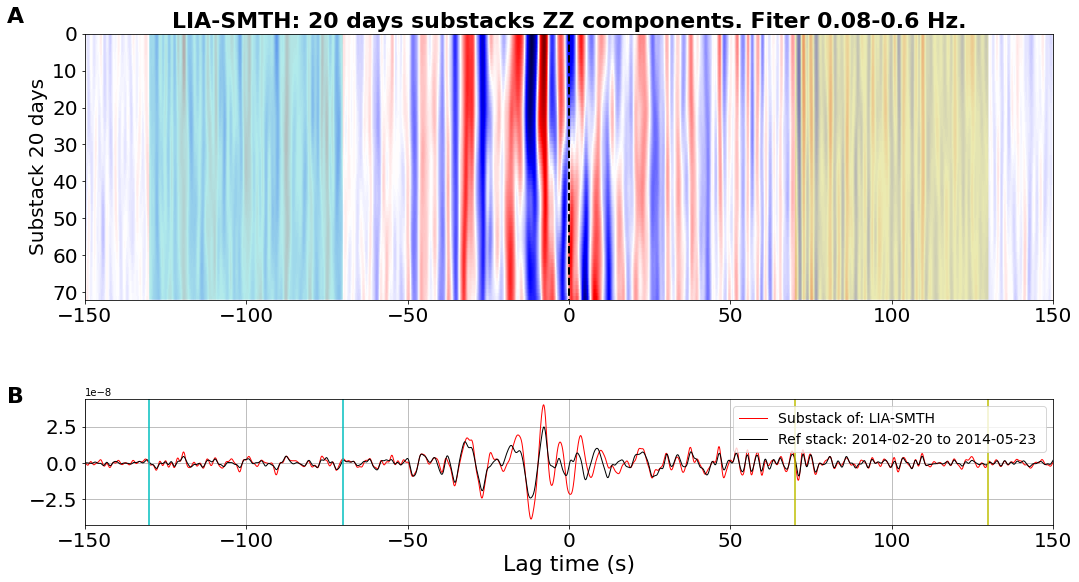

In [3]:
""" Plot cross correlation and the time window """

plt.figure(figsize=(15,15))
ax0 = plt.subplot(311)
# 2D waveform matrix
ax0.matshow(ZZndata,cmap='seismic',extent=[tlag_all[0],tlag_all[-1],nwin,0],aspect='auto')
ax0.set_ylabel(f"Substack {stack_n} days", size='20')
ax0.set_title(f"{sta_pair}: {stack_n} days substacks {ZZref_comp} components. Fiter {ZZfmin}-{ZZfmax} Hz.", size='22', fontweight='bold')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
ax0.tick_params(axis='x', labelcolor='k', labelsize='20')
ax0.tick_params(axis='y', labelcolor='k', labelsize='20')
ax0.set_xlim(-150,150)
# shade the coda part
nwin_indx = np.where((tlag_all <= -np.min(twin)) & (tlag_all > -np.max(twin)))[0] # negative lag time indices for dvv window
pwin_indx = np.where((tlag_all >= np.min(twin)) & (tlag_all < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag_all[nwin_indx],np.flip(tlag_all[nwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'c', alpha=0.3,linewidth=1)
ax0.fill(np.concatenate((tlag_all[pwin_indx],np.flip(tlag_all[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag_all,ZZcgf,'r-',linewidth=1)
ax1.plot(tlag_all,ZZrefstack,'k-',linewidth=1)
ax1.set_xlabel('Lag time (s)', size='22', color='black')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.tick_params(axis='x', labelcolor='k', labelsize='20')
ax1.tick_params(axis='y', labelcolor='k', labelsize='20')
ax1.set_xlim(-150,150)
ax1.grid(True)
ax1.legend([f"Substack of: {sta_pair}", f"Ref stack: {tref_start_str} to {tref_end_str} ",\
            "analysis window"],loc='upper right', fontsize="14")
ax1.axvline(tlag_all[nwin_indx[0]], c="c")
ax1.axvline(tlag_all[nwin_indx[-1]], c="c")
ax1.axvline(tlag_all[pwin_indx[0]], c="y")
ax1.axvline(tlag_all[pwin_indx[-1]], c="y")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')

plt.tight_layout(pad=0.7)
output_file = os.path.join(output_dir, f"{sta_pair}_{stack_n}days\
_REF_CGF.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZZ_20days_symlag_ALL_FILT_MAP.pdf


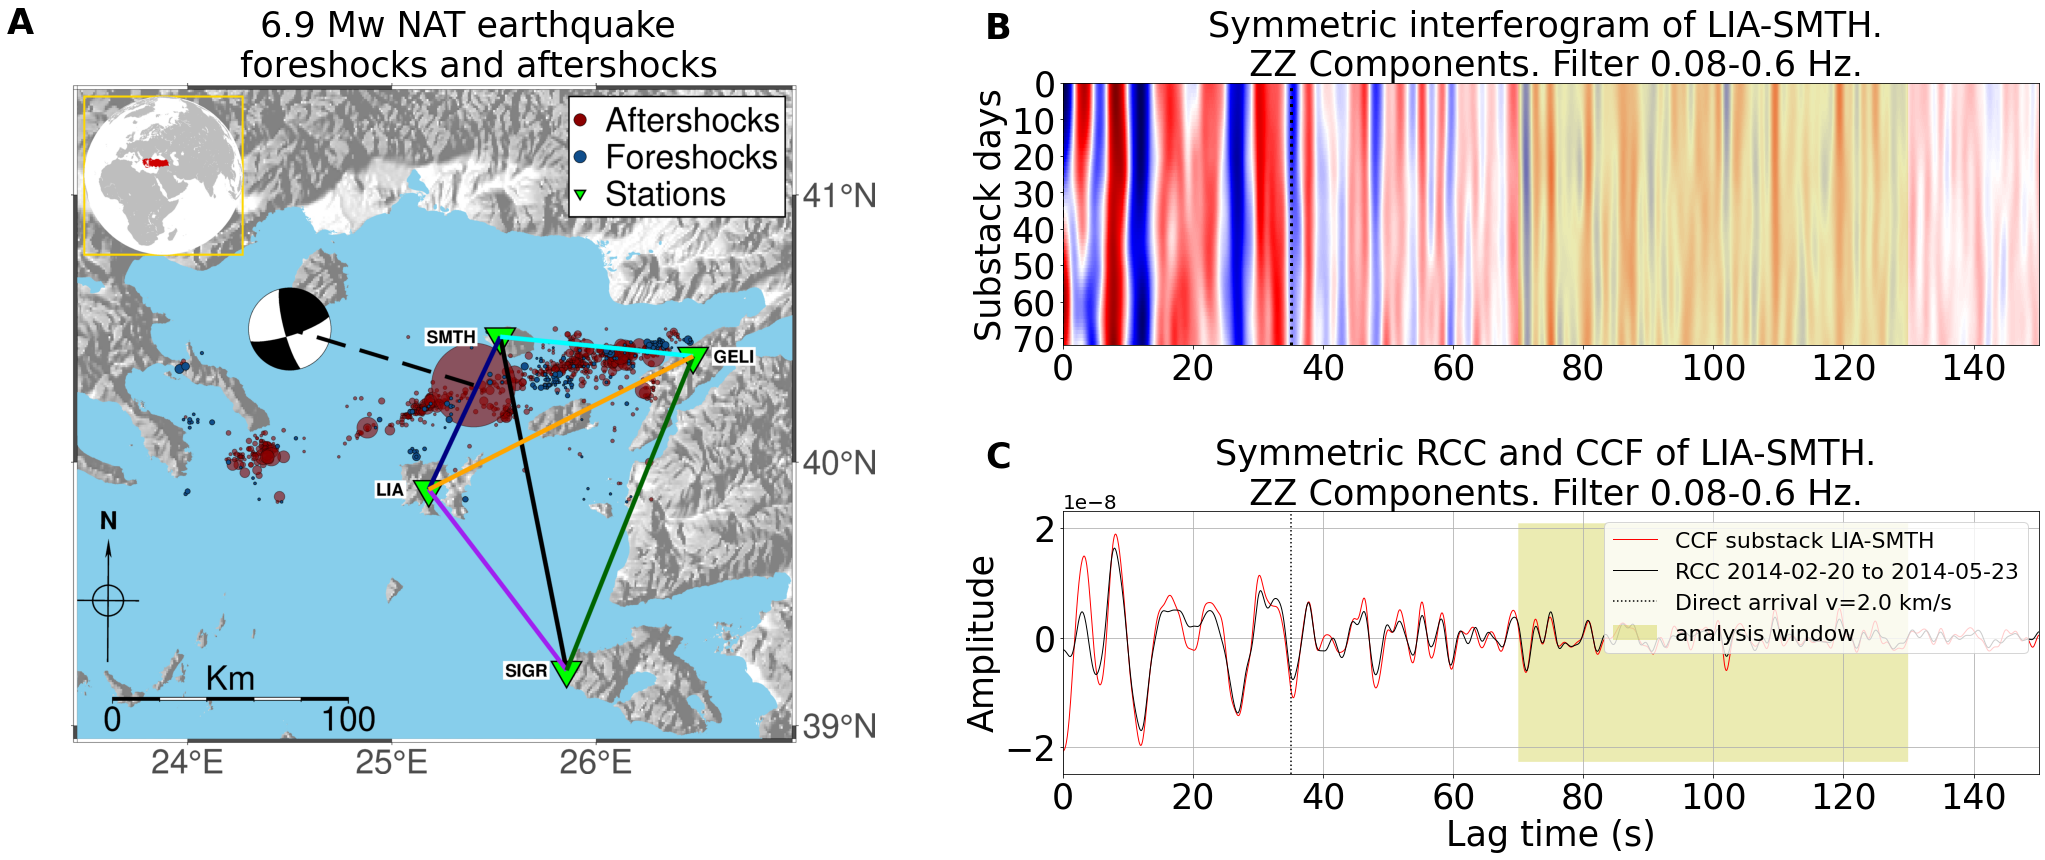

In [4]:
# PlottingZZ WITH MAP
from matplotlib.backends.backend_pdf import PdfPages


# Import a PDF image into the fourth subplot
image = plt.imread('FIGS/Aegean_fore_after.png')

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(12) #(12)
fig.set_figwidth(30) #(30)

ax7 = plt.subplot2grid(shape=(2, 2), loc=(0, 0), rowspan=2)
ax0 = plt.subplot2grid(shape=(2, 2), loc=(0, 1), colspan=1)
ax1 = plt.subplot2grid(shape=(2, 2), loc=(1, 1), colspan=1)
#ax2 = plt.subplot2grid(shape=(4, 2), loc=(2, 0), colspan=2)
#ax3 = plt.subplot2grid(shape=(4, 2), loc=(3, 0), colspan=2)

ax7.imshow(image, aspect='equal')
ax7.set_title("6.9 Mw NAT earthquake \n foreshocks and aftershocks", size=35, color="k")
ax7.set_axis_off()
ax7.text(-0.08, 1.11, 'A', transform=ax7.transAxes, fontsize=35, fontweight='bold', va='top', color="k")
#####################

#ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(ZZndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=35, color="white")
ax0.set_ylabel(f"Substack days", size=35) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. \n ZZ Components. Filter {ZZfmin}-{ZZfmax} Hz.", size=35)
ax0.tick_params(axis='y', labelcolor='black', labelsize='35')
ax0.tick_params(axis='x', labelcolor='black', labelsize='35')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.27, 'B', transform=ax0.transAxes, fontsize=35, fontweight='bold', va='top')

# reference waveform
#ax1 = plt.subplot(613)
ax1.plot(tlag, ZZndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, ZZrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=35)
ax1.set_ylabel("Amplitude", size=35)
ax1.set_title(f"Symmetric RCC and CCF of {sta_pair}. \n ZZ Components. Filter {ZZfmin}-{ZZfmax} Hz.", size=35)
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.yaxis.get_offset_text().set_fontsize(20)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='35')
ax1.tick_params(axis='x', labelcolor='black', labelsize='35')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="22")
ax1.text(-0.08, 1.27, 'C', transform=ax1.transAxes, fontsize=35, fontweight='bold', va='top')

#####################

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_ZZ_{stack_n}days\
_symlag_ALL_FILT_MAP.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZZ_20days_symlag_ALL_FILT.pdf


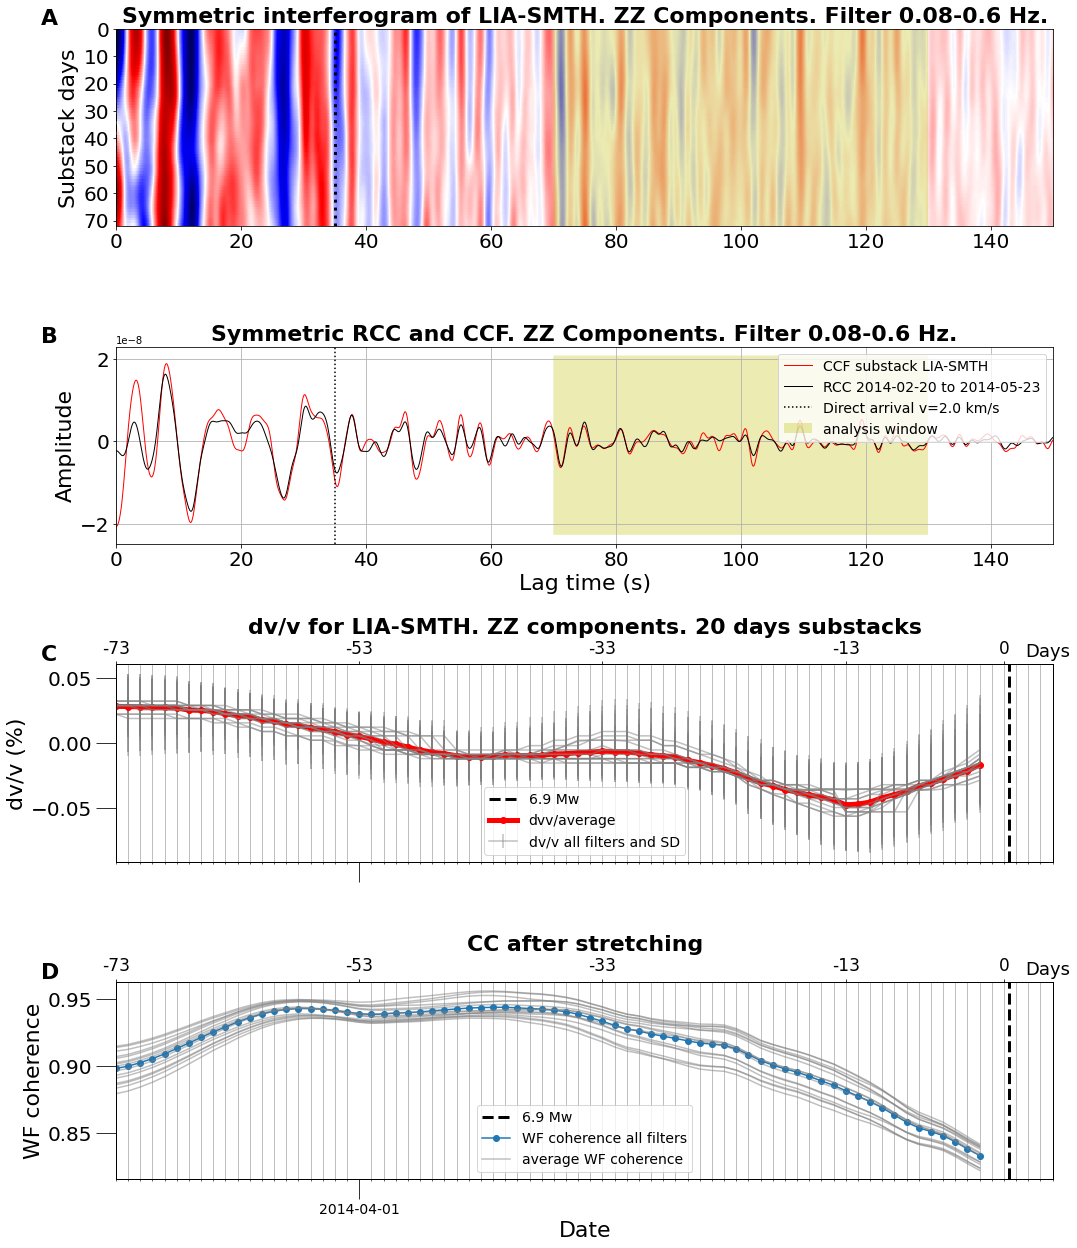

In [5]:
# PlottingZZ

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(ZZndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time [s]", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. ZZ Components. Filter {ZZfmin}-{ZZfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, ZZndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, ZZrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. ZZ Components. Filter {ZZfmin}-{ZZfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(t, ZZavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_ZZ_symdata, ZZsd_sym_lag):   
    ax2.errorbar(t, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. ZZ components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(t, ZZavg_cc, marker="o")
for i in lst_ZZ_cc:   
    ax3.plot(t, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"WF coherence all filters", f"average WF coherence"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_ZZ_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZE_20days_symlag_ALL_FILT.pdf


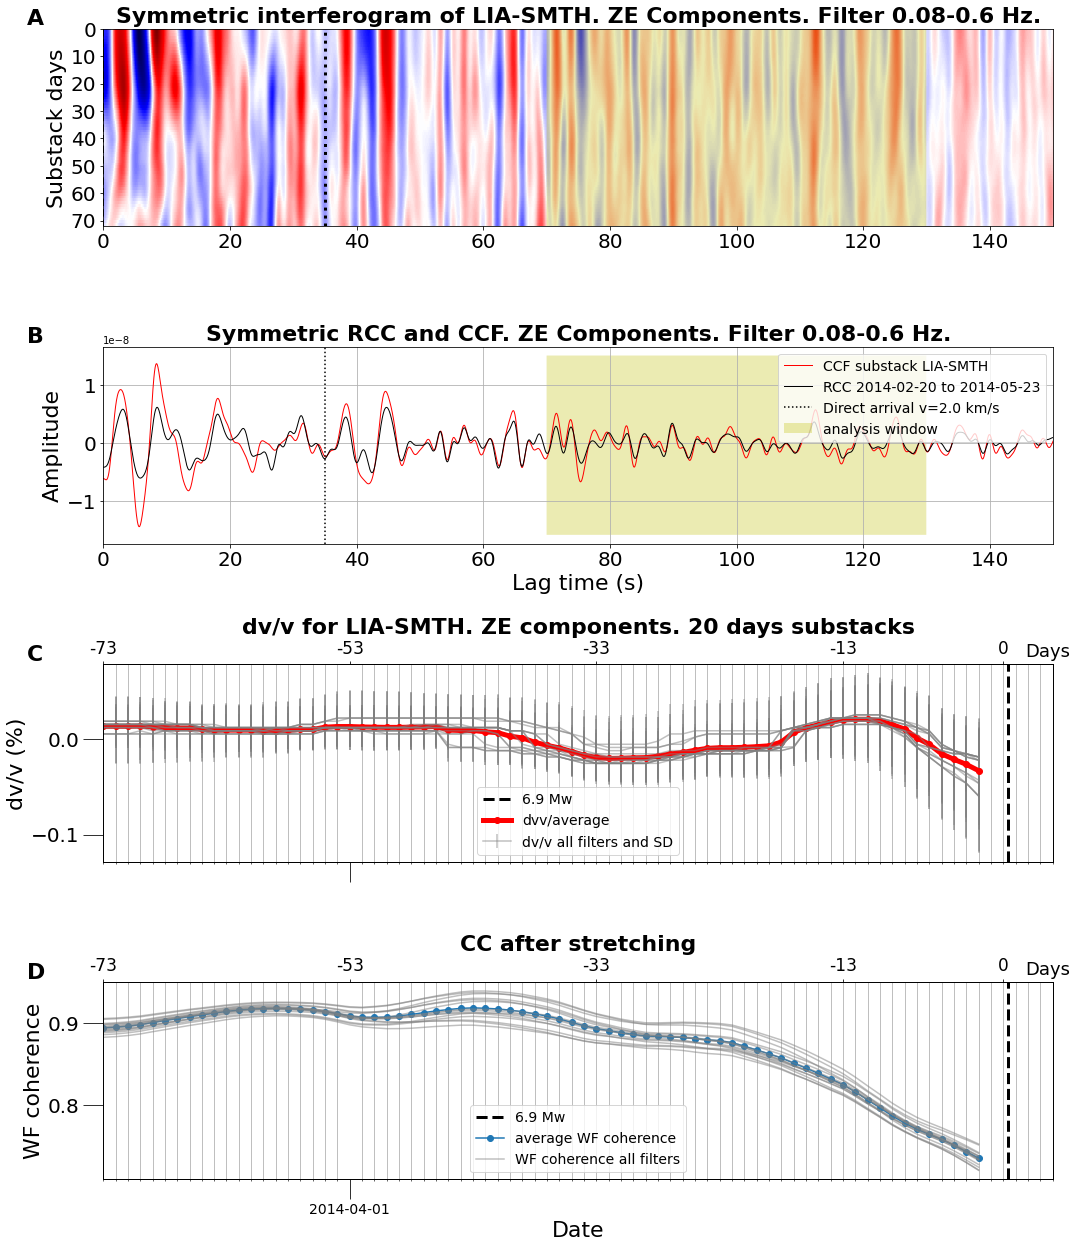

In [6]:
# PlottingZE

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(ZEndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. ZE Components. Filter {ZEfmin}-{ZEfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, ZEndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, ZErefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. ZE Components. Filter {ZEfmin}-{ZEfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tZE, ZEavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_ZE_symdata, ZEsd_sym_lag):   
    ax2.errorbar(tZE, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. ZE components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tZE, ZEavg_cc, marker="o")
for i in lst_ZE_cc:   
    ax3.plot(tZE, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_ZE_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZN_20days_symlag_ALL_FILT.pdf


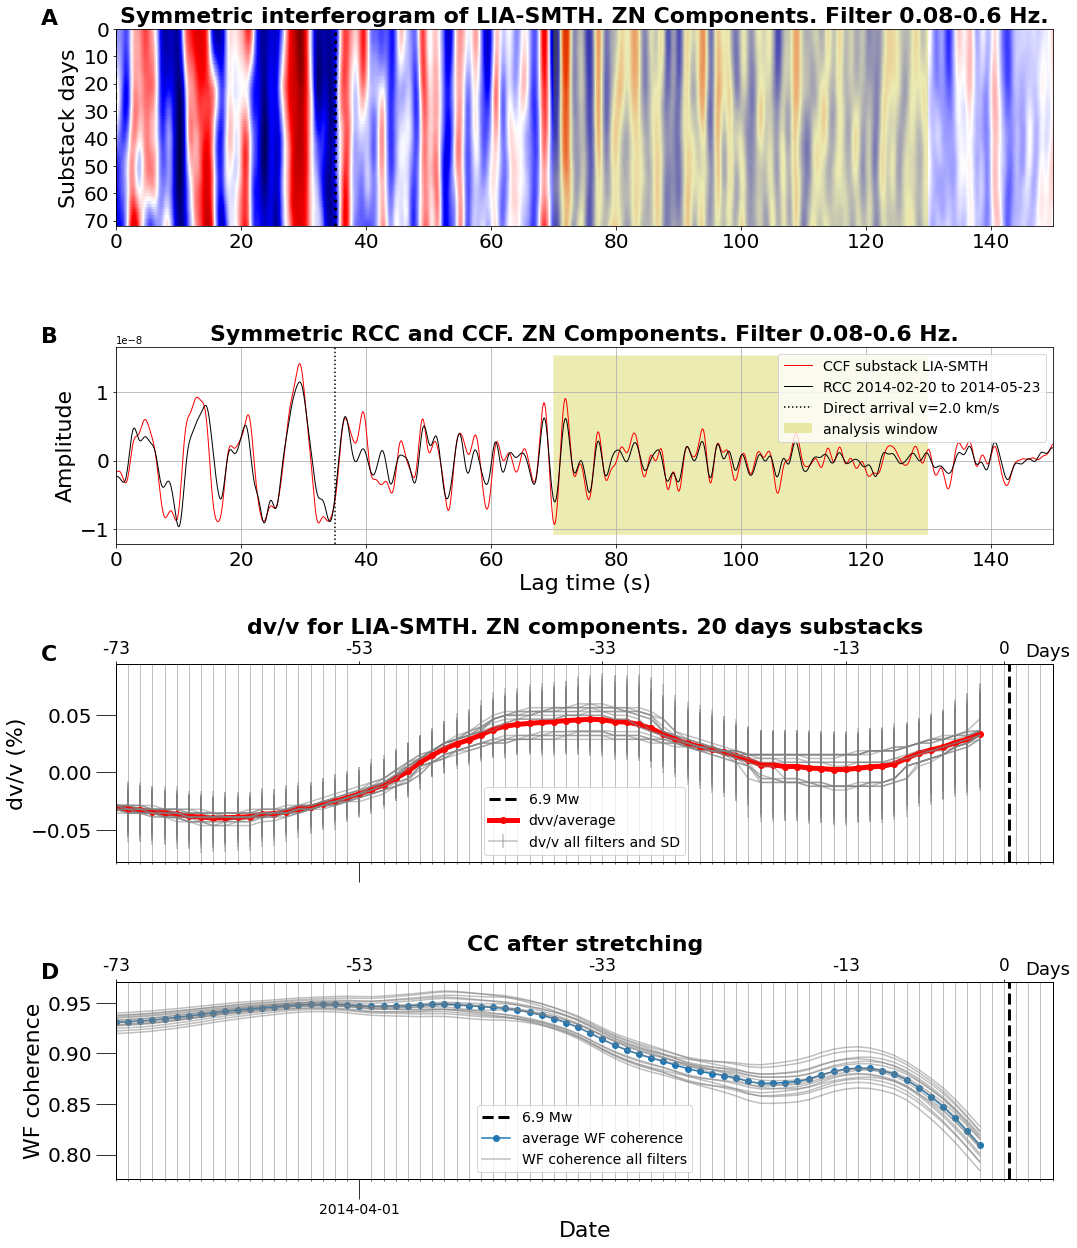

In [7]:
# PlottingZN

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(ZNndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. ZN Components. Filter {ZNfmin}-{ZNfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, ZNndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, ZNrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. ZN Components. Filter {ZNfmin}-{ZNfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tZN, ZNavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_ZN_symdata, ZNsd_sym_lag):   
    ax2.errorbar(tZN, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. ZN components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tZN, ZNavg_cc, marker="o")
for i in lst_ZN_cc:   
    ax3.plot(tZN, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_ZN_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_EE_20days_symlag_ALL_FILT.pdf


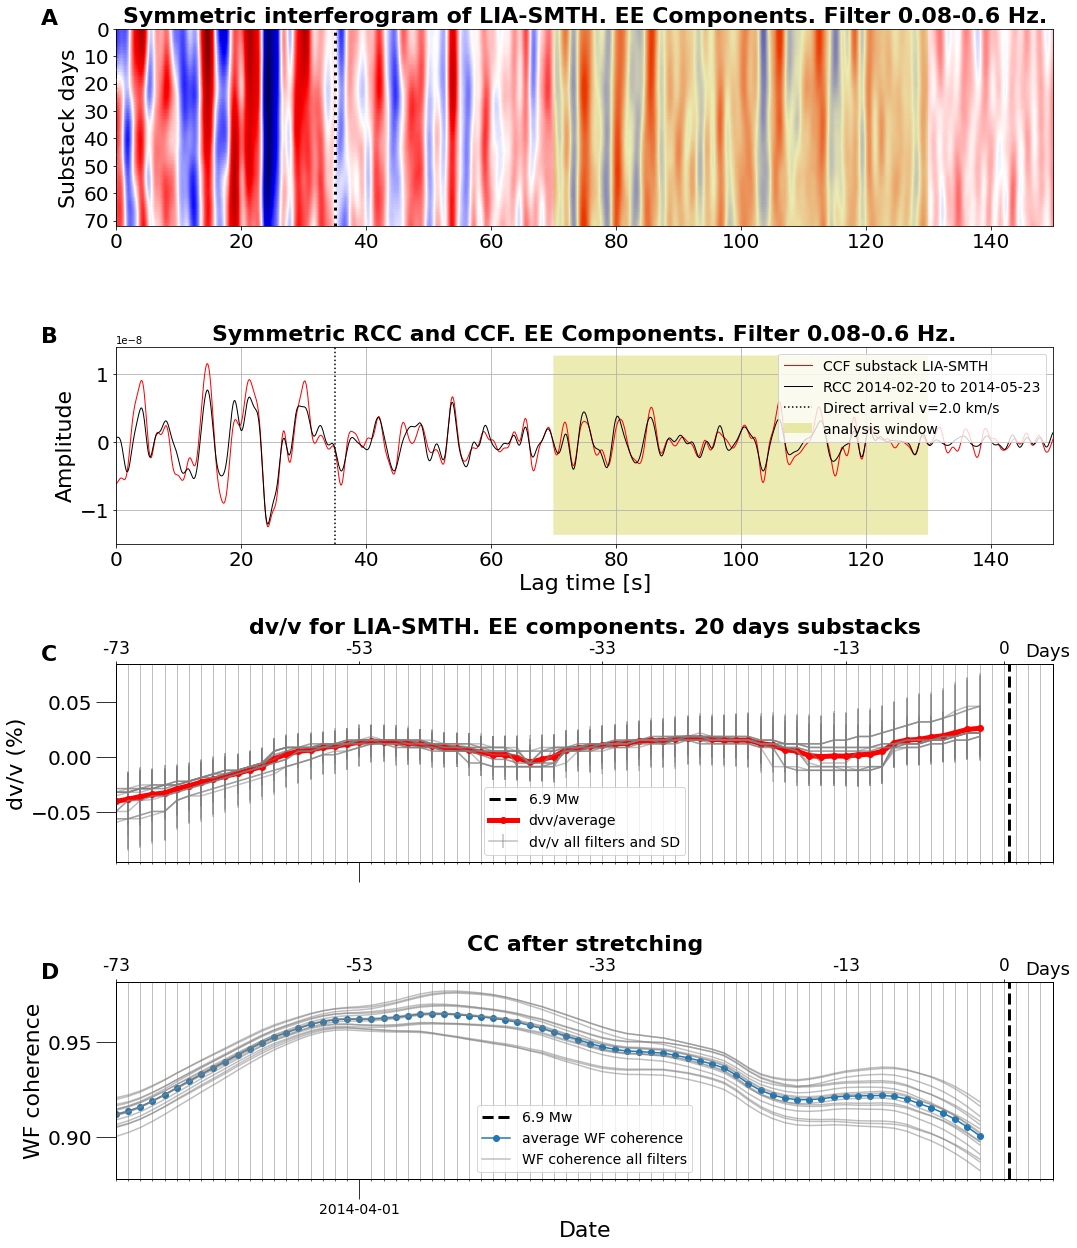

In [8]:
# PlottingEE

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(EEndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. EE Components. Filter {EEfmin}-{EEfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, EEndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, EErefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time [s]", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. EE Components. Filter {EEfmin}-{EEfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tEE, EEavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_EE_symdata, EEsd_sym_lag):   
    ax2.errorbar(tEE, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. EE components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tEE, EEavg_cc, marker="o")
for i in lst_EE_cc:   
    ax3.plot(tEE, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_EE_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_EN_20days_symlag_ALL_FILT.pdf


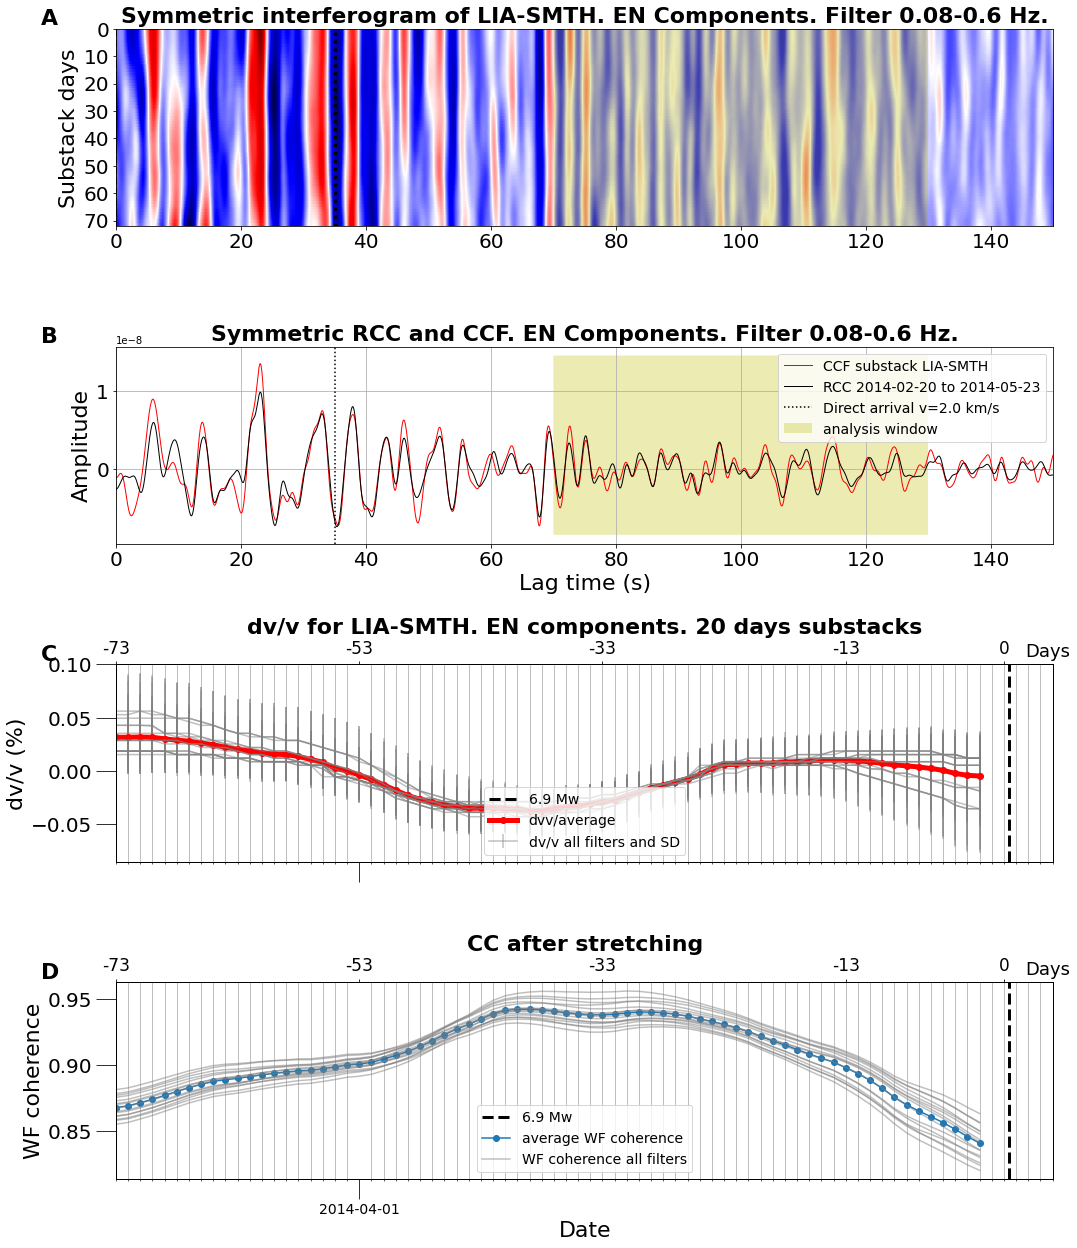

In [9]:
# PlottingEN

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
ax0.matshow(ENndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. EN Components. Filter {ENfmin}-{ENfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, ENndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, ENrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. EN Components. Filter {ENfmin}-{ENfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tEN, ENavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_EN_symdata, ENsd_sym_lag):   
    ax2.errorbar(tEN, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. EN components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tEN, ENavg_cc, marker="o")
for i in lst_EN_cc:   
    ax3.plot(tEN, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_EN_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_EZ_20days_symlag_ALL_FILT.pdf


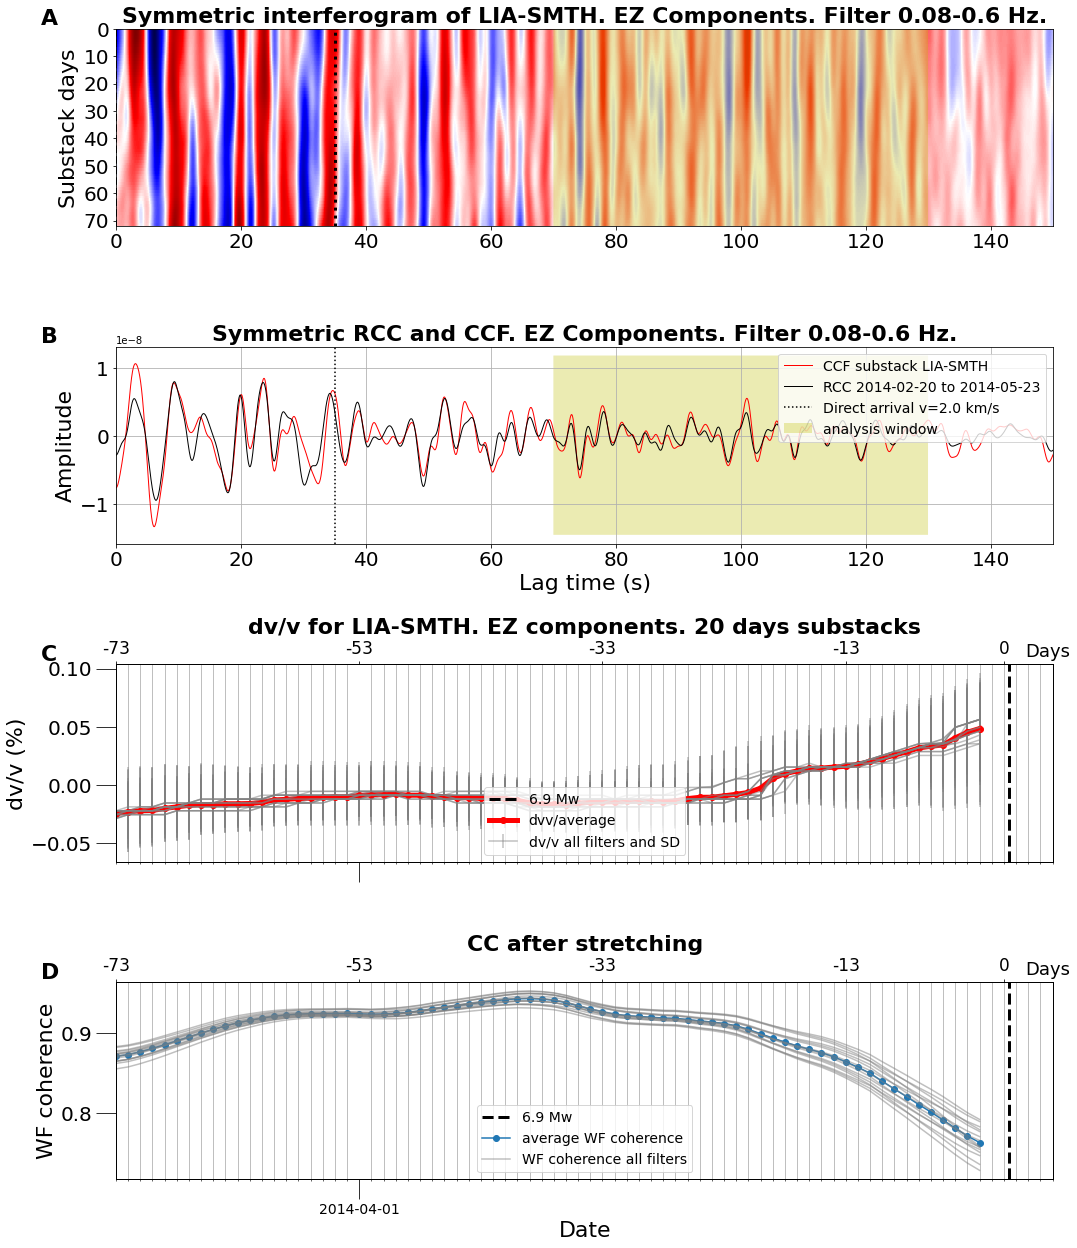

In [10]:
# PlottingEZ

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(EZndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. EZ Components. Filter {EZfmin}-{EZfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, EZndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, EZrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. EZ Components. Filter {EZfmin}-{EZfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tEZ, EZavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_EZ_symdata, EZsd_sym_lag):   
    ax2.errorbar(tEZ, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. EZ components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tEZ, EZavg_cc, marker="o")
for i in lst_EZ_cc:   
    ax3.plot(tEZ, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_EZ_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_NN_20days_symlag_ALL_FILT.pdf


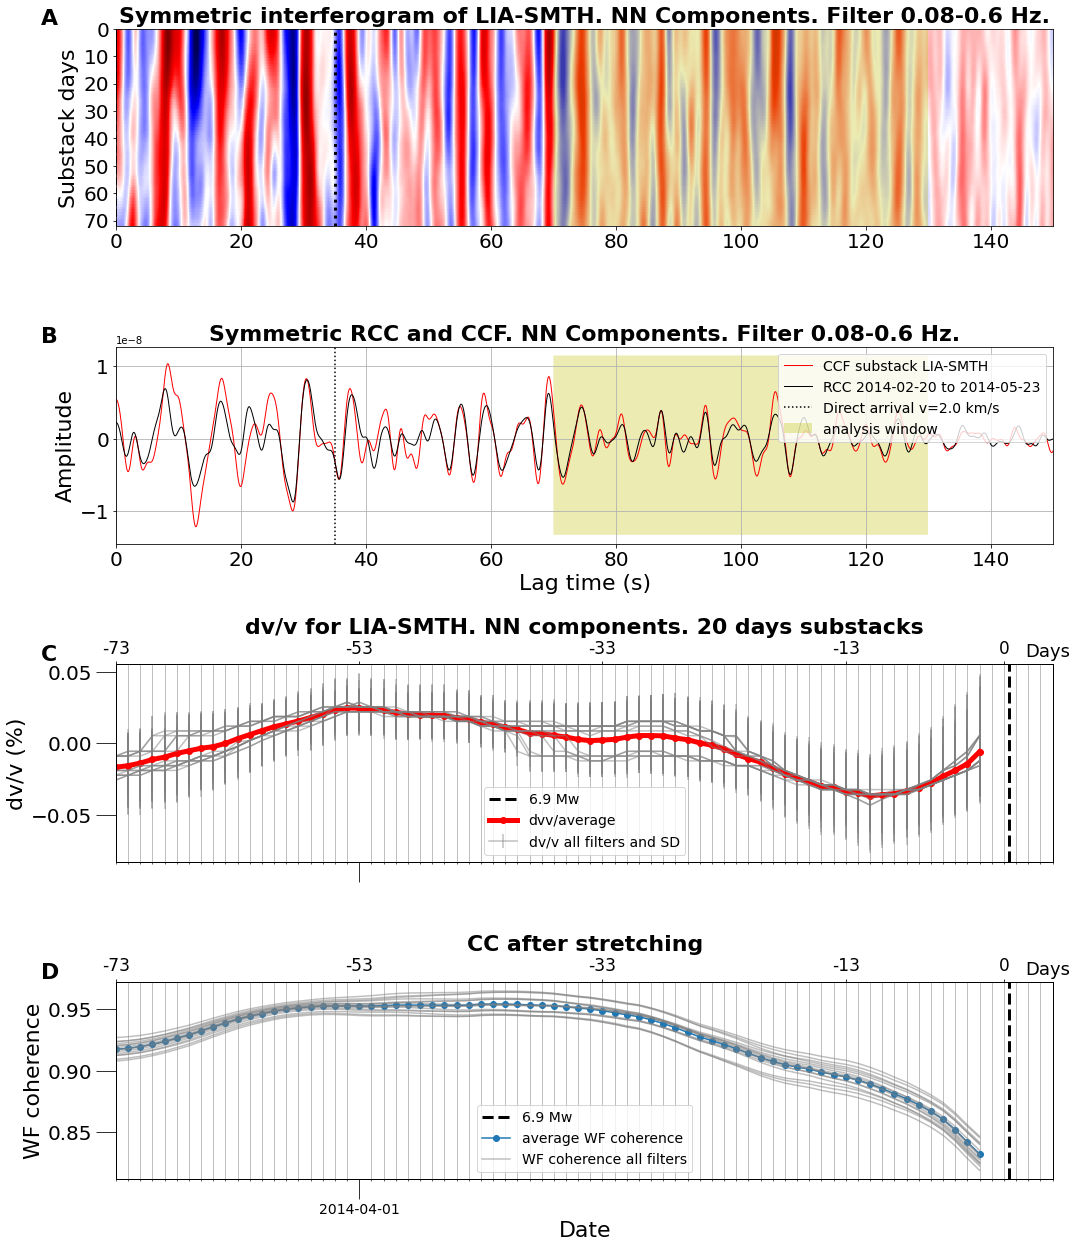

In [11]:
# PlottingNN

#plt.figure(figsize=(15,80))
plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(NNndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. NN Components. Filter {NNfmin}-{NNfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, NNndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, NNrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. NN Components. Filter {NNfmin}-{NNfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tNN, NNavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_NN_symdata, NNsd_sym_lag):   
    ax2.errorbar(tNN, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. NN components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tNN, NNavg_cc, marker="o")
for i in lst_NN_cc:   
    ax3.plot(tNN, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')


output_file = os.path.join(output_dir, f"{sta_pair}_stretching_NN_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_NE_20days_symlag_ALL_FILT.pdf


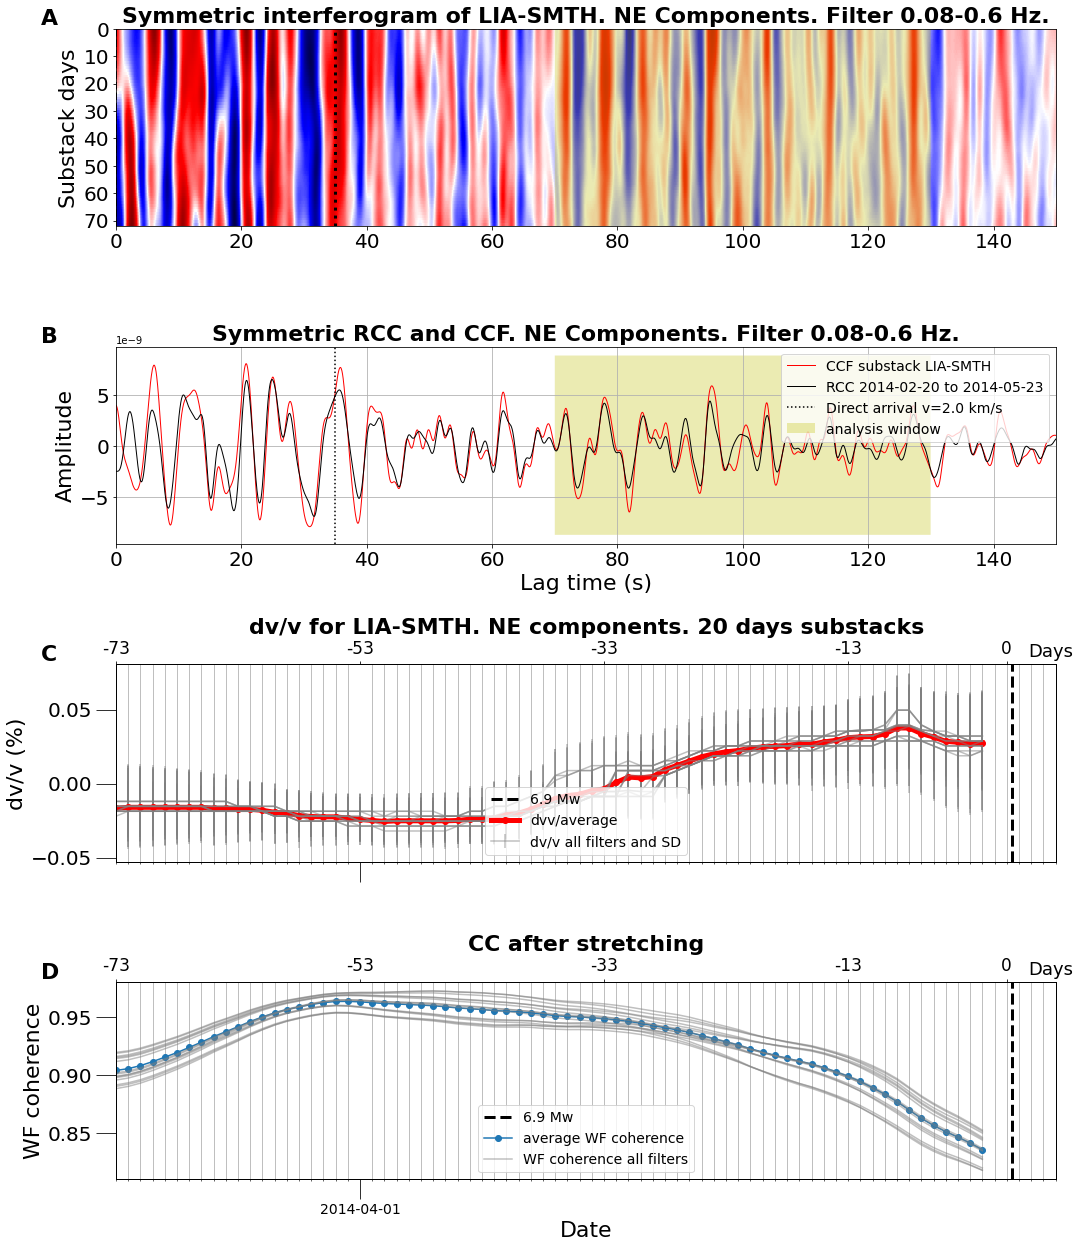

In [12]:
# PlottingNE

#plt.figure(figsize=(15,80))
plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(NEndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. NE Components. Filter {NEfmin}-{NEfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, NEndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, NErefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. NE Components. Filter {NEfmin}-{NEfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tNE, NEavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_NE_symdata, NEsd_sym_lag):   
    ax2.errorbar(tNE, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. NE components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tNE, NEavg_cc, marker="o")
for i in lst_NE_cc:   
    ax3.plot(tNE, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

plt.tight_layout(pad=0.7)

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_NE_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_NZ_20days_symlag_ALL_FILT.pdf


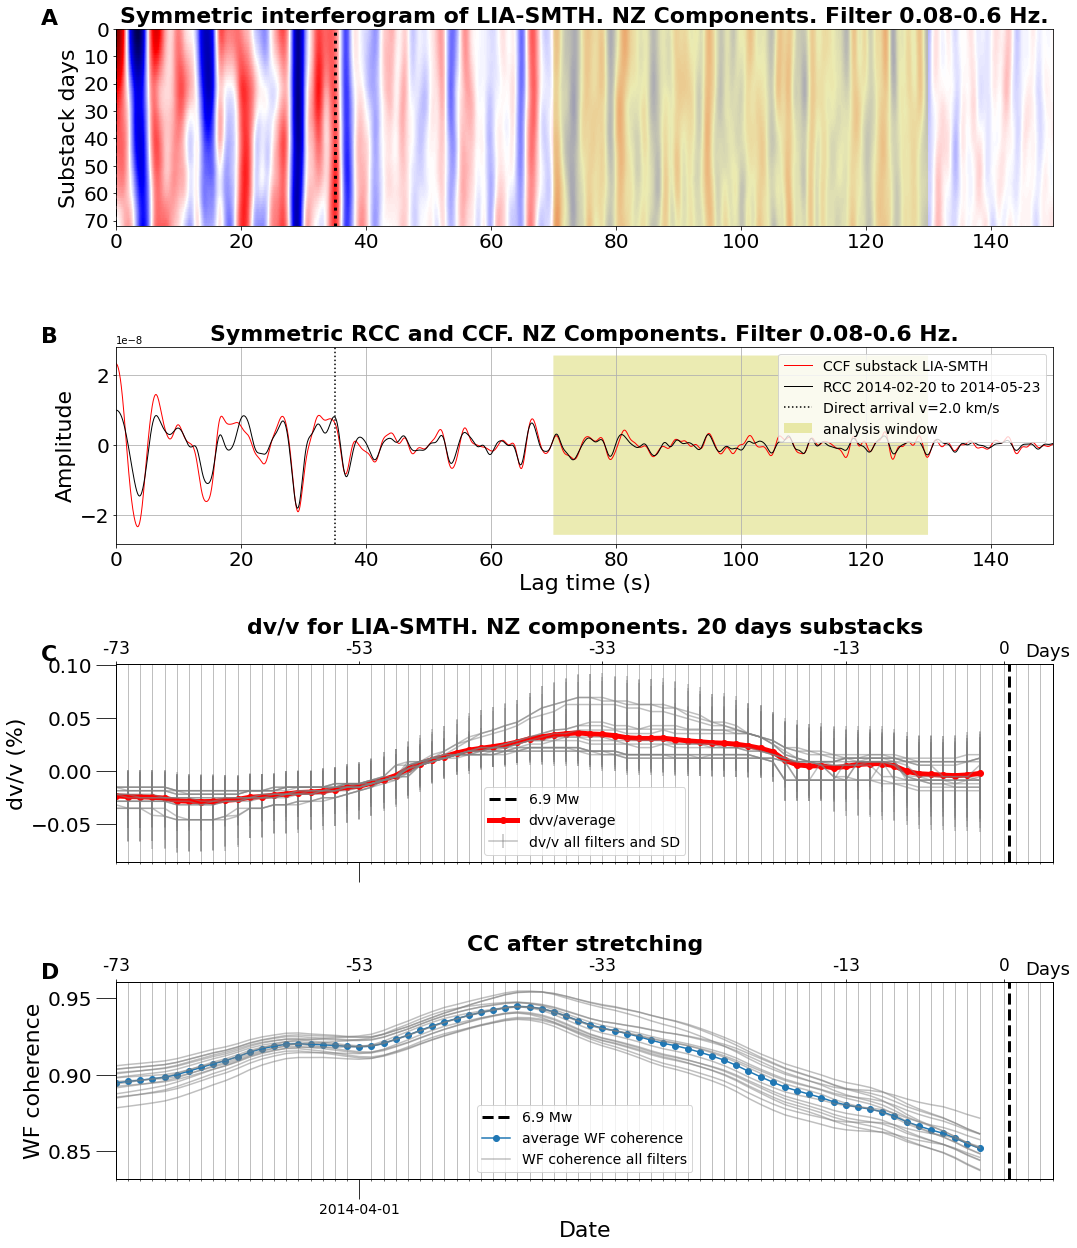

In [13]:
# PlottingNZ

plt.figure(figsize=(15,25))
#####################

ax0= plt.subplot(612)
# 2D waveform matrix
ax0.matshow(NZndata_sym,cmap='seismic',extent=[tlag[0],tlag[-1],nwin,0],aspect='auto')
#ax0.set(xlabel="Lag time [s]", ylabel=f"Substack {str(stacklen_new)}") #, title=f"{sta1}-{sta2} {str(stacklen_new)} substacks")
ax0.set_xlabel("Lag time (s)", size=22, color="white")
ax0.set_ylabel(f"Substack days", size=22) #"{str(stacklen_new)}", size=22)
ax0.set_title(f"Symmetric interferogram of {sta_pair}. NZ Components. Filter {NZfmin}-{NZfmax} Hz.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='black', labelsize='20')
ax0.tick_params(axis='x', labelcolor='black', labelsize='20')
ax0.plot([0,0],[0,nwin],'k--',linewidth=2)
# shade the coda part
pwin_indx = np.where((tlag >= np.min(twin)) & (tlag < np.max(twin)))[0] # positive lag time indices for dvv window
ax0.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*0,np.ones(len(nwin_indx))*nwin),axis=0),'y', alpha=0.3)
ax0.xaxis.set_ticks_position('bottom')
ax0.axvline(dist/vmin, c="k", ls=":", lw="3")
#ax0.legend([f"Reference stack: {tref_start_str} to {tref_end_str}", f"Group velocity v={vmin:.1f} km/s", "analysis window"],loc='upper right')
ax0.text(-0.08, 1.1, 'A', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')

# reference waveform
ax1 = plt.subplot(613)
ax1.plot(tlag, NZndata_sym[0, :],'r-',linewidth=1) #plot the 1st current as an example
ax1.plot(tlag, NZrefstack_sym,'k-',linewidth=1) #plot reference
ax1.set_xlabel("Lag time (s)", size=22)
ax1.set_ylabel("Amplitude", size=22)
ax1.set_title(f"Symmetric RCC and CCF. NZ Components. Filter {NZfmin}-{NZfmax} Hz.", size=22, fontweight='bold')
ax1.autoscale(enable=True, axis='x', tight=True)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black', labelsize='20')
ax1.tick_params(axis='x', labelcolor='black', labelsize='20')
ax1.axvline(dist/vmin, c="k", ls=":")
ylims = ax1.get_ylim()
ax1.fill(np.concatenate((tlag[pwin_indx],np.flip(tlag[pwin_indx],axis=0)),axis=0), \
    np.concatenate((np.ones(len(nwin_indx))*ylims[0],np.ones(len(nwin_indx))*ylims[1]),axis=0),'y', alpha=0.3)
ax1.legend([f"CCF substack {sta_pair}", f"RCC {tref_start_str} to {tref_end_str}", f"Direct arrival v={vmin:.1f} km/s", "analysis window"],loc='upper right', fontsize="14")
ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')
#####################

ax2= plt.subplot(614) #311
ax2.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax2.plot(tNZ, NZavg_dvv, marker="o", c="r", linewidth="5")
for i, j in zip(lst_NZ_symdata, NZsd_sym_lag):   
    ax2.errorbar(tNZ, i, yerr=j, c="gray", alpha=0.5)
ax2.set_title(f"dv/v for {sta_pair}. NZ components. {stack_n} days substacks", size=22, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k', labelsize='20')
ax2.tick_params(axis='x', labelcolor='w', labelsize='20')
ax2.set_ylabel("dv/v (%)", size=22)
ax2.set_xlabel('Date', size='22', color='white')
ax2.set_xlim(t[0])
ax2.legend([f"{str(EQmag)} Mw", f"dvv/average", f"dv/v all filters and SD"],loc='lower center', fontsize="14")
ax2.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

# CC after stretching
ax3= plt.subplot(615)
ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.plot(tNZ, NZavg_cc, marker="o")
for i in lst_NZ_cc:   
    ax3.plot(tNZ, i, c="gray", alpha=0.5)
ax3.set_title(f"CC after stretching", size=22, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='black', labelsize='20')
ax3.tick_params(axis='x', labelcolor='black', labelsize='14')
ax3.set_xlabel('Date', size='22', color='black')
ax3.set_ylabel("WF coherence", size=22)
ax3.set_xlim(t[0])
ax3.legend([f"{str(EQmag)} Mw", f"average WF coherence", f"WF coherence all filters"], loc='lower center', fontsize="14")
ax3.text(-0.08, 1.1, 'D', transform=ax3.transAxes, fontsize=22, fontweight='bold', va='top')

for ax in [ax2,ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax4_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='17')
    ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=18, va='top')      
    ax5 = ax.twiny()
    ax5.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax5.set_xticks([vertical_line_date])
    ax5.set_xticklabels(['0'], size='17')

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_NZ_{stack_n}days\
_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()


../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZZ_20days_symlag_FORESHOCKS.pdf


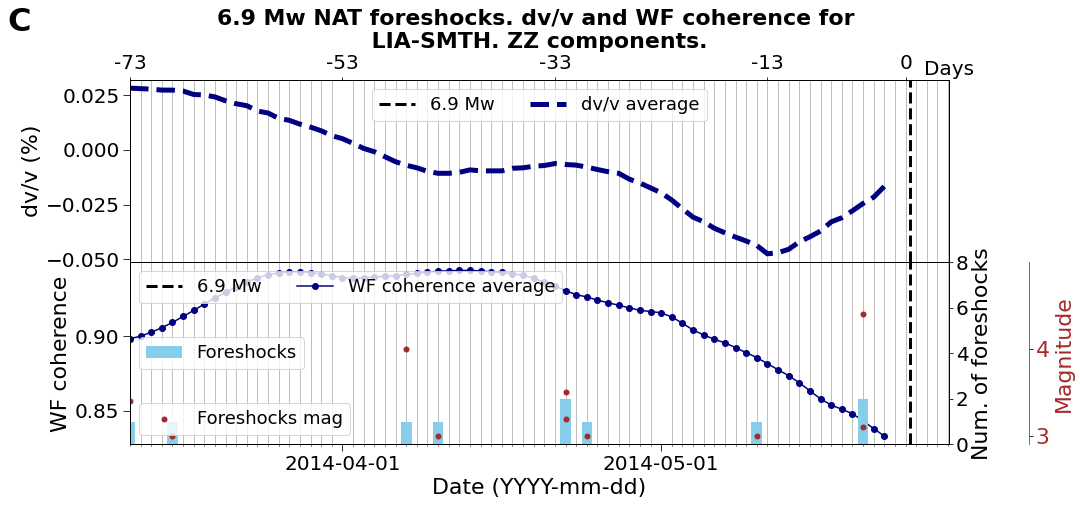

In [14]:
# PlottingZZ
#fig, ax = plt.subplots(figsize=(25, 5))

fig = plt.figure(figsize=(15, 7))
gs = GridSpec(2, 1, hspace=0)  # hspace=0 removes the vertical space between plots

ax0 = fig.add_subplot(gs[0])
ax0.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax0.plot(t, ZZavg_dvv, ls="--", c="navy", linewidth="5")
ax0.set_title(f"{str(EQmag)} Mw NAT foreshocks. dv/v and WF coherence for \n {sta_pair}. ZZ components. ", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='k', labelsize='20')
ax0.tick_params(axis='x', labelcolor='w', labelsize='20')
ax0.set_ylabel("dv/v (%)", size=22)
ax0.set_xlabel('Date', size='22', color='white')
ax0.set_xlim(t[0])
ax0.legend([f"{str(EQmag)} Mw", f"dv/v average"], ncol=2, loc='upper center', fontsize="18")
ax0.text(-0.15, 1.4, 'C', transform=ax0.transAxes, fontsize=32, fontweight='bold', va='top')

# CC after stretching
ax1 = fig.add_subplot(gs[1])
ax1.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax1.plot(t, ZZavg_cc, marker="o", c="navy")
#ax1.set_title(f"CC after stretching", size=22, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='k', labelsize='20')
ax1.tick_params(axis='x', labelcolor='k', labelsize='20')
ax1.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax1.set_ylabel("WF coherence", size=22)
ax1.set_xlim(t[0])
ax1.legend([f"{str(EQmag)} Mw",f"WF coherence average"], ncol=2, loc='upper left', fontsize="18")
#ax1.text(-0.08, 1.1, 'B', transform=ax1.transAxes, fontsize=22, fontweight='bold', va='top')

#Foreshocks
ax2 = ax1.twinx()
ax2.bar(fin_dates,ll, width=1, color = 'skyblue')
ax2.tick_params(axis='y', labelcolor='black', labelsize='20')
ax2.set_xlabel('Date ', size='22', color='w')
ax2.set_ylabel('Num. of foreshocks', size=22)
ax2.set_ylim(0,8)
ax2.legend([f"Foreshocks"], loc='center left', fontsize="18")

#plot magnitudes
#dfn['Time'] -= pd.Timedelta(days=1) #shift magnitudes... only visual effect
ax3 = ax1.twinx()
#ax3.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax3.scatter(dfn['Date'],df['mag'], marker=".", color = 'brown', linewidth=3)#, label='foreshocks magnitudes')
ax3.tick_params(axis='y', labelcolor='brown', labelsize='22')
ax3.set_ylabel('Magnitude', color='brown', size='22')
ax3.spines['right'].set_position(('outward', 80)) 
ax3.tick_params(axis='y', labelcolor='brown')#, labelsize='18')
ax3.spines['right'].set_color('brown')
ax3.legend([f"Foreshocks mag"], loc='lower left', fontsize="18")

# Creating a second x-axis for countdown
ax4 = ax0.twiny()
ax4.set_xlim(ax0.get_xlim())  # Set the same limits as the first x-axis
days_before = (date_range - vertical_line_date).days
ax4_day_numbers = np.where(days_before > 0, days_before, days_before) #-1
# Display the secondary x-axis in intervals of 20 days
if plot_prepostEQ == True:
    ax4.set_xticks(date_range[::40])
    ax4.set_xticklabels(ax4_day_numbers[::40], size='20')
else:
    ax4.set_xticks(date_range[::20])
    ax4.set_xticklabels(ax4_day_numbers[::20], size='20')
ax4.text(0.97, 1.11, 'Days', transform=ax4.transAxes, fontsize=20, va='top')       
ax5 = ax0.twiny()
ax5.set_xlim(ax0.get_xlim())  # Set the same limits as the first x-axis
ax5.set_xticks([vertical_line_date])
ax5.set_xticklabels(['0'], size='20')

for ax in [ax0,ax1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=7)
    fmt_day = mdates.DayLocator()
    if plot_prepostEQ == True:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    else:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')

plt.tight_layout(pad=0.7)

output_file = os.path.join(output_dir, f"{sta_pair}_stretching_ZZ_{stack_n}days\
_symlag_FORESHOCKS.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')

plt.show()
plt.close()

15


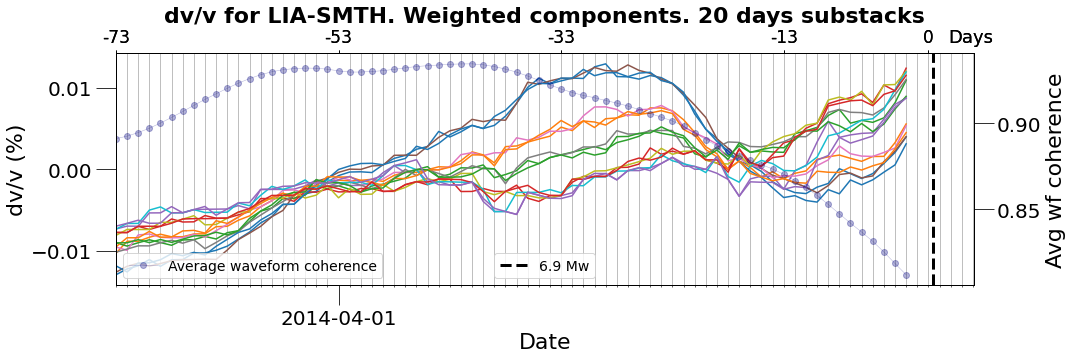

In [15]:
#calculate weighted dv/v average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_results(dvv, cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_dvvs = np.array(dvv)
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between the values of the first group and the values of the second group
    product_sum = np.sum(all_dvvs * (all_cccs**2), axis=0)

    # Calculate the summation of the values of the second group
    all_cccs_sum = np.sum(all_cccs**2, axis=0)

    # Divide the product summation by the summation of the values of the second group
    return product_sum / all_cccs_sum

#calculate weighted waveform cc average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_res(cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between cc^3 and cc^2
    sum_ccc3 = np.sum((all_cccs**3), axis=0)

    # Calculate the summation of the values of the second group
    sum_ccc2 = np.sum((all_cccs**2), axis=0)

    # Divide the product summation by the summation of the values of the second group
    return sum_ccc3 / sum_ccc2

# Define the compos_ for the variables
compos_ = ['ZZ', 'ZE', 'ZN', 'EE', 'EN', 'EZ', 'NN', 'NE', 'NZ']

# Define the number of lists
if sta1_ == "SIGR" and sta2_ == "GELI":
    num_filts = 10
elif sta1_ == "LIA" and sta2_ == "SMTH" and plot_prepostEQ ==True:
    num_filts = 9
else:
    num_filts = 15

# Create a list of lists to store the variables
dvv_lists = []

# Generate the list of lists of variables
for i in range(1, num_filts + 1):
    dvv_list = [eval(prefix + 'sym_lag' + str(i)) for prefix in compos_]
    dvv_lists.append(dvv_list)

# Print the list of lists
print(len(dvv_lists))

cc_c_lists = []
# Generate the list of lists of variables
for j in range(1, num_filts + 1):
    cc_lst = [eval(prefix + 'cc_sym' + str(i)) for prefix in compos_] #careful with eval
    cc_c_lists.append(cc_lst)

#ENSURE all npy have the same dimentions. START
def get_min_shape(list_of_list_of_arrays):
    # Flatten the list of lists and find the minimum shape
    all_shapes = [arr.shape for sublist in list_of_list_of_arrays for arr in sublist]
    min_shape = np.min(all_shapes, axis=0)
    return tuple(min_shape)

def reshape_to_smallest_shape(list_of_list_of_arrays):
    # Find the shape of the smallest array
    min_shape = get_min_shape(list_of_list_of_arrays)

    # Truncate each array to the shape of the smallest array
    reshaped_list_of_list_of_arrays = [
        [arr[tuple(slice(0, dim) for dim in min_shape)] for arr in sublist]
        for sublist in list_of_list_of_arrays
    ]

    return reshaped_list_of_list_of_arrays

dvv_lists = reshape_to_smallest_shape(dvv_lists)
cc_c_lists = reshape_to_smallest_shape(cc_c_lists)
#ENSURE all npy have the same dimentions. END    
#print(len(cc_c_lists))

########### weighted avg
results = []
for dvv, cc_c in zip(dvv_lists, cc_c_lists):
    results.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg
res_ccc = []
for cc_c in cc_c_lists:
    res_ccc.append(calculate_res(cc_c))
###########

   
plt.figure(figsize=(15, 25))
ax0=plt.subplot(612)
#for result in results:    
ax0.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")    
for result in results:
    if plot_prepostEQ ==True:
        ax0.plot(t[0:-2], result)
    else:
        ax0.plot(t, result)
    ax0.set_xlim(t[0])
ax0.set_xlabel('Value Index')
ax0.set_ylabel('Result')
ax0.set_title(f"dv/v for {sta_pair}. Weighted components. {stack_n} days substacks", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='k', labelsize='20')
ax0.tick_params(axis='x', labelcolor='k', labelsize='20')
ax0.set_ylabel("dv/v (%)", size=22)
ax0.set_xlabel('Date', size='22', color='k')
ax0.legend([f"{str(EQmag)} Mw"],loc='lower center', fontsize="14")
#plt.text(-0.08, 1.1, 'C', transform=ax2.transAxes, fontsize=22, fontweight='bold', va='top')

########### cc WF
ax1 = ax0.twinx()
if plot_prepostEQ ==True:
    ax1.plot(t[0:-2], res_ccc[0], c="navy", marker="o", lw="0.5", alpha=0.3)
else:
    ax1.plot(t, res_ccc[0], c="navy", marker="o", lw="0.5", alpha=0.3)
ax1.set_xlim(t[0])
ax1.tick_params(axis='y', labelcolor='k', labelsize='20')
#ax1.tick_params(axis='x', labelcolor='k', labelsize='20')
ax1.set_ylabel("Avg wf coherence", size=22)
ax1.legend([f"Average waveform coherence"],loc='lower left', fontsize="14")
###########

for ax in [ax0,ax1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax2_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    if plot_prepostEQ == True:
        ax2.set_xticks(date_range[::40])
        ax2.set_xticklabels(ax2_day_numbers[::40], size='17')
    else:
        ax2.set_xticks(date_range[::20])
        ax2.set_xticklabels(ax2_day_numbers[::20], size='17')
    ax2.text(0.97, 1.11, 'Days', transform=ax2.transAxes, fontsize=18, va='top')      
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax3.set_xticks([vertical_line_date])
    ax3.set_xticklabels(['0'], size='17')

   
plt.tight_layout()
plt.show()

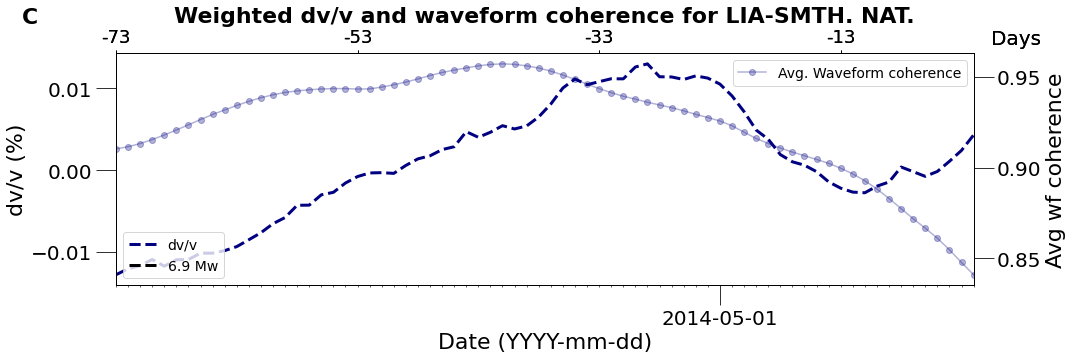

In [16]:
#calculate weighted dv/v average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_results(dvv, cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_dvvs = np.array(dvv)
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between the values of the first group and the values of the second group
    product_sum = np.sum(all_dvvs * (all_cccs**2), axis=0)

    # Calculate the summation of the values of the second group
    all_cccs_sum = np.sum(all_cccs**2, axis=0)

    # Divide the product summation by the summation of the values of the second group
    return product_sum / all_cccs_sum

#calculate weighted waveform cc average following Boshelli et al., 2021 and Hobiger et al., 2012
def calculate_res(cc_c):
    # Convert the lists to numpy arrays for easier manipulation
    all_cccs = np.array(cc_c)

    # Calculate the summation of the product between cc^3 and cc^2
    sum_ccc3 = np.sum((all_cccs**3), axis=0)

    # Calculate the summation of the values of the second group
    sum_ccc2 = np.sum((all_cccs**2), axis=0)

    # Divide the product summation by the summation of the values of the second group
    return sum_ccc3 / sum_ccc2

# Define the compos_ for the variables
compos_ = ['ZZ', 'ZE', 'ZN', 'EE', 'EN', 'EZ', 'NN', 'NE', 'NZ']

dvv_lists = [[ZZsym_lag1,ZEsym_lag1,ZNsym_lag1,EEsym_lag1,ENsym_lag1,\
            EZsym_lag1,NNsym_lag1,NEsym_lag1,NZsym_lag1]]


cc_c_lists = [[ZZcc_sym1, ZEcc_sym1,ZNcc_sym1,EEcc_sym1,ENcc_sym1,EZcc_sym1,NNcc_sym1,\
             NEcc_sym1,NZcc_sym1]]  
            
#ENSURE all npy have the same dimentions. START
def get_min_shape(list_of_list_of_arrays):
    # Flatten the list of lists and find the minimum shape
    all_shapes = [arr.shape for sublist in list_of_list_of_arrays for arr in sublist]
    min_shape = np.min(all_shapes, axis=0)
    return tuple(min_shape)

def reshape_to_smallest_shape(list_of_list_of_arrays):
    # Find the shape of the smallest array
    min_shape = get_min_shape(list_of_list_of_arrays)

    # Truncate each array to the shape of the smallest array
    reshaped_list_of_list_of_arrays = [
        [arr[tuple(slice(0, dim) for dim in min_shape)] for arr in sublist]
        for sublist in list_of_list_of_arrays
    ]

    return reshaped_list_of_list_of_arrays

dvv_lists = reshape_to_smallest_shape(dvv_lists)
cc_c_lists = reshape_to_smallest_shape(cc_c_lists)
#ENSURE all npy have the same dimentions. END
    
    
########### weighted avg
results = []
for dvv, cc_c in zip(dvv_lists, cc_c_lists):
    results.append(calculate_results(dvv, cc_c))
    

########### CC waveform avg
res_ccc = []
for cc_c in cc_c_lists:
    res_ccc.append(calculate_res(cc_c))
###########
    
plt.figure(figsize=(15, 25))
ax0=plt.subplot(612)
#for result in results:    
for result in results:
    if plot_prepostEQ ==True:
        ax0.plot(t[0:-2], result, ls="--", c="navy", linewidth="3")
    else:
        ax0.plot(t, result, ls="--", c="navy", linewidth="3")
ax0.set_xlim(t[0],t[-1])
ax0.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")  
ax0.set_title(f"Weighted dv/v and waveform coherence for {sta_pair}. NAT.", size=22, fontweight='bold')
ax0.tick_params(axis='y', labelcolor='k', labelsize='20')
ax0.tick_params(axis='x', labelcolor='k', labelsize='20')
ax0.set_ylabel("dv/v (%)", size=22)
ax0.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax0.legend([f"dv/v", f"{str(EQmag)} Mw"],loc='lower left', fontsize="14")
plt.text(-0.11, 1.2, 'C', transform=ax0.transAxes, fontsize=22, fontweight='bold', va='top')


########### cc WF
ax1 = ax0.twinx()
if plot_prepostEQ ==True:
    ax1.plot(t[0:-2], res_ccc[0], marker="o", c="navy", label="Weighted wf coherence", alpha=0.3)
else:
    ax1.plot(t, res_ccc[0], marker="o", c="navy", label="Weighted wf coherence", alpha=0.3)
    ax1.set_xlim(t[0],t[-1])
ax1.tick_params(axis='y', labelcolor='k', labelsize='20')
#ax1.tick_params(axis='x', labelcolor='k', labelsize='20')
ax1.set_ylabel("Avg wf coherence", size=22)
ax1.legend([f"Avg. Waveform coherence"],loc='best', fontsize="14")
###########

for ax in [ax0,ax1]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    if plot_prepostEQ ==True:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    else:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
            
    # Creating a second x-axis for counting down
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax2_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    if plot_prepostEQ ==True:
        ax2.set_xticks(date_range[::40])
        ax2.set_xticklabels(ax2_day_numbers[::40], size='18')
    else:
        ax2.set_xticks(date_range[::20])
        ax2.set_xticklabels(ax2_day_numbers[::20], size='18')
    ax2.text(1.02, 1.105, 'Days', transform=ax2.transAxes, fontsize=20, va='top')      
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax3.set_xticks([vertical_line_date])
    ax3.set_xticklabels(['0'], size='18')  
   
plt.tight_layout()

plt.show()
plt.close()

../AEGEAN/stretching/LIA_SMTH/20days_stack/LIA-SMTH_stretching_ZZ_20days_symlag_FORESHOCKS.pdf


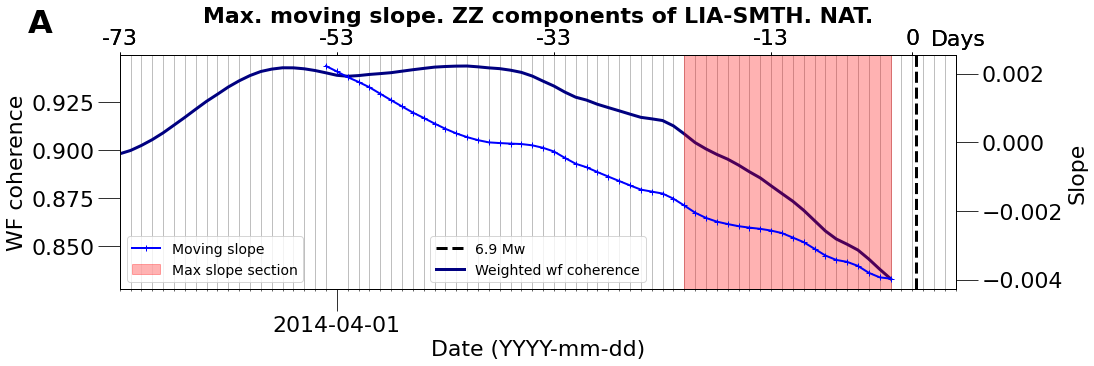

In [17]:
# PlottingZZ dv/v and WF coherence

###########SLOPE starts
plt.figure(figsize=(15,25))

avg_cc = pd.Series(ZZavg_cc, index=t)

# Calculate the slopes using a moving window of 20 days
window_size = int(n_stack)
if window_size == 10: window_size = 20
slopes = avg_cc.rolling(window_size).apply(lambda x: (x[-1] - x[0]) / (len(x) - 1), raw=True)

# Find the section where the slope starts to decrease until reaching its lowest value
min_slope_start = 0
min_slope_end = 0
min_slope_value = np.inf

for i in range(len(slopes) - window_size + 1):
    current_section = slopes[i:i + window_size]
    current_min_slope = np.min(current_section)
    
    if current_min_slope < min_slope_value:
        min_slope_value = current_min_slope
        min_slope_start = i
        min_slope_end = i + window_size - 1

# Plot time series data on primary y-axis
ax1= plt.subplot(612)
ax1.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
ax1.plot(avg_cc.index, avg_cc.values, label='Weighted wf coherence', color='navy', lw="3.0")
ax1.set_xlim(avg_cc.index[:len(slopes)][0])
highlight_dates = avg_cc.index[min_slope_start:min_slope_end + 1]
highlight_values = avg_cc[highlight_dates]
ax1.tick_params(axis='x', labelcolor='k', labelsize='22')
ax1.tick_params(axis='y', labelcolor='black', labelsize='22')
ax1.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax1.set_ylabel("WF coherence", size=22)
ax1.set_title(f'Max. moving slope. ZZ components of {sta_pair}. NAT.', size=22, fontweight='bold')
ax1.legend(loc="lower center",fontsize="14")
ax1.text(-0.11, 1.2, 'A', transform=ax1.transAxes, fontsize=32, fontweight='bold', va='top')

# Create secondary y-axis for slopes
ax2 = ax1.twinx()
ax2.plot(slopes.index, slopes.values, label=f'Moving slope', color='blue', lw="2", marker="+")
ax2.set_xlim(ax1.get_xlim())  # Set the same limits as the first x-axis
ax2.set_ylabel("Slope", size=22)
ax2.tick_params(axis='y', labelcolor='k', labelsize='22')
ax2.axvspan(slopes.index[min_slope_start], slopes.index[min_slope_end],\
            color='red', alpha=0.3, label='Max slope section')
ax2.legend(loc="lower left",fontsize="14")

for ax in [ax1,ax2]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=22)
    fmt_day = mdates.DayLocator()
    if plot_prepostEQ == True:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    else:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax3_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    if plot_prepostEQ == True:
        ax3.set_xticks(date_range[::40])
        ax3.set_xticklabels(ax3_day_numbers[::40], size='22')
    else:
        ax3.set_xticks(date_range[::20])
        ax3.set_xticklabels(ax3_day_numbers[::20], size='22')
    ax3.text(0.97, 1.11, 'Days', transform=ax3.transAxes, fontsize=22, va='top')      
    ax4 = ax.twiny()
    ax4.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax4.set_xticks([vertical_line_date])
    ax4.set_xticklabels(['0'], size='22')

#output_file = os.path.join(output_dir, f"SHADEDSlope_WFCoh_{sta_pair}_ZZ_{stack_n}days\
#_symlag_ALL_FILT.pdf")
print(output_file)
plt.tight_layout(pad=0.7)
#plt.savefig(output_file, format="PDF", dpi=dpi, bbox_inches='tight')    
    
###########SLOPE ends





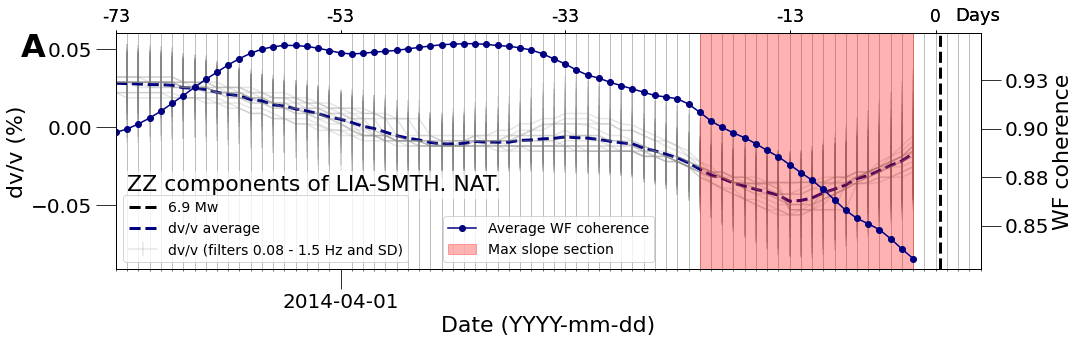

In [18]:
plt.figure(figsize=(15,25))
ax4= plt.subplot(612) #311
ax4.axvline(EQtime._get_datetime(), c="k", ls="--",lw="3.0", label=f"{str(EQmag)} Mw")
for i, j in zip(lst_ZZ_symdata, ZZsd_sym_lag):   
    ax4.errorbar(t, i, yerr=j, c="gray", alpha=0.2)
ax4.plot(t, ZZavg_dvv, ls="--", c="navy", linewidth="3")
ax4.text(0.013, 0.40, f"ZZ components of {sta_pair}. NAT.", transform=ax4.transAxes, fontsize=22,\
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
ax4.tick_params(axis='y', labelcolor='k', labelsize='20')
ax4.tick_params(axis='x', labelcolor='k', labelsize='20')
ax4.set_ylabel("dv/v (%)", size=22)
ax4.set_xlabel('Date (YYYY-mm-dd)', size='22', color='k')
ax4.set_xlim(t[0])
ax4.legend([f"{str(EQmag)} Mw", f"dv/v average", f"dv/v (filters 0.08 - 1.5 Hz and SD)"],loc='lower left', fontsize="14")
ax4.text(-0.11, 1.0, 'A', transform=ax4.transAxes, fontsize=32, fontweight='bold', va='top')

# CC after stretching
ax5 = ax4.twinx()
ax5.plot(t, ZZavg_cc, marker="o", c="navy", label="Average WF coherence")
ax5.axvspan(slopes.index[min_slope_start], slopes.index[min_slope_end],\
            color='red', alpha=0.3, label='Max slope section')
ax5.tick_params(axis='y', labelcolor='black', labelsize='20')
ax5.tick_params(axis='x', labelcolor='black', labelsize='14')
ax5.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax5.set_ylabel("WF coherence", size=22)
ax5.set_xlim(t[0])
ax5.legend(loc='lower center', fontsize="14")

for ax in [ax4,ax5]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(which='major', length=20)
    fmt_day = mdates.DayLocator()
    if plot_prepostEQ == True:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    else:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_minor_locator(fmt_day)
    ax.xaxis.grid(True, which='minor')
    
    # Creating a second x-axis for countdown
    ax6 = ax.twiny()
    ax6.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    days_before = (date_range - vertical_line_date).days
    ax6_day_numbers = np.where(days_before >= 0, days_before, days_before ) #-1
    # Display the secondary x-axis in intervals of 20 days
    if plot_prepostEQ == True:
        ax6.set_xticks(date_range[::40])
        ax6.set_xticklabels(ax6_day_numbers[::40], size='17')
    else:
        ax6.set_xticks(date_range[::20])
        ax6.set_xticklabels(ax6_day_numbers[::20], size='17')
    ax6.text(0.97, 1.11, 'Days', transform=ax6.transAxes, fontsize=18, va='top')      
    ax7 = ax.twiny()
    ax7.set_xlim(ax.get_xlim())  # Set the same limits as the first x-axis
    ax7.set_xticks([vertical_line_date])
    ax7.set_xticklabels(['0'], size='17')


plt.tight_layout(pad=0.7)

plt.show()
plt.close()